# **Customer Satisfaction Prediction for E-commerce**

O objetivo deste projeto prático de Machine Learning é prever e entender os detratores (clientes insatisfeitos com o processo de venda ou com a empresa) de uma pesquisa NPS a partir de um conjunto de dados de ecommerce do Brasil.

Para isso, primeiro vamos definir o que seria uma **pesquisa NPS** e **detrator**.

**NPS (Net Promoter Score)** é uma métrica que mede a satisfação do cliente e que tem como foco uma pergunta:

> **_Qual é a probabilidade de você recomendar nossa empresa/produto/serviço a um amigo ou colega?_**

Para uma pesquisa que avalia entre 1 e 5 estrelas, como o Olist, podemos classificar os clientes em três categorias com base nas suas respostas:

🤩 **Promotores**: clientes que avaliaram com nota 5 <br />
😴 **Neutros**: clientes que avaliaram com nota 4 <br />
😡 **Detratores**: clientes que avaliaram com pontuação entre 1 e 3 (inclusive)

<br />

O NPS é calculado subtraindo a porcentagem de clientes que são detratores da porcentagem de clientes que são promotores.

$NPS = {\% Promotores} - {\% Detratores}$

$NPS = \frac{({\#Promotores} - {\#Detratores})}{\#Avaliacoes}$

<br />

**Fontes de Dados**: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Maiores informações como o Dicionário de Variáveis podem ser consultadas aqui: https://github.com/adriana-takahagui/mba-machine-learning

# **Instalação de Bibliotecas necessárias**

Instalando a biblioteca "Sweetviz" para análise rápida dos dados

In [ ]:
!pip install sweetviz

# **Importação das Bibliotecas**

Importando as principais bibliotecas utilizadas neste projeto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

import sweetviz as sv

Configurações

In [ ]:
pd.set_option('display.max_columns', None)

# **Importação dos Dados**

Os arquivos da Olist que estão no Kaggle foram carregados em um diretório do Github para serem carregados neste notebook e utilizados na análise e no modelo de predição.

In [ ]:
# Definição do caminho dos arquivos

files_path = 'https://raw.githubusercontent.com/adriana-takahagui/mba-machine-learning/main/datasets/'

In [ ]:
# Carregando os dados com as informações sobre os pedidos: olist_orders_dataset.csv

orders = pd.read_csv(files_path + 'olist_orders_dataset.csv')
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [ ]:
orders.shape

(99441, 8)

In [ ]:
# Carregando os dados com as informações sobre os itens dos pedidos: olist_order_items_datase.csv

order_items = pd.read_csv(files_path + 'olist_order_items_dataset.csv')
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [ ]:
order_items.shape

(112650, 7)

In [ ]:
# Carregando os dados com as informações sobre os pagamentos dos pedidos: olist_order_payments_dataset.csv

order_payments = pd.read_csv(files_path + 'olist_order_payments_dataset.csv')
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [ ]:
order_payments.shape

(103886, 5)

In [ ]:
# Carregando os dados com as informações sobre os consumidores: olist_customers_dataset.csv

customers = pd.read_csv(files_path + 'olist_customers_dataset.csv')
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [ ]:
customers.shape

(99441, 5)

In [ ]:
# Carregando os dados com as informações sobre os produtos: olist_products_dataset.csv

products = pd.read_csv(files_path + 'olist_products_dataset.csv')
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [ ]:
products.shape

(32951, 9)

In [ ]:
# Carregando os dados com as informações sobre os vendedores: olist_sellers_dataset.csv

sellers = pd.read_csv(files_path + 'olist_sellers_dataset.csv')
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [ ]:
sellers.shape

(3095, 4)

In [ ]:
# Carregando os dados com as informações sobre as avaliações dos pedidos: olist_order_reviews_dataset.csv

order_reviews = pd.read_csv(files_path + 'olist_order_reviews_dataset.csv')
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [ ]:
order_reviews.shape

(99224, 7)

In [ ]:
# Carregando a tabela de regiões

regioes = pd.read_csv(files_path + 'tabela_regioes.csv', sep = ';')
regioes.head()

Sigla        Regiao
0    GO  Centro-Oeste
1    MS  Centro-Oeste
2    MT  Centro-Oeste
3    DF  Centro-Oeste
4    MA      Nordeste

In [ ]:
regioes.shape

(27, 2)

## **Join das Tabelas**

Realizando o join entre todas as tabelas acima para formar uma tabela com todas as informações a serem utilizadas na análise e no desenvolvimento do modelo de machine learning.


In [ ]:
# Join entre as tabelas: orders, order_reviews, order_payments e order_items utilizando a chave order_id
# Join com a tabela customers utilizando a chave customer_id
# Join com a tabela products utilizando a chave product_id
# Join com a tabela sellers utilizando a chave seller_id

df_ecommerce = pd.merge(orders, order_reviews, on = 'order_id')
df_ecommerce = pd.merge(df_ecommerce, order_payments, on = 'order_id')
df_ecommerce = pd.merge(df_ecommerce, order_items, on = 'order_id')
df_ecommerce = pd.merge(df_ecommerce, customers, on = 'customer_id')
df_ecommerce = pd.merge(df_ecommerce, products, on = 'product_id')
df_ecommerce = pd.merge(df_ecommerce, sellers, on = 'seller_id')

df_ecommerce.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
4    delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-08-17 15:28:33           2017-08-18 14:44:43   
4          2017-08-04 17:35:43           2017-08-07 18:30:01   

  order_estimated_delivery_date                         review_id  \
0           2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
1           2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
2           2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
3           2017-08-28 00:00:00  b46f1e34512b0f4c74a72398b03ca788   
4           2017-08-15 00:00:00  dc90f19c2806f1abba9e72ad3c350073   

   review_score review_comment_title  \
0             4                  NaN   
1             4                  NaN   
2             4                  NaN   
3             4                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
1  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
2  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
3  Deveriam embalar melhor o produto. A caixa vei...  2017-08-19 00:00:00   
4  Só achei ela pequena pra seis xícaras ,mais é ...  2017-08-08 00:00:00   

  review_answer_timestamp  payment_sequential payment_type  \
0     2017-10-12 03:43:48                   1  credit_card   
1     2017-10-12 03:43:48                   3      voucher   
2     2017-10-12 03:43:48                   2      voucher   
3     2017-08-20 15:16:36                   1  credit_card   
4     2017-08-08 23:26:23                   1  credit_card   

   payment_installments  payment_value  order_item_id  \
0                     1          18.12              1   
1                     1           2.00              1   
2                     1          18.59              1   
3                     3          37.77              1   
4                     1          37.77              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

   shipping_limit_date  price  freight_value  \
0  2017-10-06 11:07:15  29.99           8.72   
1  2017-10-06 11:07:15  29.99           8.72   
2  2017-10-06 11:07:15  29.99           8.72   
3  2017-08-21 20:05:16  29.99           7.78   
4  2017-08-08 18:37:31  29.99           7.78   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
1  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
2  7c396fd4830fd04

In [ ]:
# Criando a tabela de regioes para 'customers' e 'sellers'

regioes_customers = regioes.copy()
regioes_sellers = regioes.copy()

# Renomeando as colunas

regioes_customers = regioes_customers.rename(columns={'Sigla': 'customer_state', 'Regiao': 'customer_region'})
regioes_sellers = regioes_sellers.rename(columns={'Sigla': 'seller_state', 'Regiao': 'seller_region'})

In [ ]:
# Join entre o dataframe 'df_ecommerce' e as tabelas 'regioes_customers' e 'regioes_sellers'

df_ecommerce = pd.merge(df_ecommerce, regioes_customers, on = 'customer_state')
df_ecommerce = pd.merge(df_ecommerce, regioes_sellers, on = 'seller_state')

df_ecommerce.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
4    delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-08-17 15:28:33           2017-08-18 14:44:43   
4          2017-08-04 17:35:43           2017-08-07 18:30:01   

  order_estimated_delivery_date                         review_id  \
0           2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
1           2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
2           2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
3           2017-08-28 00:00:00  b46f1e34512b0f4c74a72398b03ca788   
4           2017-08-15 00:00:00  dc90f19c2806f1abba9e72ad3c350073   

   review_score review_comment_title  \
0             4                  NaN   
1             4                  NaN   
2             4                  NaN   
3             4                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
1  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
2  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
3  Deveriam embalar melhor o produto. A caixa vei...  2017-08-19 00:00:00   
4  Só achei ela pequena pra seis xícaras ,mais é ...  2017-08-08 00:00:00   

  review_answer_timestamp  payment_sequential payment_type  \
0     2017-10-12 03:43:48                   1  credit_card   
1     2017-10-12 03:43:48                   3      voucher   
2     2017-10-12 03:43:48                   2      voucher   
3     2017-08-20 15:16:36                   1  credit_card   
4     2017-08-08 23:26:23                   1  credit_card   

   payment_installments  payment_value  order_item_id  \
0                     1          18.12              1   
1                     1           2.00              1   
2                     1          18.59              1   
3                     3          37.77              1   
4                     1          37.77              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

   shipping_limit_date  price  freight_value  \
0  2017-10-06 11:07:15  29.99           8.72   
1  2017-10-06 11:07:15  29.99           8.72   
2  2017-10-06 11:07:15  29.99           8.72   
3  2017-08-21 20:05:16  29.99           7.78   
4  2017-08-08 18:37:31  29.99           7.78   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
1  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
2  7c396fd4830fd04

Formato (linhas e colunas) da tabela após os joins das tabelas de origem

In [ ]:
df_ecommerce.shape

(117329, 41)

## **Seleção das Variáveis**

Analisando todas as variáveis e desconsiderando as variáveis que são formadas por id

In [ ]:
# Visualizar as variáveis da tabela final 'df_ecommerce'

df_ecommerce.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'customer_region', 'seller_region'],
      dtype='object')

Desconsiderando as variáveis de Id, CEP, Categoria do Produto e comentários das avaliações e selecionando apenas as variáveis abaixo:
- Da tabela 'Orders': 'order_status','order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
- Da tabela 'Order Items': 'shipping_limit_date', 'price', 'freight_value',
- Da tabela 'Order Payments': 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value',
- Da tabela 'Products': 'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
- Da tabela 'Products' (cont): 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
- Da tabela 'Seller': 'seller_region', 'seller_state', 'seller_city',
- Da tabela 'Customer': 'customer_region', 'customer_state', 'customer_city',
- Da tabela 'Order Review': 'review_score', 'review_creation_date', 'review_answer_timestamp'


In [ ]:
# Selecionando apenas as variáveis acima

df_ecommerce = df_ecommerce[['order_status','order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                             'shipping_limit_date', 'price', 'freight_value',
                             'payment_sequential', 'payment_type', 'payment_installments', 'payment_value',
                             'product_name_lenght', 'product_description_lenght',
                             'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
                             'seller_region', 'seller_state', 'seller_city',
                             'customer_region', 'customer_state', 'customer_city',
                             'review_score', 'review_creation_date', 'review_answer_timestamp']]

# Corrigindo o nome das variáveis

df_ecommerce = df_ecommerce.rename(columns={'product_name_lenght': 'product_name_length',
                                            'product_description_lenght': 'product_description_length'})

df_ecommerce.head()

order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
4    delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-08-17 15:28:33           2017-08-18 14:44:43   
4          2017-08-04 17:35:43           2017-08-07 18:30:01   

  order_estimated_delivery_date  shipping_limit_date  price  freight_value  \
0           2017-10-18 00:00:00  2017-10-06 11:07:15  29.99           8.72   
1           2017-10-18 00:00:00  2017-10-06 11:07:15  29.99           8.72   
2           2017-10-18 00:00:00  2017-10-06 11:07:15  29.99           8.72   
3           2017-08-28 00:00:00  2017-08-21 20:05:16  29.99           7.78   
4           2017-08-15 00:00:00  2017-08-08 18:37:31  29.99           7.78   

   payment_sequential payment_type  payment_installments  payment_value  \
0                   1  credit_card                     1          18.12   
1                   3      voucher                     1           2.00   
2                   2      voucher                     1          18.59   
3                   1  credit_card                     3          37.77   
4                   1  credit_card                     1          37.77   

   product_name_length  product_description_length  product_photos_qty  \
0                 40.0                       268.0                 4.0   
1                 40.0                       268.0                 4.0   
2                 40.0                       268.0                 4.0   
3                 40.0                       268.0                 4.0   
4                 40.0                       268.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             500.0               19.0                8.0              13.0   
1             500.0               19.0                8.0              13.0   
2             500.0               19.0                8.0              13.0   
3             500.0               19.0                8.0              13.0   
4             500.0               19.0                8.0              13.0   

  seller_region seller_state seller_city customer_region customer_state  \
0       Sudeste           SP        maua         Sudeste             SP   
1       Sudeste           SP        maua         Sudeste             SP   
2       Sudeste           SP        maua         Sudeste             SP   
3       Sudeste           SP        maua         Sudeste             SP   
4       Sudeste           SP        maua         Sudeste             SP   

  customer_city  review_score review_creation_date review_answer_timestamp  
0     sao paulo             4  2017-10-11 00:00:00     2017-10-12 03:43:48  
1     sao paulo             4  2017-10-11 00:00:00     2017-10-12 03:43:48  
2     sao paulo             4  2017-10-11 00:00:00     2017-10-12 03:43:48  
3     sao paulo             4  2017-08-19 00:00:00     2017-08-20 15:16:36  
4     sao paulo             5  2017-08-08 00:00:00     2017-08-08 23:26:23

Formato (linhas e colunas) da tabela após a remoção de algumas variáveis de não interesse

In [ ]:
df_ecommerce.shape

(117329, 29)

# **Pré-Análise dos Dados**

In [ ]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_status                   117329 non-null  object 
 1   order_purchase_timestamp       117329 non-null  object 
 2   order_approved_at              117314 non-null  object 
 3   order_delivered_carrier_date   116094 non-null  object 
 4   order_delivered_customer_date  114858 non-null  object 
 5   order_estimated_delivery_date  117329 non-null  object 
 6   shipping_limit_date            117329 non-null  object 
 7   price                          117329 non-null  float64
 8   freight_value                  117329 non-null  float64
 9   payment_sequential             117329 non-null  int64  
 10  payment_type                   117329 non-null  object 
 11  payment_installments           117329 non-null  int64  
 12  payment_value                 

**Alguns insghts**:
- Podemos verificar alguns valores faltantes ou nulos.
- Os campos de datas e timestamps (data e hora) estão no formato 'object'
- Assim como as variáveis categóricas estão com formato 'object'

In [ ]:
df_ecommerce.describe()

price  freight_value  payment_sequential  payment_installments  \
count  117329.000000  117329.000000       117329.000000         117329.000000   
mean      120.524349      20.027514            1.094452              2.940151   
std       182.944843      15.828077            0.731174              2.775370   
min         0.850000       0.000000            1.000000              0.000000   
25%        39.900000      13.080000            1.000000              1.000000   
50%        74.900000      16.280000            1.000000              2.000000   
75%       134.900000      21.180000            1.000000              4.000000   
max      6735.000000     409.680000           29.000000             24.000000   

       payment_value  product_name_length  product_description_length  \
count  117329.000000        115634.000000               115634.000000   
mean      172.062565            48.768018                  785.802861   
std       265.388194            10.033831                  652.382965   
min         0.000000             5.000000                    4.000000   
25%        60.750000            42.000000                  346.000000   
50%       108.100000            52.000000                  600.000000   
75%       189.060000            57.000000                  983.000000   
max     13664.080000            76.000000                 3992.000000   

       product_photos_qty  product_weight_g  product_length_cm  \
count       115634.000000     117309.000000      117309.000000   
mean             2.205528       2110.763062          30.254456   
std              1.717783       3785.128931          16.177519   
min              1.000000          0.000000           7.000000   
25%              1.000000        300.000000          18.000000   
50%              1.000000        700.000000          25.000000   
75%              3.000000       1800.000000          38.000000   
max             20.000000      40425.000000         105.000000   

       product_height_cm  product_width_cm   review_score  
count      117309.000000     117309.000000  117329.000000  
mean           16.612476         23.071452       4.031467  
std            13.452625         11.745875       1.387927  
min             2.000000          6.000000       1.000000  
25%             8.000000         15.000000       4.000000  
50%            13.000000         20.000000       5.000000  
75%            20.000000         30.000000       5.000000  
max           105.000000        118.000000       5.000000

**Insights**:
- Os preços (price) se concentram em valores abaixo de R\$ 135,00
- O valor do frete (freight_price) se concetram em valores abaixo de R\$ 22,00
- A maioria (75%) dos consumidores preferem 1 forma de pagamento (payment_sequential) e dividem o pagamento em 2 a 4 parcelas (payment_installments).
- O valor da transação (payment_value) se concentra em valores até R$ 190,00
- Entre 50% a 75% dos consumidores avaliam o pedido com nota máxima (5)

# **Remoção de  Valores Nulos (NaN)**

Depois que o dataframe foi filtrado mantendo apenas as variáveis de interesse, precisamos analisar se existem valores faltantes ou nulos.

Como o dataframe possui um volume significativo de dados, decidiu-se por remover os registros com dados faltantes ou nulos.

In [ ]:
# Verificando variáveis com valores nulos

df_ecommerce.isnull().sum()

order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1235
order_delivered_customer_date    2471
order_estimated_delivery_date       0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_name_length              1695
product_description_length       1695
product_photos_qty               1695
product_weight_g                   20
product_length_cm                  20
product_height_cm                  20
product_width_cm                   20
seller_region                       0
seller_state                        0
seller_city                         0
customer_region                     0
customer_state                      0
customer_city                       0
review_score

In [ ]:
# Removendo as linhas com valores faltantes ou nulos

df_ecommerce.dropna(how = 'any', inplace = True)
df_ecommerce.shape

(113216, 29)

In [ ]:
# Verificando dataframe após remoção dos valores faltantes ou nulos

df_ecommerce.isnull().sum()

order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_name_length              0
product_description_length       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_region                    0
seller_state                     0
seller_city                      0
customer_region                  0
customer_state                   0
customer_city                    0
review_score                     0
review_creation_date             0
review_answer_timest

# **Feature Engineering**

Para tornar os dados mais precisos, o feature engineering é usado para criar novas variáveis (features) que fazem mais sentido para o modelo de Machine Learning.

Além disso, verificar se as informações existentes fazem sentido no formato atual ou se realizar algum ajuste faça mais sentido, ou mesmo se estão na forma correta.

## **Variáveis com as Datas**

Criando variáveis calculadas como diferença entre datas

In [ ]:
# Transformando as variáveis de data e hora para o tipo datetime

df_ecommerce['order_approved_at'] = pd.to_datetime(df_ecommerce['order_approved_at']).dt.date
df_ecommerce['order_purchase_timestamp'] = pd.to_datetime(df_ecommerce['order_purchase_timestamp']).dt.date
df_ecommerce['order_estimated_delivery_date'] = pd.to_datetime(df_ecommerce['order_estimated_delivery_date']).dt.date
df_ecommerce['order_delivered_customer_date'] = pd.to_datetime(df_ecommerce['order_delivered_customer_date']).dt.date
df_ecommerce['order_delivered_carrier_date'] = pd.to_datetime(df_ecommerce['order_delivered_carrier_date']).dt.date
df_ecommerce['shipping_limit_date'] = pd.to_datetime(df_ecommerce['shipping_limit_date']).dt.date
df_ecommerce['review_answer_timestamp'] = pd.to_datetime(df_ecommerce['review_answer_timestamp']).dt.date
df_ecommerce['review_creation_date'] = pd.to_datetime(df_ecommerce['review_creation_date']).dt.date

In [ ]:
# Criando as variáveis com os cálculos de diferença entre as datas

df_ecommerce['approved_days'] = (df_ecommerce['order_approved_at'] - df_ecommerce['order_purchase_timestamp']) // dt.timedelta(hours = 24)
df_ecommerce['delivery_days'] = (df_ecommerce['order_delivered_customer_date'] - df_ecommerce['order_purchase_timestamp']) // dt.timedelta(hours = 24)
df_ecommerce['delivery_carrier_days'] = (df_ecommerce['order_delivered_carrier_date'] - df_ecommerce['order_purchase_timestamp']) // dt.timedelta(hours = 24)
df_ecommerce['estimated_days'] = (df_ecommerce['order_estimated_delivery_date'] - df_ecommerce['order_purchase_timestamp']) // dt.timedelta(hours = 24)
df_ecommerce['shipping_days'] = (df_ecommerce['shipping_limit_date'] - df_ecommerce['order_purchase_timestamp']) // dt.timedelta(hours = 24)
df_ecommerce['arrival_on_time_days'] = (df_ecommerce['order_estimated_delivery_date'] - df_ecommerce['order_delivered_customer_date']) // dt.timedelta(hours = 24)
df_ecommerce['review_days'] = (df_ecommerce['review_answer_timestamp'] - df_ecommerce['review_creation_date']) // dt.timedelta(hours = 24)

In [ ]:
df_ecommerce.head()

order_status order_purchase_timestamp order_approved_at  \
0    delivered               2017-10-02        2017-10-02   
1    delivered               2017-10-02        2017-10-02   
2    delivered               2017-10-02        2017-10-02   
3    delivered               2017-08-15        2017-08-15   
4    delivered               2017-08-02        2017-08-02   

  order_delivered_carrier_date order_delivered_customer_date  \
0                   2017-10-04                    2017-10-10   
1                   2017-10-04                    2017-10-10   
2                   2017-10-04                    2017-10-10   
3                   2017-08-17                    2017-08-18   
4                   2017-08-04                    2017-08-07   

  order_estimated_delivery_date shipping_limit_date  price  freight_value  \
0                    2017-10-18          2017-10-06  29.99           8.72   
1                    2017-10-18          2017-10-06  29.99           8.72   
2                    2017-10-18          2017-10-06  29.99           8.72   
3                    2017-08-28          2017-08-21  29.99           7.78   
4                    2017-08-15          2017-08-08  29.99           7.78   

   payment_sequential payment_type  payment_installments  payment_value  \
0                   1  credit_card                     1          18.12   
1                   3      voucher                     1           2.00   
2                   2      voucher                     1          18.59   
3                   1  credit_card                     3          37.77   
4                   1  credit_card                     1          37.77   

   product_name_length  product_description_length  product_photos_qty  \
0                 40.0                       268.0                 4.0   
1                 40.0                       268.0                 4.0   
2                 40.0                       268.0                 4.0   
3                 40.0                       268.0                 4.0   
4                 40.0                       268.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             500.0               19.0                8.0              13.0   
1             500.0               19.0                8.0              13.0   
2             500.0               19.0                8.0              13.0   
3             500.0               19.0                8.0              13.0   
4             500.0               19.0                8.0              13.0   

  seller_region seller_state seller_city customer_region customer_state  \
0       Sudeste           SP        maua         Sudeste             SP   
1       Sudeste           SP        maua         Sudeste             SP   
2       Sudeste           SP        maua         Sudeste             SP   
3       Sudeste           SP        maua         Sudeste             SP   
4       Sudeste           SP        maua         Sudeste             SP   

  customer_city  review_score review_creation_date review_answer_timestamp  \
0     sao paulo             4           2017-10-11              2017-10-12   
1     sao paulo             4           2017-10-11              2017-10-12   
2     sao paulo             4           2017-10-11              2017-10-12   
3     sao paulo             4           2017-08-19              2017-08-20   
4     sao paulo             5           2017-08-08              2017-08-08   

   approved_days  delivery_days  delivery_carrier_days  estimated_days  \
0              0              8                      2              16   
1              0              8                      2              16   
2              0              8                      2              16   
3              0              3                      2              13   
4              0              5                      2              13   

   shipping_days  arrival_on_time_days  review_days

In [ ]:
df_ecommerce.shape

(113216, 36)

## **Variável que indica Dia da Semana da Compra**

Criando uma variável que indica em que dia da semana a compra ocorreu.

In [ ]:
df_ecommerce['weekday_purchase'] = (pd.to_datetime(df_ecommerce['order_purchase_timestamp'])).dt.weekday
df_ecommerce.head()

order_status order_purchase_timestamp order_approved_at  \
0    delivered               2017-10-02        2017-10-02   
1    delivered               2017-10-02        2017-10-02   
2    delivered               2017-10-02        2017-10-02   
3    delivered               2017-08-15        2017-08-15   
4    delivered               2017-08-02        2017-08-02   

  order_delivered_carrier_date order_delivered_customer_date  \
0                   2017-10-04                    2017-10-10   
1                   2017-10-04                    2017-10-10   
2                   2017-10-04                    2017-10-10   
3                   2017-08-17                    2017-08-18   
4                   2017-08-04                    2017-08-07   

  order_estimated_delivery_date shipping_limit_date  price  freight_value  \
0                    2017-10-18          2017-10-06  29.99           8.72   
1                    2017-10-18          2017-10-06  29.99           8.72   
2                    2017-10-18          2017-10-06  29.99           8.72   
3                    2017-08-28          2017-08-21  29.99           7.78   
4                    2017-08-15          2017-08-08  29.99           7.78   

   payment_sequential payment_type  payment_installments  payment_value  \
0                   1  credit_card                     1          18.12   
1                   3      voucher                     1           2.00   
2                   2      voucher                     1          18.59   
3                   1  credit_card                     3          37.77   
4                   1  credit_card                     1          37.77   

   product_name_length  product_description_length  product_photos_qty  \
0                 40.0                       268.0                 4.0   
1                 40.0                       268.0                 4.0   
2                 40.0                       268.0                 4.0   
3                 40.0                       268.0                 4.0   
4                 40.0                       268.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             500.0               19.0                8.0              13.0   
1             500.0               19.0                8.0              13.0   
2             500.0               19.0                8.0              13.0   
3             500.0               19.0                8.0              13.0   
4             500.0               19.0                8.0              13.0   

  seller_region seller_state seller_city customer_region customer_state  \
0       Sudeste           SP        maua         Sudeste             SP   
1       Sudeste           SP        maua         Sudeste             SP   
2       Sudeste           SP        maua         Sudeste             SP   
3       Sudeste           SP        maua         Sudeste             SP   
4       Sudeste           SP        maua         Sudeste             SP   

  customer_city  review_score review_creation_date review_answer_timestamp  \
0     sao paulo             4           2017-10-11              2017-10-12   
1     sao paulo             4           2017-10-11              2017-10-12   
2     sao paulo             4           2017-10-11              2017-10-12   
3     sao paulo             4           2017-08-19              2017-08-20   
4     sao paulo             5           2017-08-08              2017-08-08   

   approved_days  delivery_days  delivery_carrier_days  estimated_days  \
0              0              8                      2              16   
1              0              8                      2              16   
2              0              8                      2              16   
3              0              3                      2              13   
4              0              5                      2              13   

   shipping_days  arrival_on_time_days  review_days

## **Variável se o produto chegou atrasado ou não**

Criando uma variável chamada 'arrival_on_time' que indica se o produto chegou atrasado ou não.

In [ ]:
def aux_arrival_on_time(x):
    if x <= 0:
        return 0 # Não atrasou
    else:
        return 1 # Atrasou

df_ecommerce['arrival_on_time'] = df_ecommerce.arrival_on_time_days.apply(aux_arrival_on_time)
df_ecommerce.head()

order_status order_purchase_timestamp order_approved_at  \
0    delivered               2017-10-02        2017-10-02   
1    delivered               2017-10-02        2017-10-02   
2    delivered               2017-10-02        2017-10-02   
3    delivered               2017-08-15        2017-08-15   
4    delivered               2017-08-02        2017-08-02   

  order_delivered_carrier_date order_delivered_customer_date  \
0                   2017-10-04                    2017-10-10   
1                   2017-10-04                    2017-10-10   
2                   2017-10-04                    2017-10-10   
3                   2017-08-17                    2017-08-18   
4                   2017-08-04                    2017-08-07   

  order_estimated_delivery_date shipping_limit_date  price  freight_value  \
0                    2017-10-18          2017-10-06  29.99           8.72   
1                    2017-10-18          2017-10-06  29.99           8.72   
2                    2017-10-18          2017-10-06  29.99           8.72   
3                    2017-08-28          2017-08-21  29.99           7.78   
4                    2017-08-15          2017-08-08  29.99           7.78   

   payment_sequential payment_type  payment_installments  payment_value  \
0                   1  credit_card                     1          18.12   
1                   3      voucher                     1           2.00   
2                   2      voucher                     1          18.59   
3                   1  credit_card                     3          37.77   
4                   1  credit_card                     1          37.77   

   product_name_length  product_description_length  product_photos_qty  \
0                 40.0                       268.0                 4.0   
1                 40.0                       268.0                 4.0   
2                 40.0                       268.0                 4.0   
3                 40.0                       268.0                 4.0   
4                 40.0                       268.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             500.0               19.0                8.0              13.0   
1             500.0               19.0                8.0              13.0   
2             500.0               19.0                8.0              13.0   
3             500.0               19.0                8.0              13.0   
4             500.0               19.0                8.0              13.0   

  seller_region seller_state seller_city customer_region customer_state  \
0       Sudeste           SP        maua         Sudeste             SP   
1       Sudeste           SP        maua         Sudeste             SP   
2       Sudeste           SP        maua         Sudeste             SP   
3       Sudeste           SP        maua         Sudeste             SP   
4       Sudeste           SP        maua         Sudeste             SP   

  customer_city  review_score review_creation_date review_answer_timestamp  \
0     sao paulo             4           2017-10-11              2017-10-12   
1     sao paulo             4           2017-10-11              2017-10-12   
2     sao paulo             4           2017-10-11              2017-10-12   
3     sao paulo             4           2017-08-19              2017-08-20   
4     sao paulo             5           2017-08-08              2017-08-08   

   approved_days  delivery_days  delivery_carrier_days  estimated_days  \
0              0              8                      2              16   
1              0              8                      2              16   
2              0              8                      2              16   
3              0              3                      2              13   
4              0              5                      2              13   

   shipping_days  arrival_on_time_days  review_days

## **Variável indicando NPS**

Para este projeto, considerou-se esta classificação:

🤩 **Promotores**: clientes que avaliaram com nota 5 <br />
😴 **Neutros**: clientes que avaliaram com nota 4 <br />
😡 **Detratores**: clientes que avaliaram com pontuação entre 1 e 3 (inclusive)

E uma variável denominada 'detrator_score' foi criada que contém:
- 1 se a nota foi classificada como 'detrator',
- 0 se a nota foi classificada como 'promotor',
- E a classificação for 'neutra', esta será descartada por ser neutra.

In [ ]:
# Dropando as linhas com 'review_score' igual a 4 (neutra)

df_ecommerce.drop(df_ecommerce[df_ecommerce['review_score'] == 4].index, inplace = True)

# Criando a variável 'detrator_score'

def aux_nps(x):
    if x < 4:
        return 1
    else:
        return 0

df_ecommerce['detrator_score'] = df_ecommerce['review_score'].apply(aux_nps)
df_ecommerce.head()

order_status order_purchase_timestamp order_approved_at  \
4     delivered               2017-08-02        2017-08-02   
5     delivered               2017-08-10        2017-08-10   
7     delivered               2017-08-10        2017-08-10   
10    delivered               2017-07-05        2017-07-05   
11    delivered               2017-08-02        2017-08-02   

   order_delivered_carrier_date order_delivered_customer_date  \
4                    2017-08-04                    2017-08-07   
5                    2017-08-11                    2017-08-16   
7                    2017-08-11                    2017-08-12   
10                   2017-07-06                    2017-07-07   
11                   2017-08-04                    2017-08-08   

   order_estimated_delivery_date shipping_limit_date  price  freight_value  \
4                     2017-08-15          2017-08-08  29.99           7.78   
5                     2017-08-23          2017-08-16  75.90           7.79   
7                     2017-08-23          2017-08-16  75.90           7.79   
10                    2017-07-18          2017-07-11  44.99           7.78   
11                    2017-08-15          2017-08-08  44.99           7.78   

    payment_sequential payment_type  payment_installments  payment_value  \
4                    1  credit_card                     1          37.77   
5                    1  credit_card                     1          83.69   
7                    1  credit_card                     2          83.69   
10                   1  credit_card                     2          52.77   
11                   1  credit_card                     1           2.77   

    product_name_length  product_description_length  product_photos_qty  \
4                  40.0                       268.0                 4.0   
5                  58.0                       398.0                 3.0   
7                  58.0                       398.0                 3.0   
10                 58.0                       537.0                 2.0   
11                 58.0                       537.0                 2.0   

    product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
4              500.0               19.0                8.0              13.0   
5              238.0               20.0               10.0              15.0   
7              238.0               20.0               10.0              15.0   
10            1850.0               34.0                5.0              34.0   
11            1850.0               34.0                5.0              34.0   

   seller_region seller_state seller_city customer_region customer_state  \
4        Sudeste           SP        maua         Sudeste             SP   
5        Sudeste           SP        maua         Sudeste             SP   
7        Sudeste           SP        maua         Sudeste             SP   
10       Sudeste           SP        maua         Sudeste             SP   
11       Sudeste           SP        maua         Sudeste             SP   

      customer_city  review_score review_creation_date  \
4         sao paulo             5           2017-08-08   
5   itaquaquecetuba             5           2017-08-17   
7          campinas             2           2017-08-13   
10          jundiai             5           2017-07-08   
11        sao paulo             5           2017-08-09   

   review_answer_timestamp  approved_days  delivery_days  \
4               2017-08-08              0              5   
5               2017-08-21              0              6   
7               2017-08-14              0              2   
10              2017-07-10              0              2   
11              2017-08-10              0              6   

    delivery_carrier_days  estimated_days  shipping_days  \
4                       2              13              6   
5                       1              13              6   
7                       1         

Formato (linhas e colunas) da tabela após a remoção das avaliações neutras

In [ ]:
df_ecommerce.shape

(91400, 39)

In [ ]:
# Verificando a distribuição da variável 'detrator_score'

df_ecommerce['detrator_score'].value_counts(normalize = True)*100

0    71.28337
1    28.71663
Name: detrator_score, dtype: float64

## **Variável indicando consumidores e vendedores em estados diferentes**

Criando uma variável para indicar se o consumidor e o vendedor se encontram  em Estados diferentes.

In [ ]:
df_ecommerce['equal_state'] = np.where((df_ecommerce['customer_state'] == df_ecommerce['seller_state']), 1, 0)
df_ecommerce.head()

order_status order_purchase_timestamp order_approved_at  \
4     delivered               2017-08-02        2017-08-02   
5     delivered               2017-08-10        2017-08-10   
7     delivered               2017-08-10        2017-08-10   
10    delivered               2017-07-05        2017-07-05   
11    delivered               2017-08-02        2017-08-02   

   order_delivered_carrier_date order_delivered_customer_date  \
4                    2017-08-04                    2017-08-07   
5                    2017-08-11                    2017-08-16   
7                    2017-08-11                    2017-08-12   
10                   2017-07-06                    2017-07-07   
11                   2017-08-04                    2017-08-08   

   order_estimated_delivery_date shipping_limit_date  price  freight_value  \
4                     2017-08-15          2017-08-08  29.99           7.78   
5                     2017-08-23          2017-08-16  75.90           7.79   
7                     2017-08-23          2017-08-16  75.90           7.79   
10                    2017-07-18          2017-07-11  44.99           7.78   
11                    2017-08-15          2017-08-08  44.99           7.78   

    payment_sequential payment_type  payment_installments  payment_value  \
4                    1  credit_card                     1          37.77   
5                    1  credit_card                     1          83.69   
7                    1  credit_card                     2          83.69   
10                   1  credit_card                     2          52.77   
11                   1  credit_card                     1           2.77   

    product_name_length  product_description_length  product_photos_qty  \
4                  40.0                       268.0                 4.0   
5                  58.0                       398.0                 3.0   
7                  58.0                       398.0                 3.0   
10                 58.0                       537.0                 2.0   
11                 58.0                       537.0                 2.0   

    product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
4              500.0               19.0                8.0              13.0   
5              238.0               20.0               10.0              15.0   
7              238.0               20.0               10.0              15.0   
10            1850.0               34.0                5.0              34.0   
11            1850.0               34.0                5.0              34.0   

   seller_region seller_state seller_city customer_region customer_state  \
4        Sudeste           SP        maua         Sudeste             SP   
5        Sudeste           SP        maua         Sudeste             SP   
7        Sudeste           SP        maua         Sudeste             SP   
10       Sudeste           SP        maua         Sudeste             SP   
11       Sudeste           SP        maua         Sudeste             SP   

      customer_city  review_score review_creation_date  \
4         sao paulo             5           2017-08-08   
5   itaquaquecetuba             5           2017-08-17   
7          campinas             2           2017-08-13   
10          jundiai             5           2017-07-08   
11        sao paulo             5           2017-08-09   

   review_answer_timestamp  approved_days  delivery_days  \
4               2017-08-08              0              5   
5               2017-08-21              0              6   
7               2017-08-14              0              2   
10              2017-07-10              0              2   
11              2017-08-10              0              6   

    delivery_carrier_days  estimated_days  shipping_days  \
4                       2              13              6   
5                       1              13              6   
7                       1         

## **Variável de dimensão do produto**

Criando uma variável do produto das dimensões do produto: product_length_cm	\* product_height_cm \* product_width_cm

In [ ]:
df_ecommerce['product_dimension'] = df_ecommerce['product_length_cm'] * df_ecommerce['product_height_cm'] * df_ecommerce['product_width_cm']
df_ecommerce.head()

order_status order_purchase_timestamp order_approved_at  \
4     delivered               2017-08-02        2017-08-02   
5     delivered               2017-08-10        2017-08-10   
7     delivered               2017-08-10        2017-08-10   
10    delivered               2017-07-05        2017-07-05   
11    delivered               2017-08-02        2017-08-02   

   order_delivered_carrier_date order_delivered_customer_date  \
4                    2017-08-04                    2017-08-07   
5                    2017-08-11                    2017-08-16   
7                    2017-08-11                    2017-08-12   
10                   2017-07-06                    2017-07-07   
11                   2017-08-04                    2017-08-08   

   order_estimated_delivery_date shipping_limit_date  price  freight_value  \
4                     2017-08-15          2017-08-08  29.99           7.78   
5                     2017-08-23          2017-08-16  75.90           7.79   
7                     2017-08-23          2017-08-16  75.90           7.79   
10                    2017-07-18          2017-07-11  44.99           7.78   
11                    2017-08-15          2017-08-08  44.99           7.78   

    payment_sequential payment_type  payment_installments  payment_value  \
4                    1  credit_card                     1          37.77   
5                    1  credit_card                     1          83.69   
7                    1  credit_card                     2          83.69   
10                   1  credit_card                     2          52.77   
11                   1  credit_card                     1           2.77   

    product_name_length  product_description_length  product_photos_qty  \
4                  40.0                       268.0                 4.0   
5                  58.0                       398.0                 3.0   
7                  58.0                       398.0                 3.0   
10                 58.0                       537.0                 2.0   
11                 58.0                       537.0                 2.0   

    product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
4              500.0               19.0                8.0              13.0   
5              238.0               20.0               10.0              15.0   
7              238.0               20.0               10.0              15.0   
10            1850.0               34.0                5.0              34.0   
11            1850.0               34.0                5.0              34.0   

   seller_region seller_state seller_city customer_region customer_state  \
4        Sudeste           SP        maua         Sudeste             SP   
5        Sudeste           SP        maua         Sudeste             SP   
7        Sudeste           SP        maua         Sudeste             SP   
10       Sudeste           SP        maua         Sudeste             SP   
11       Sudeste           SP        maua         Sudeste             SP   

      customer_city  review_score review_creation_date  \
4         sao paulo             5           2017-08-08   
5   itaquaquecetuba             5           2017-08-17   
7          campinas             2           2017-08-13   
10          jundiai             5           2017-07-08   
11        sao paulo             5           2017-08-09   

   review_answer_timestamp  approved_days  delivery_days  \
4               2017-08-08              0              5   
5               2017-08-21              0              6   
7               2017-08-14              0              2   
10              2017-07-10              0              2   
11              2017-08-10              0              6   

    delivery_carrier_days  estimated_days  shipping_days  \
4                       2              13              6   
5                       1              13              6   
7                       1         

## **Remoção das Variáveis desnecessárias**

Removendo as variáveis que já foram utilizadas para extrair outras informações de interesse e que não serão mais necessárias para a análise e modelo de Machine Learning.

In [ ]:
df_ecommerce.drop(['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                   'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp',
                   'product_length_cm', 'product_height_cm', 'product_width_cm'], axis = 1, inplace = True)
df_ecommerce.head()

order_status  price  freight_value  payment_sequential payment_type  \
4     delivered  29.99           7.78                   1  credit_card   
5     delivered  75.90           7.79                   1  credit_card   
7     delivered  75.90           7.79                   1  credit_card   
10    delivered  44.99           7.78                   1  credit_card   
11    delivered  44.99           7.78                   1  credit_card   

    payment_installments  payment_value  product_name_length  \
4                      1          37.77                 40.0   
5                      1          83.69                 58.0   
7                      2          83.69                 58.0   
10                     2          52.77                 58.0   
11                     1           2.77                 58.0   

    product_description_length  product_photos_qty  product_weight_g  \
4                        268.0                 4.0             500.0   
5                        398.0                 3.0             238.0   
7                        398.0                 3.0             238.0   
10                       537.0                 2.0            1850.0   
11                       537.0                 2.0            1850.0   

   seller_region seller_state seller_city customer_region customer_state  \
4        Sudeste           SP        maua         Sudeste             SP   
5        Sudeste           SP        maua         Sudeste             SP   
7        Sudeste           SP        maua         Sudeste             SP   
10       Sudeste           SP        maua         Sudeste             SP   
11       Sudeste           SP        maua         Sudeste             SP   

      customer_city  review_score  approved_days  delivery_days  \
4         sao paulo             5              0              5   
5   itaquaquecetuba             5              0              6   
7          campinas             2              0              2   
10          jundiai             5              0              2   
11        sao paulo             5              0              6   

    delivery_carrier_days  estimated_days  shipping_days  \
4                       2              13              6   
5                       1              13              6   
7                       1              13              6   
10                      1              13              6   
11                      2              13              6   

    arrival_on_time_days  review_days  weekday_purchase  arrival_on_time  \
4                      8            0                 2                1   
5                      7            4                 3                1   
7                     11            1                 3                1   
10                    11            2                 2                1   
11                     7            1                 2                1   

    detrator_score  equal_state  product_dimension  
4                0            1             1976.0  
5                0            1             3000.0  
7                1            1             3000.0  
10               0            1             5780.0  
11               0            1             5780.0

Formato (linhas e colunas) da tabela após a remoção das variáveis desnecessárias

In [ ]:
df_ecommerce.shape

(91400, 30)

# **Exploratory Data Analysis (EDA)**

Vamos realizar uma análise exploratória dos dados para que consigamos entender melhor sobre o negócio e extrair alguns insights sobre os dados. Para isso, iremos utilizar o sweetviz, uma biblioteca para visualiação de dados que proporciona uma análise rápida.

Também vamos analisar comparando os detratores e não detratores.

                                             |          | [  0%]   00:00 -> (? left)


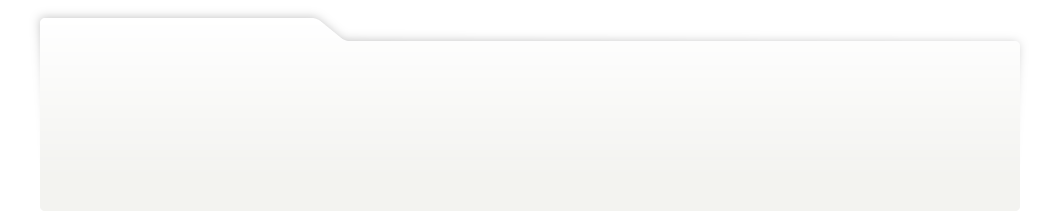
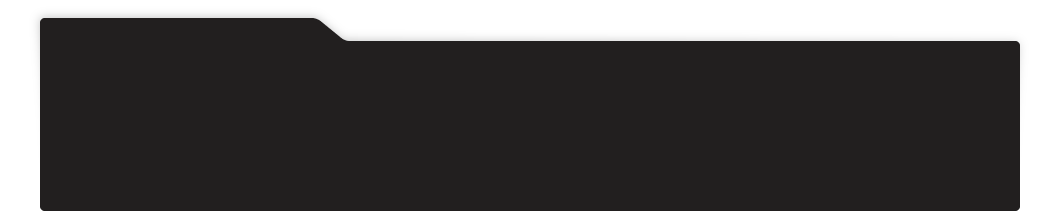
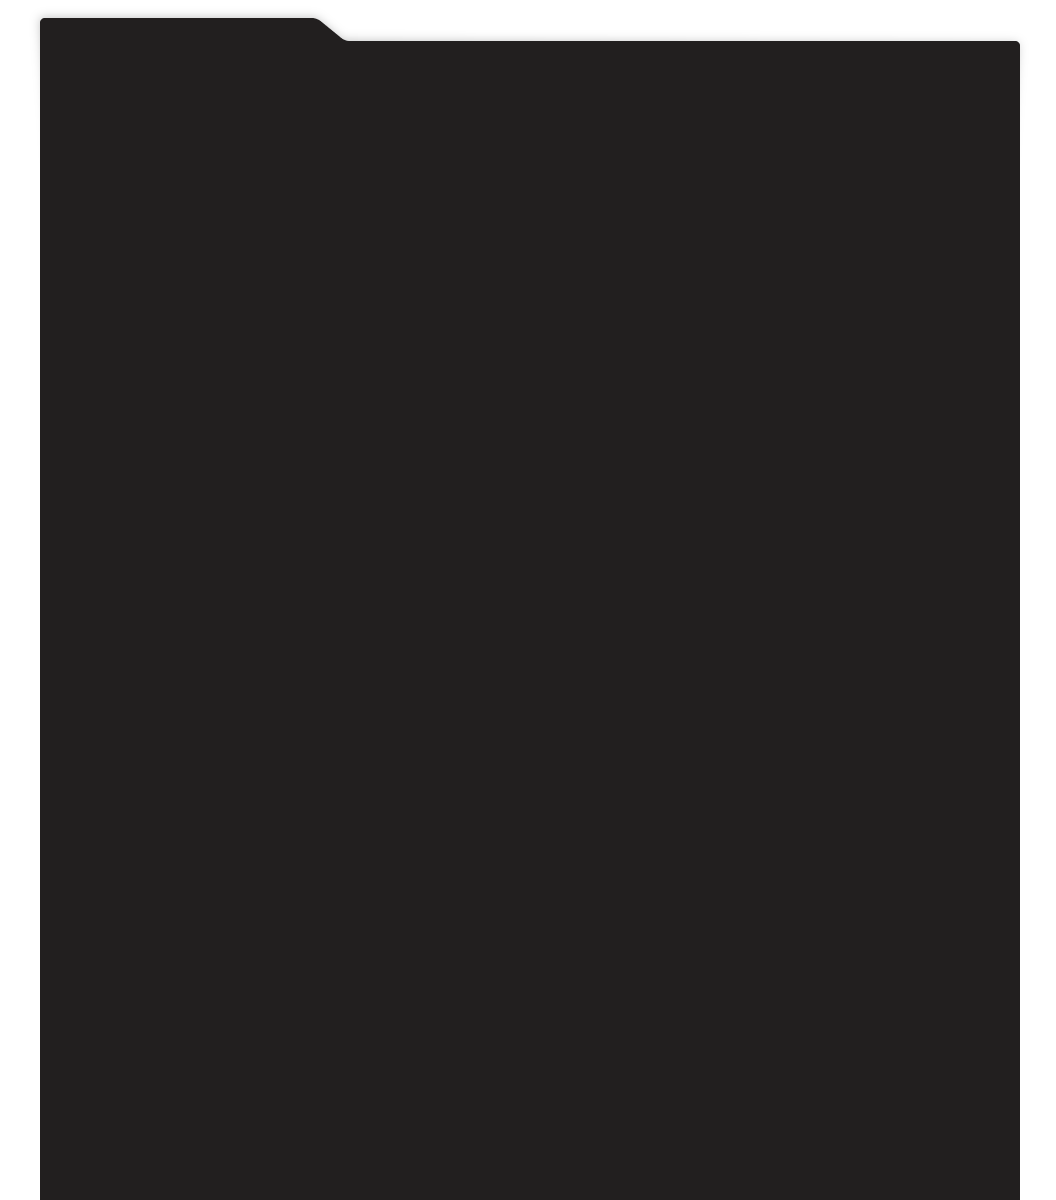
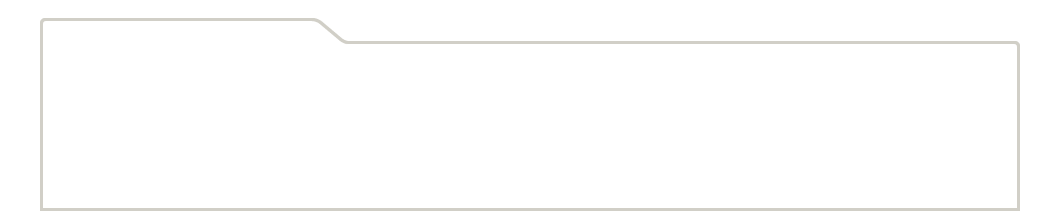
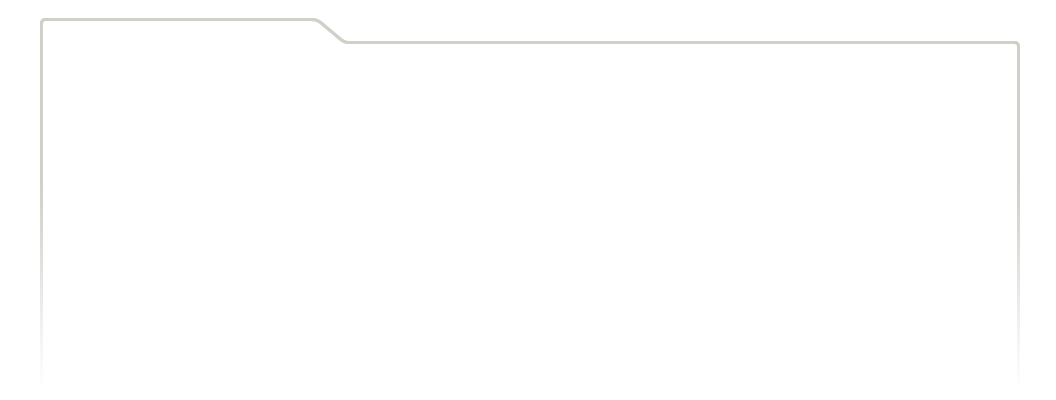
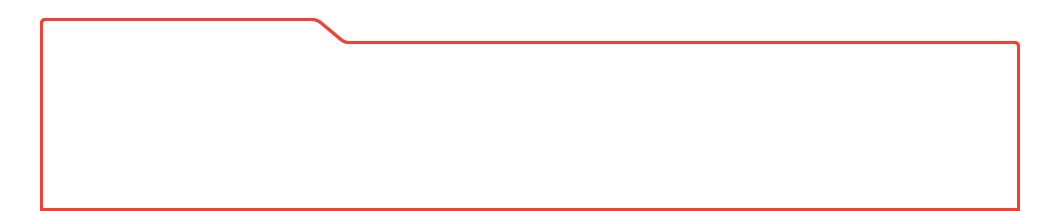
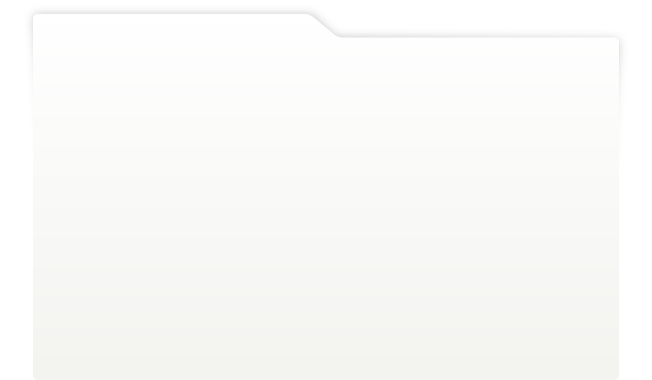
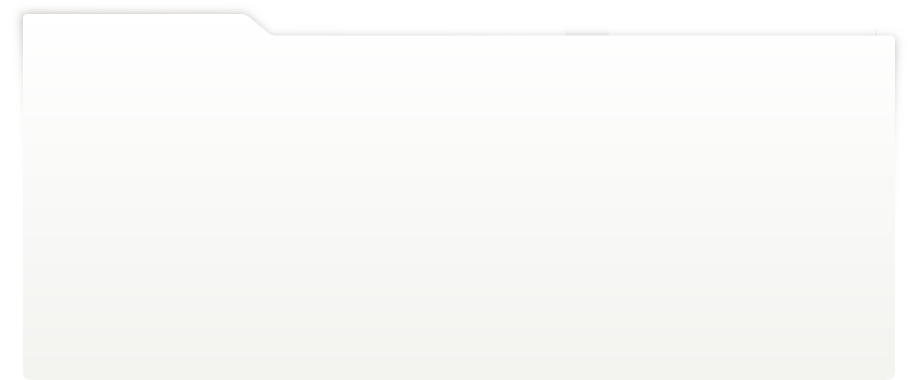
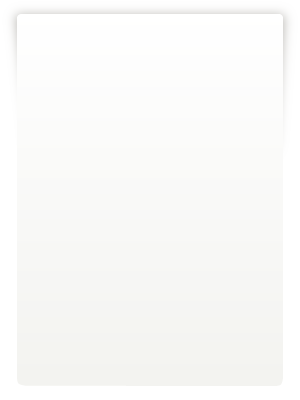
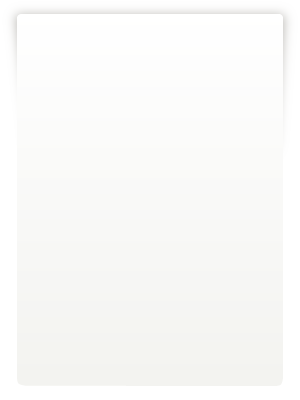
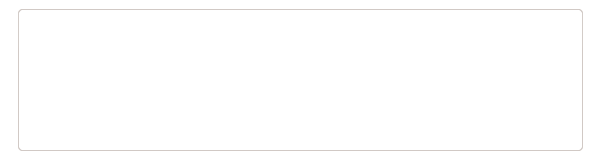
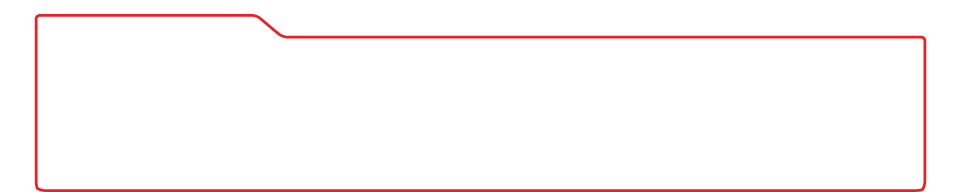
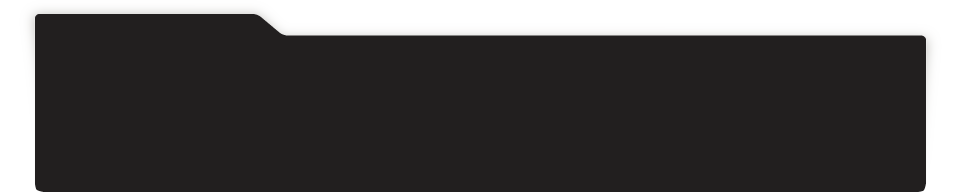
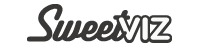
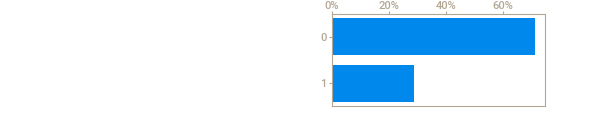
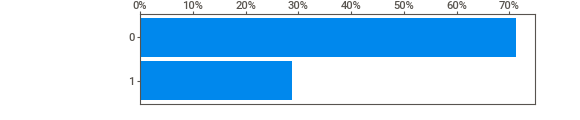
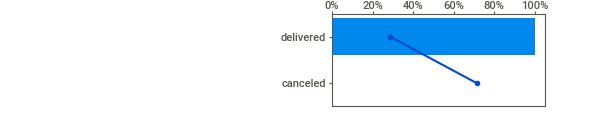
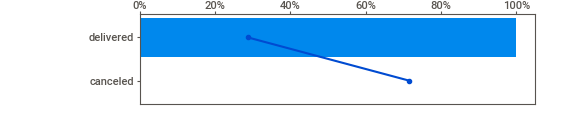
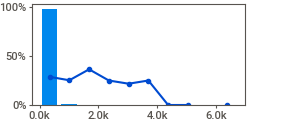
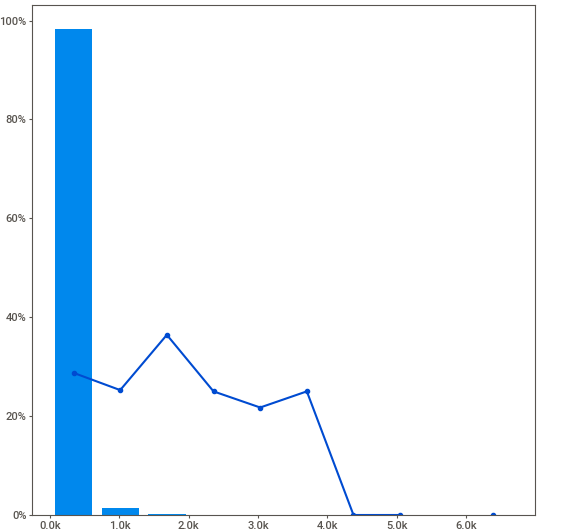
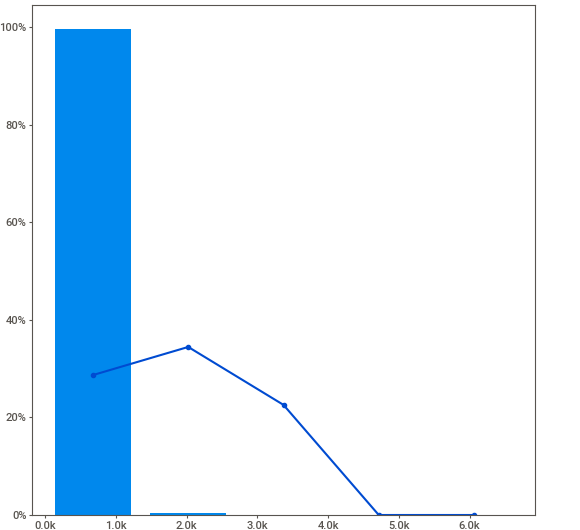
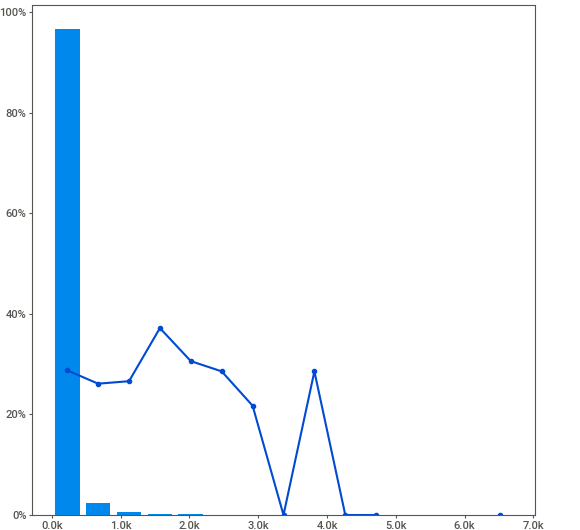
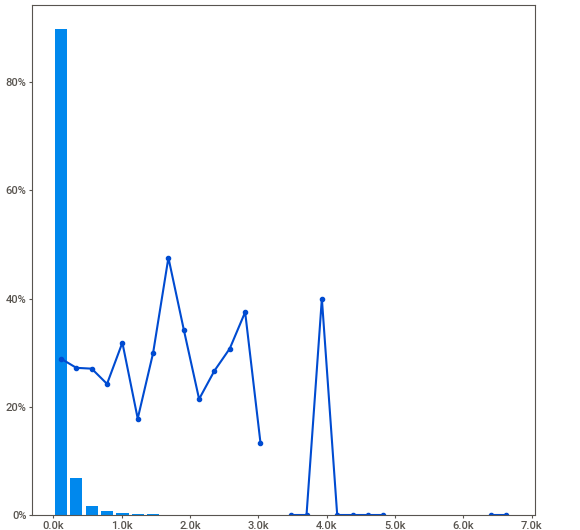
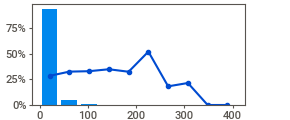
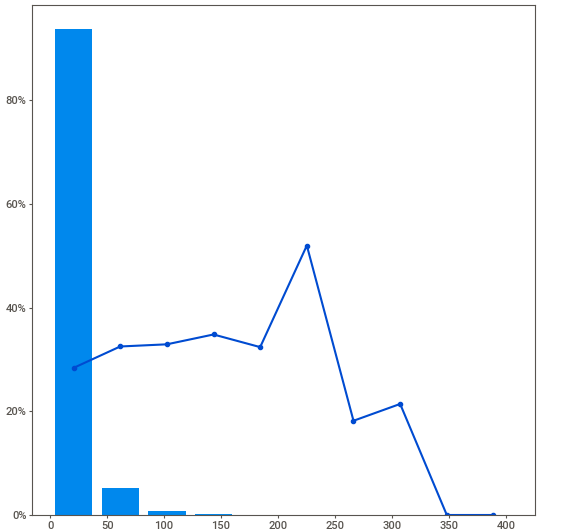
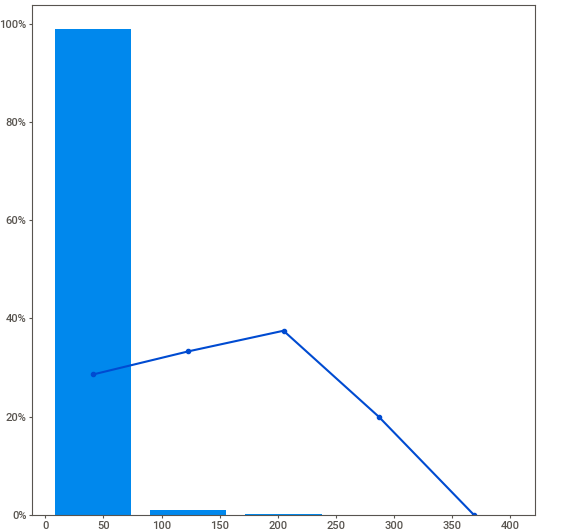
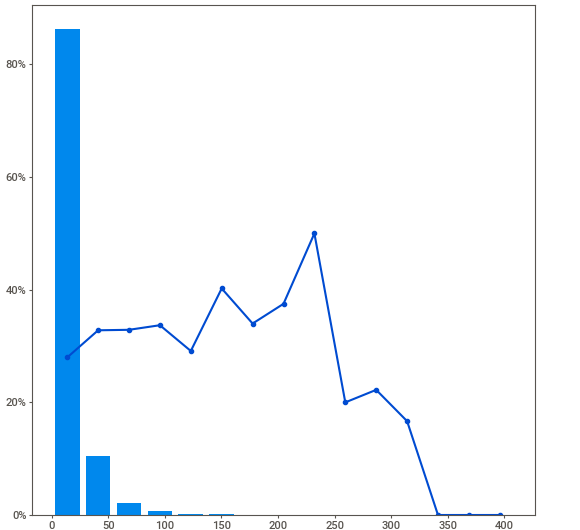
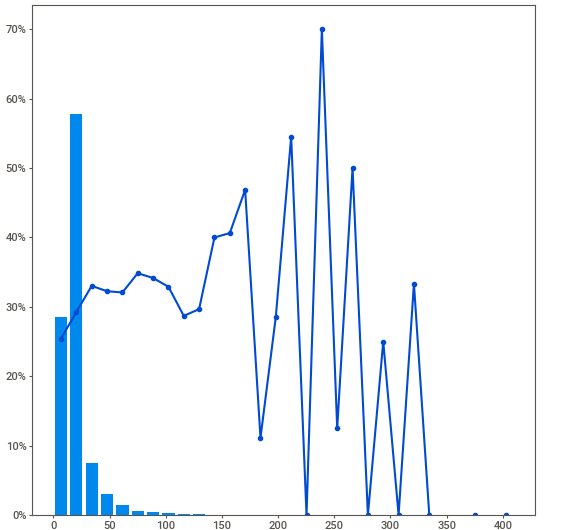
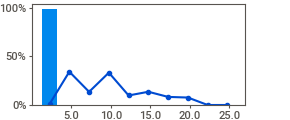
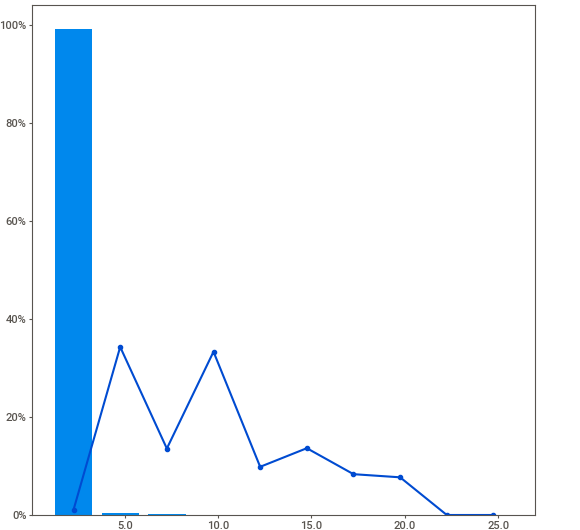
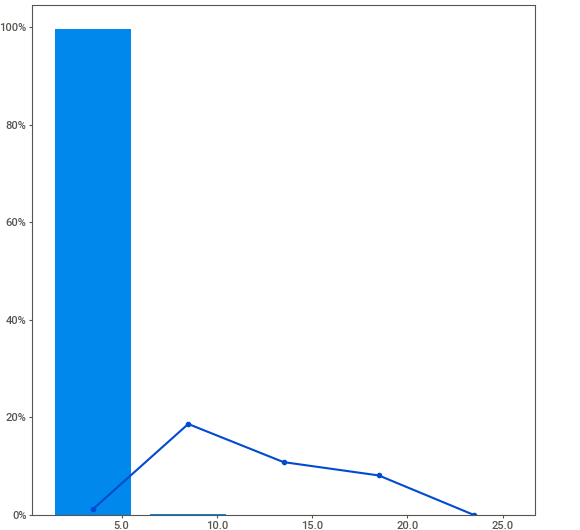
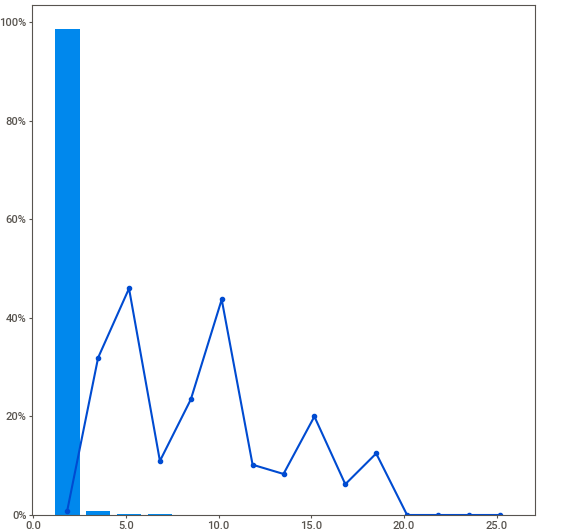
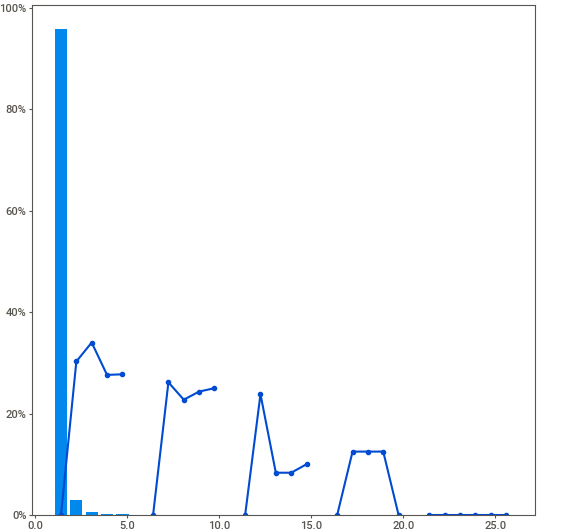
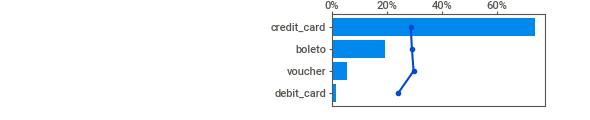
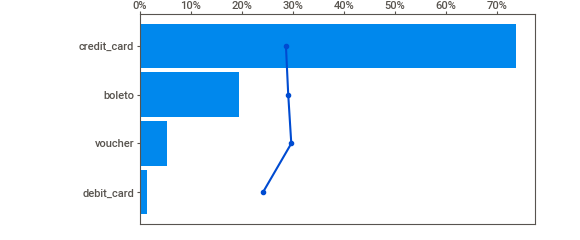
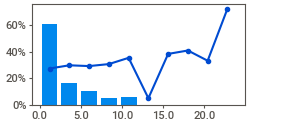
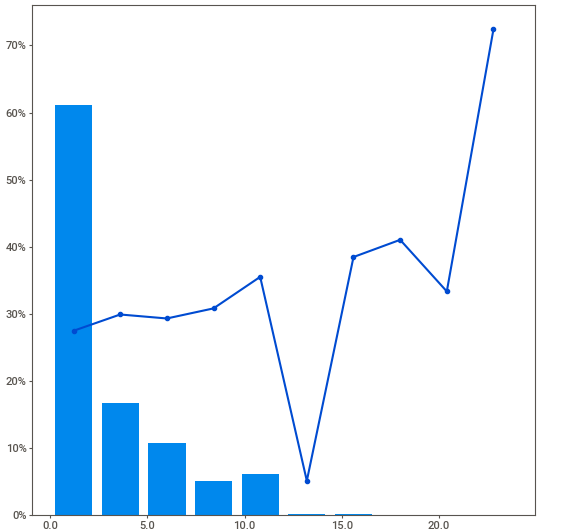
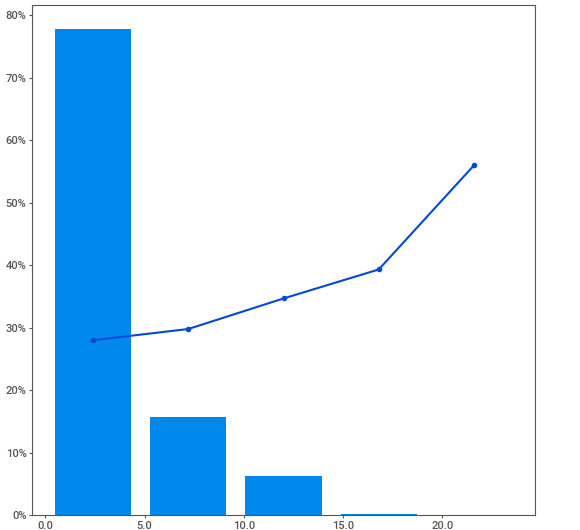
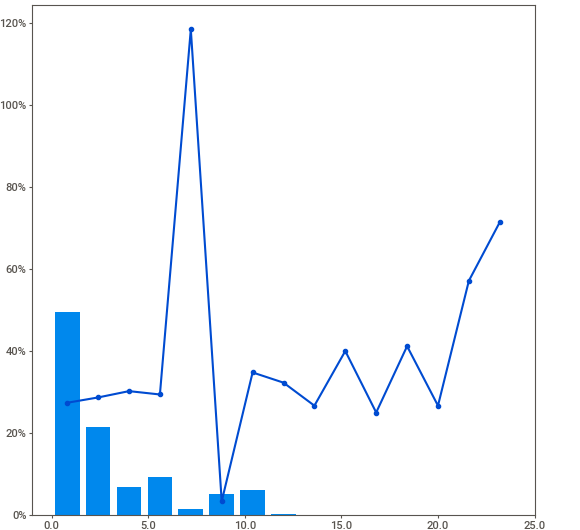
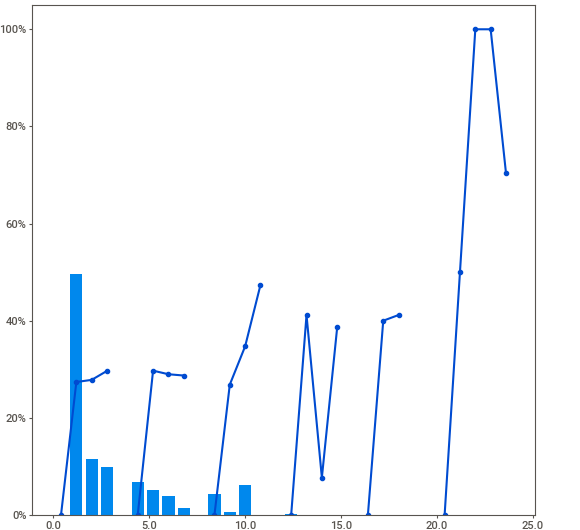
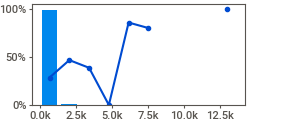
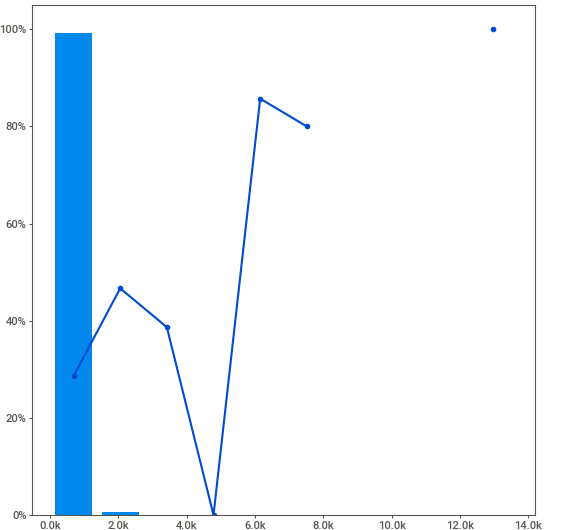
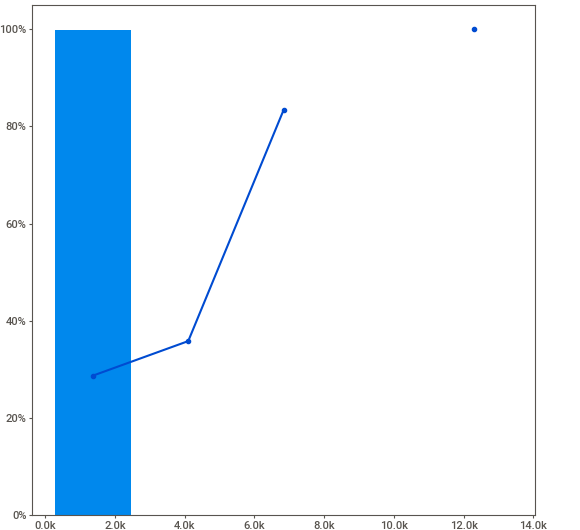
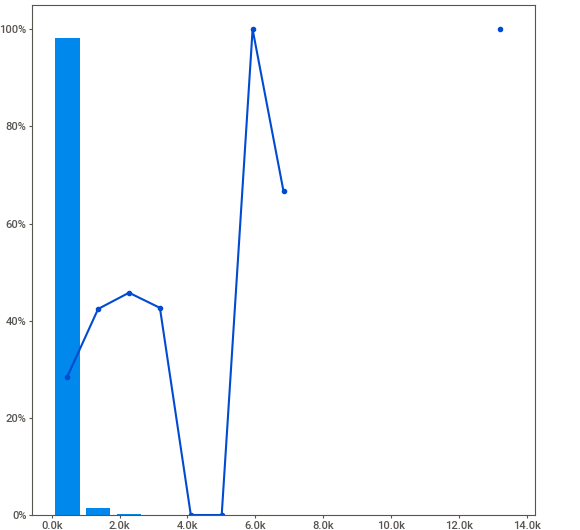
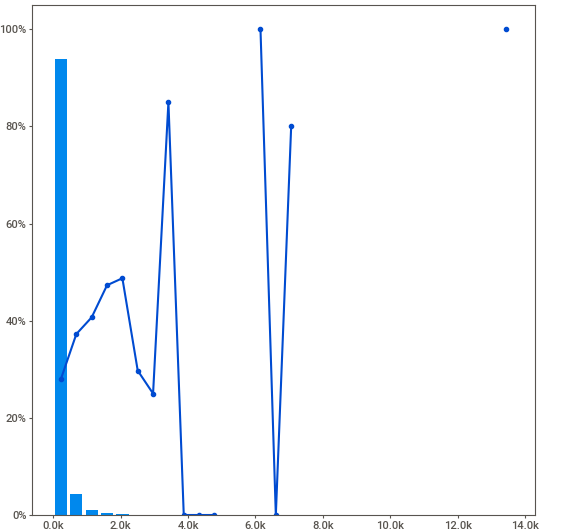
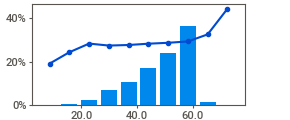
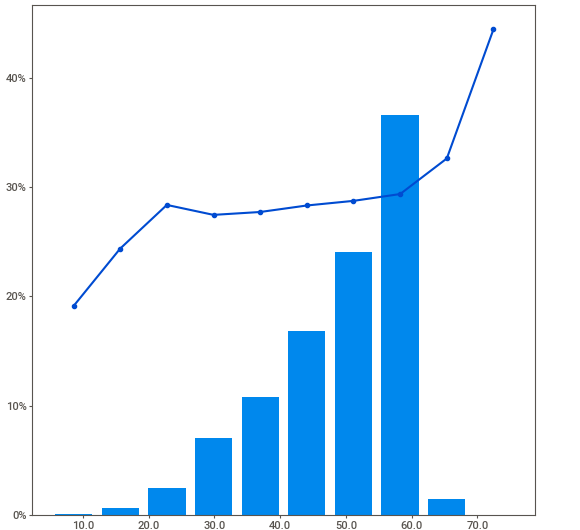
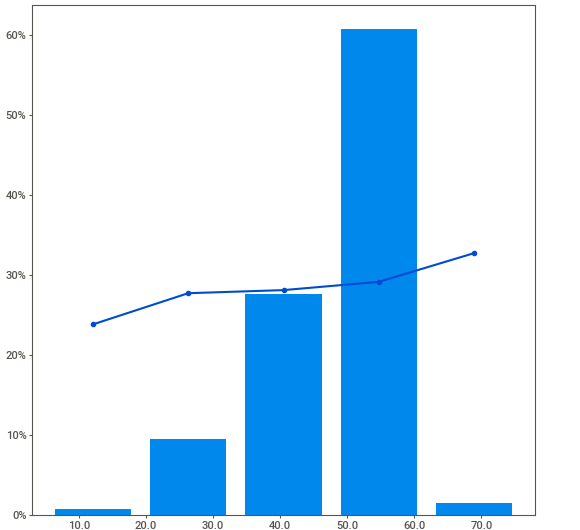
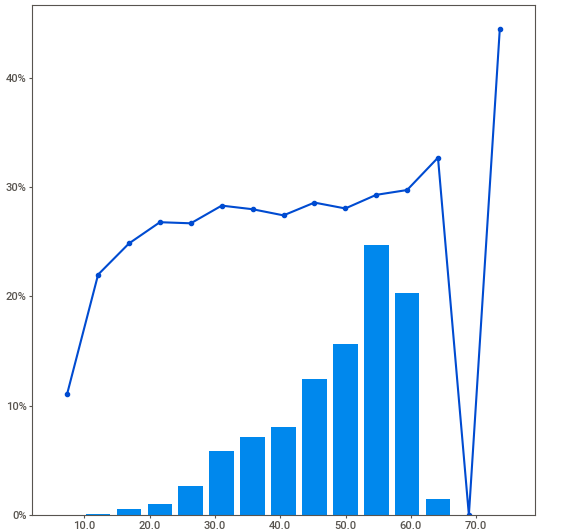
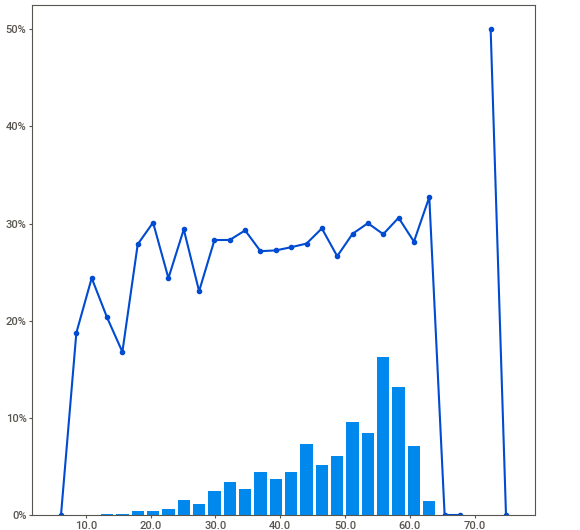
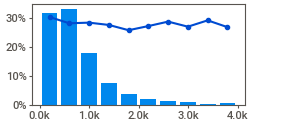
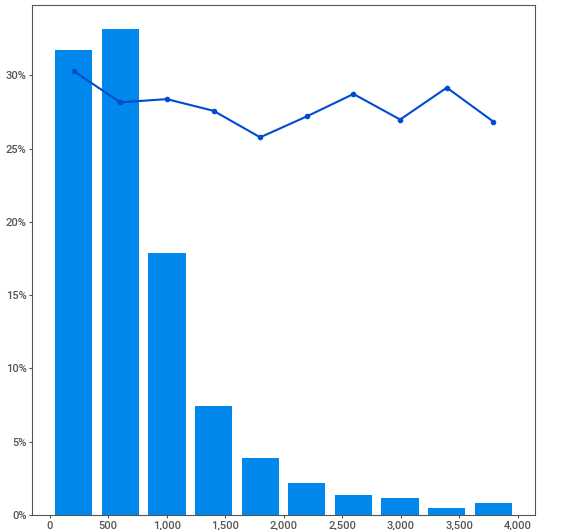
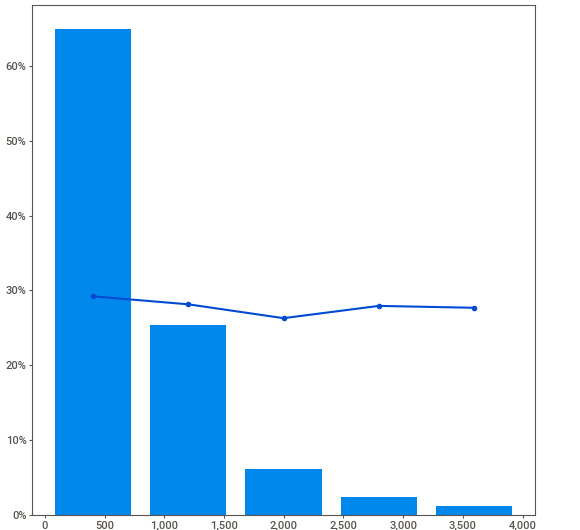
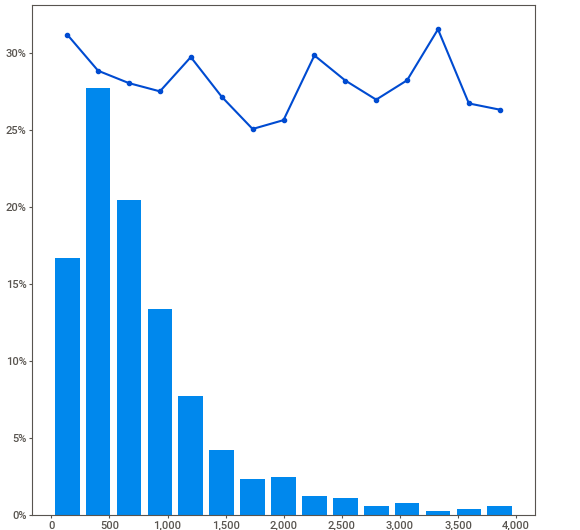
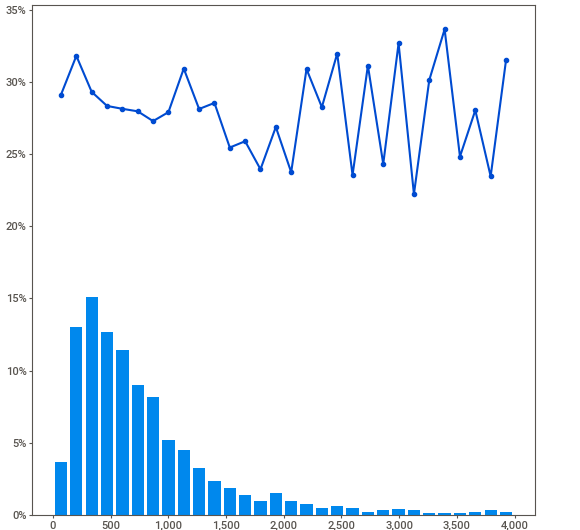
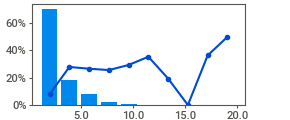
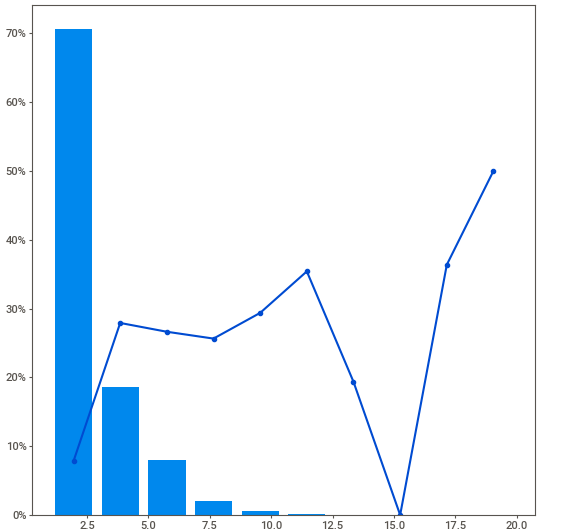
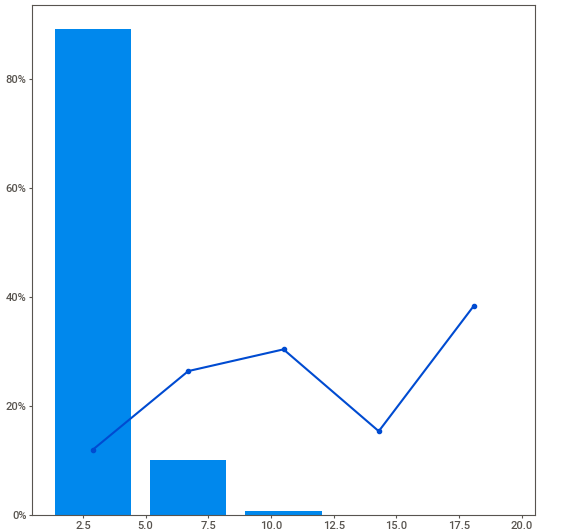
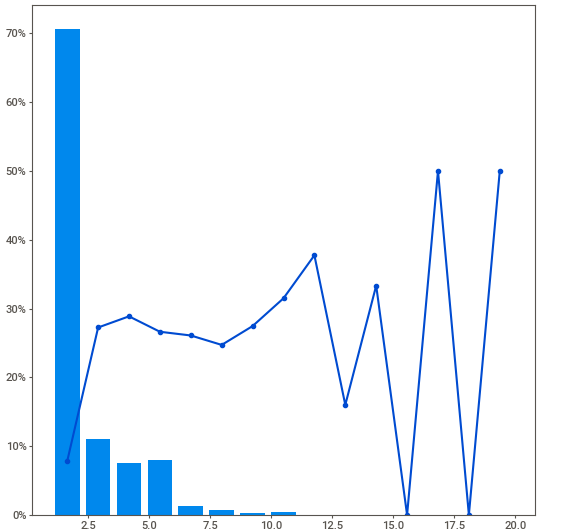
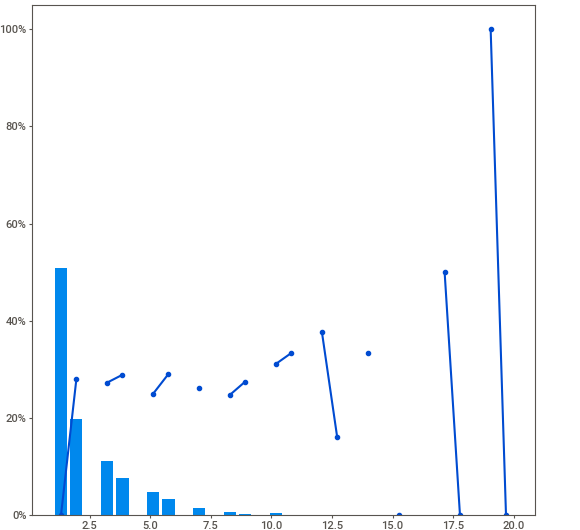
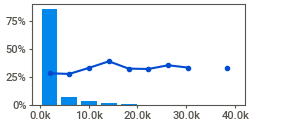
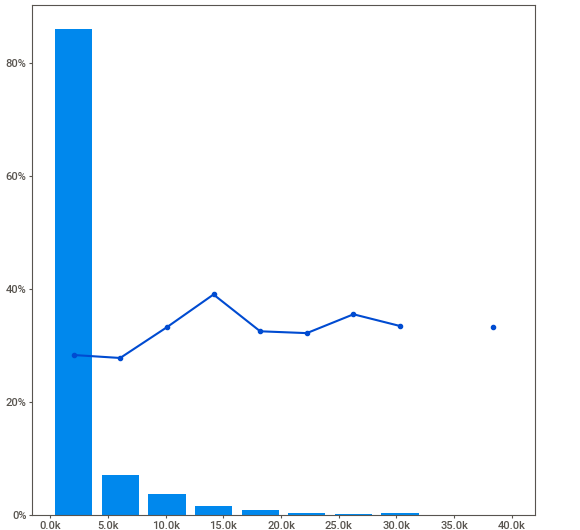
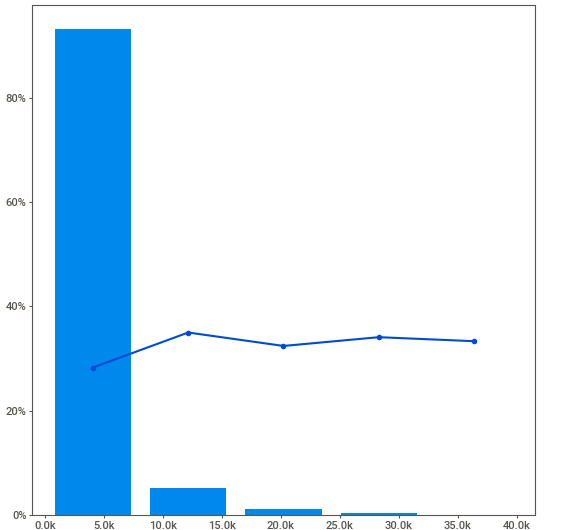
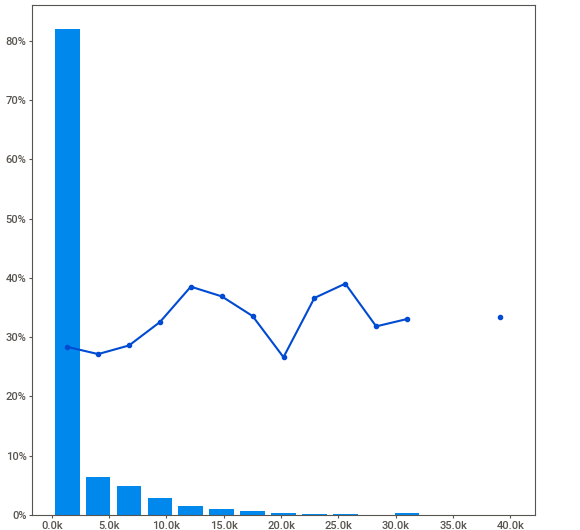
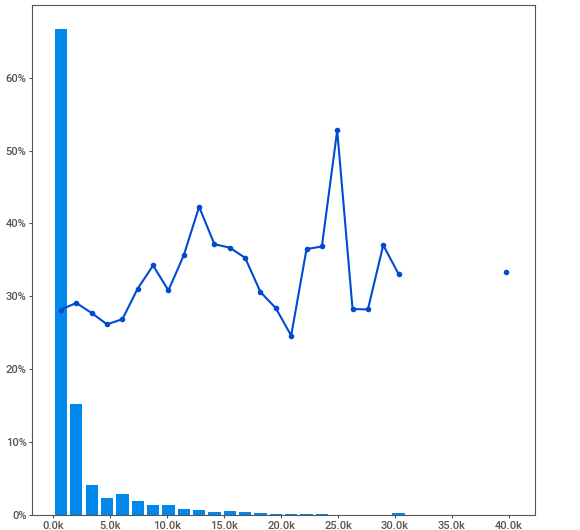
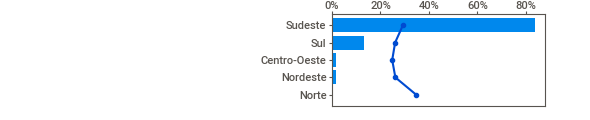
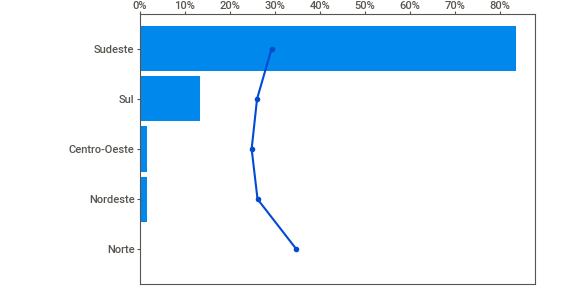
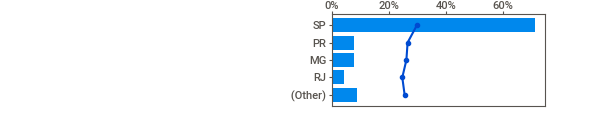
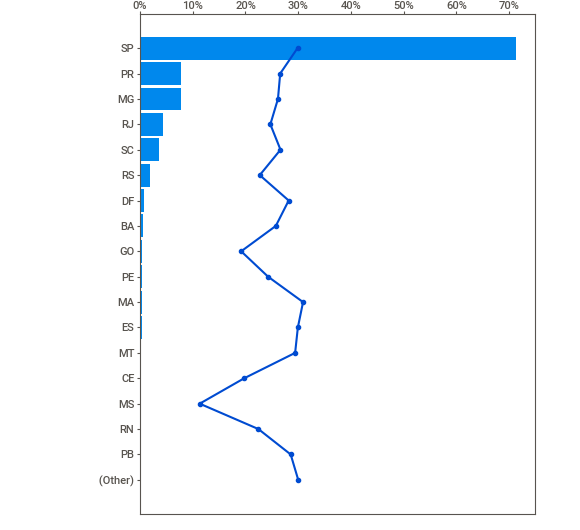
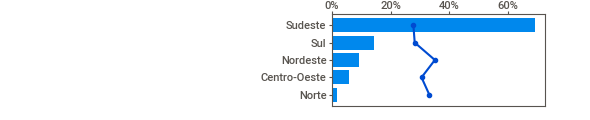
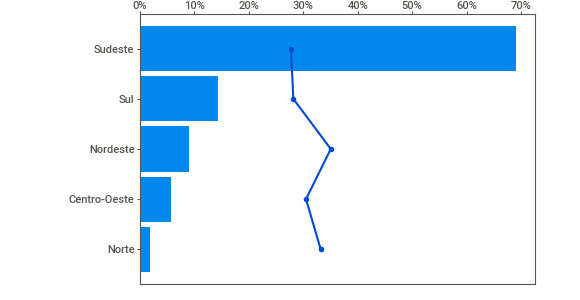
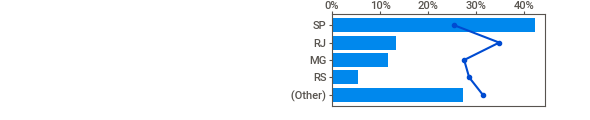
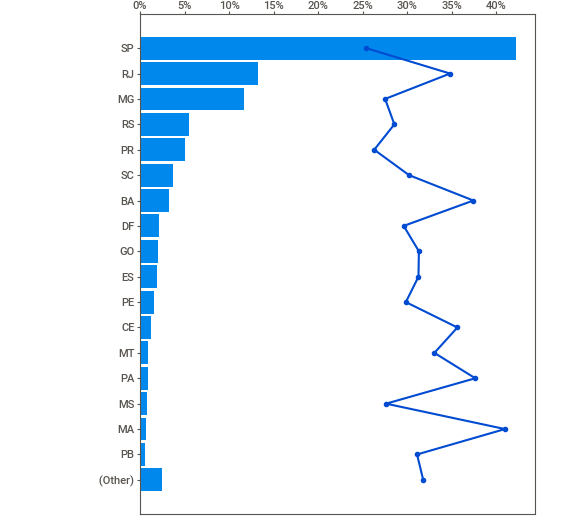
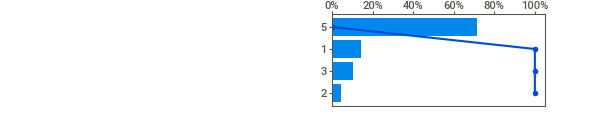
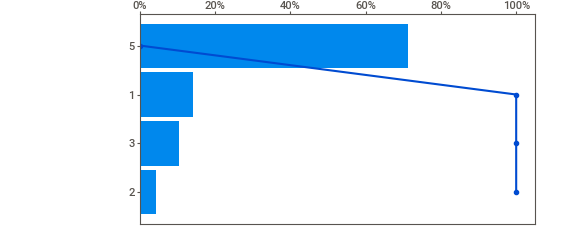
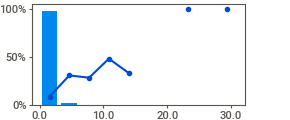
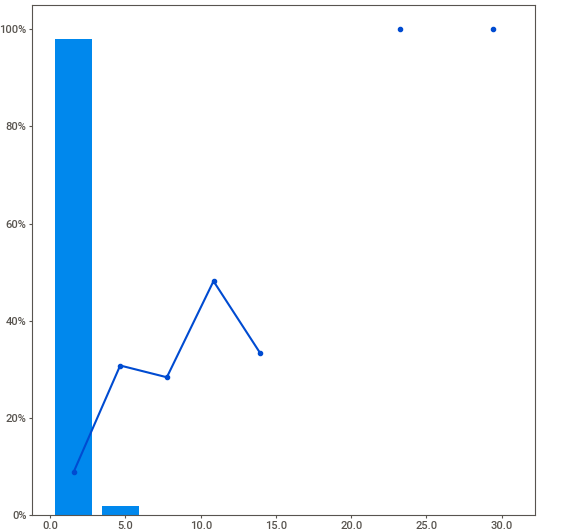
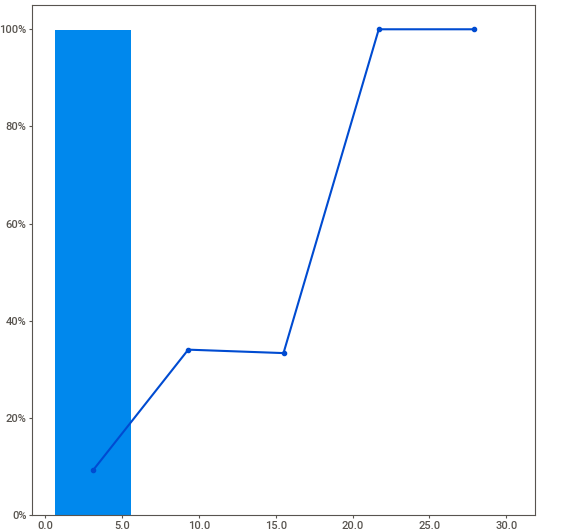
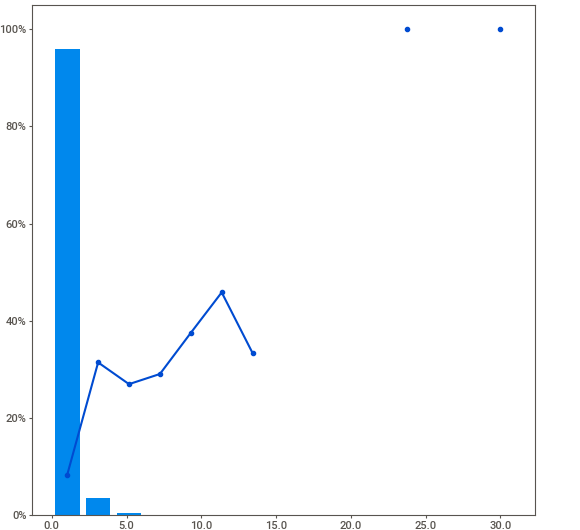
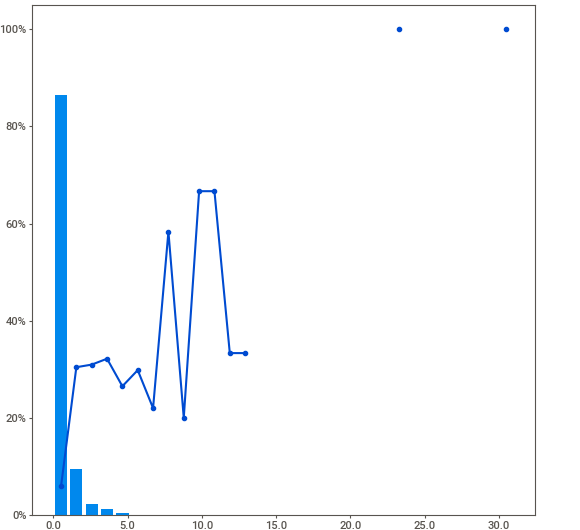
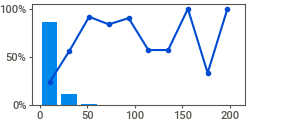
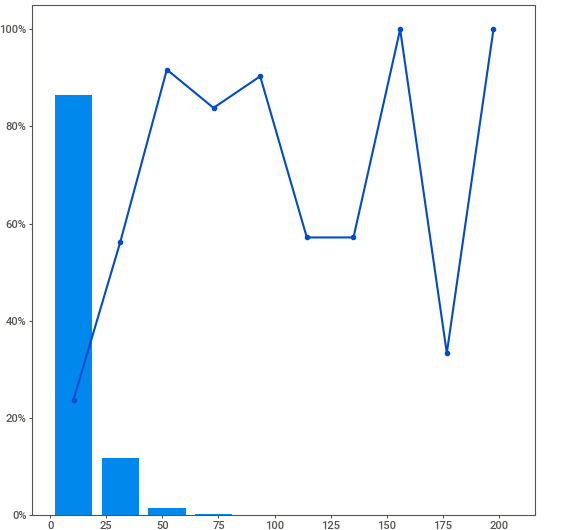
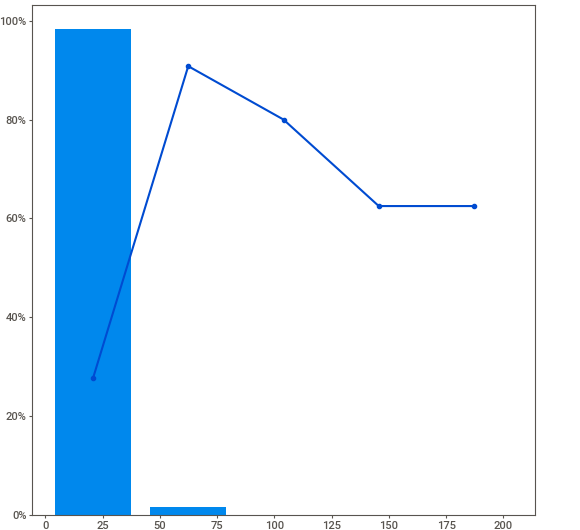
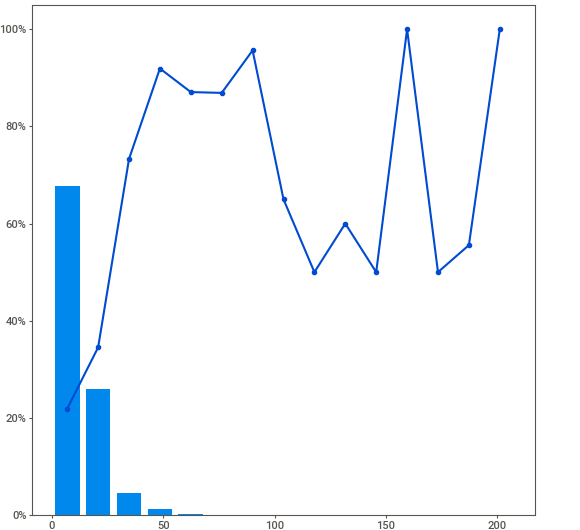
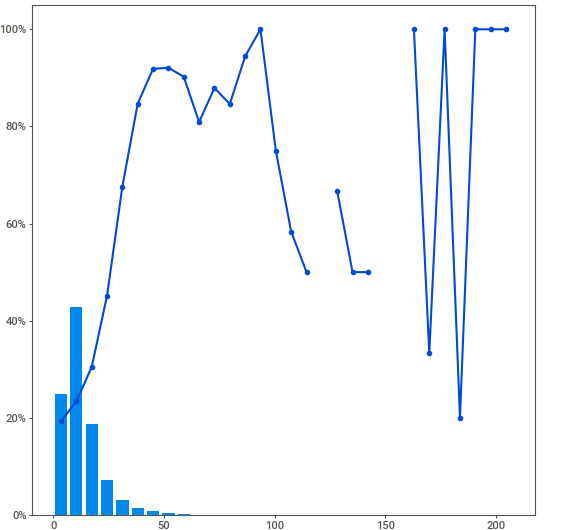
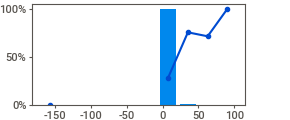
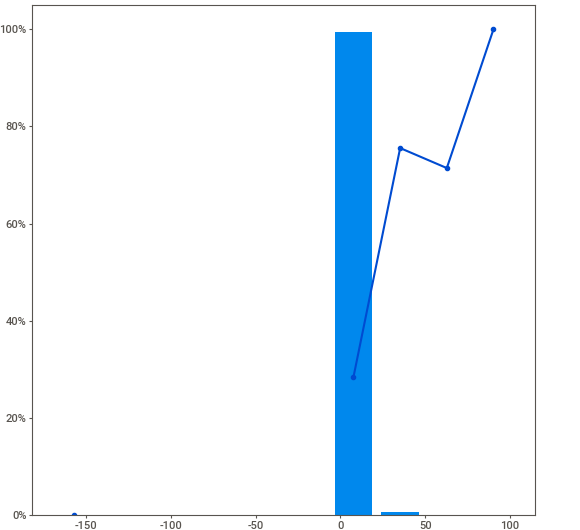
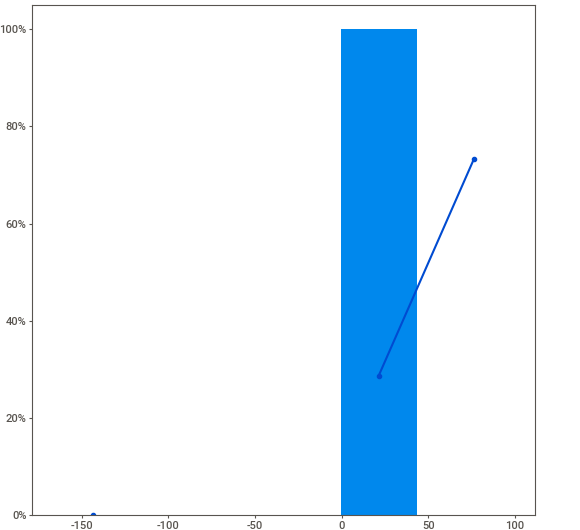
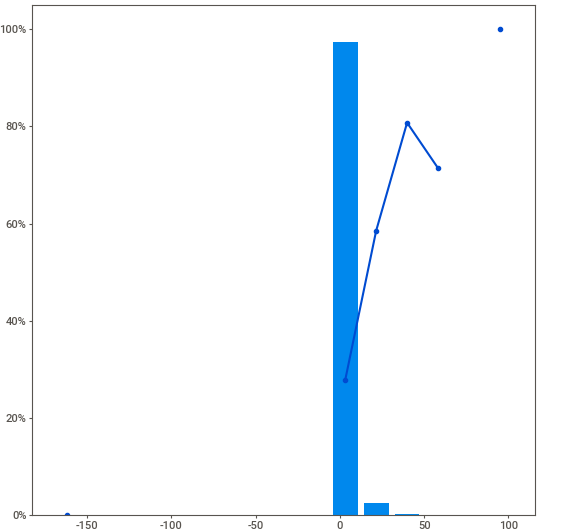
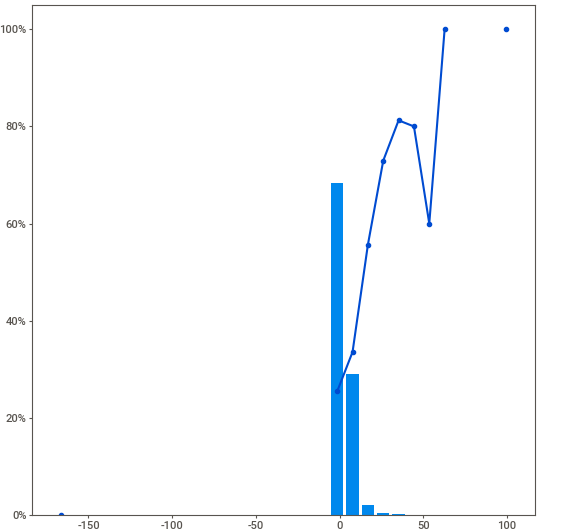
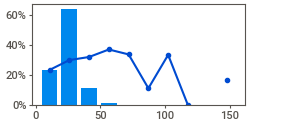
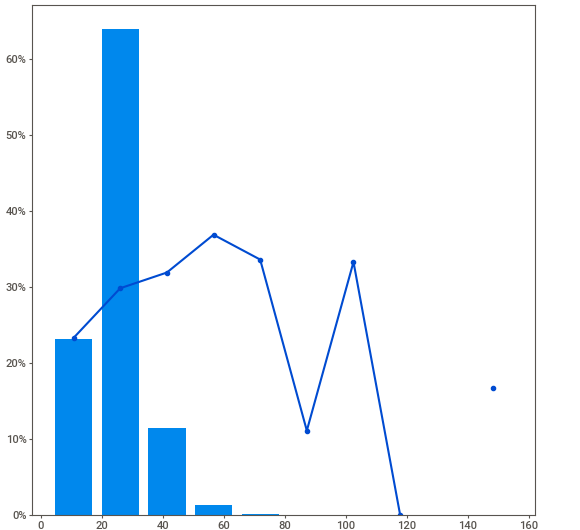
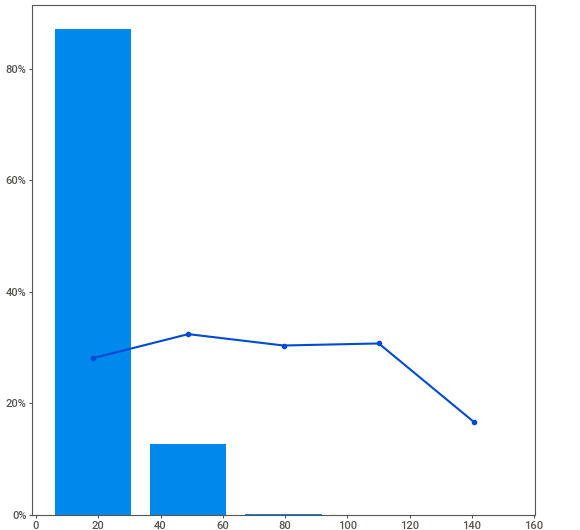
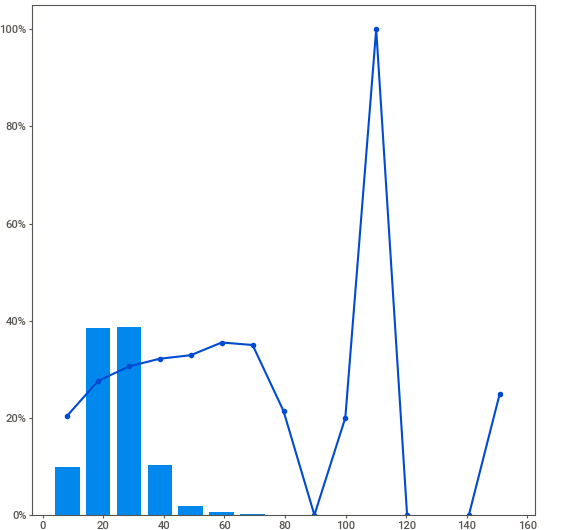
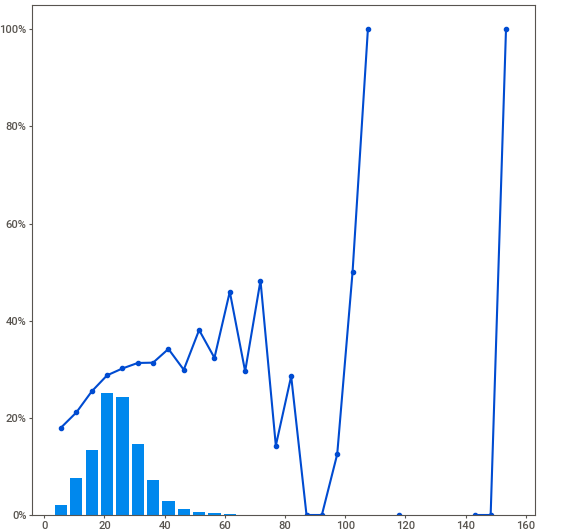
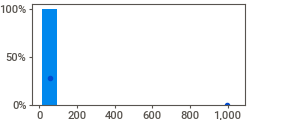
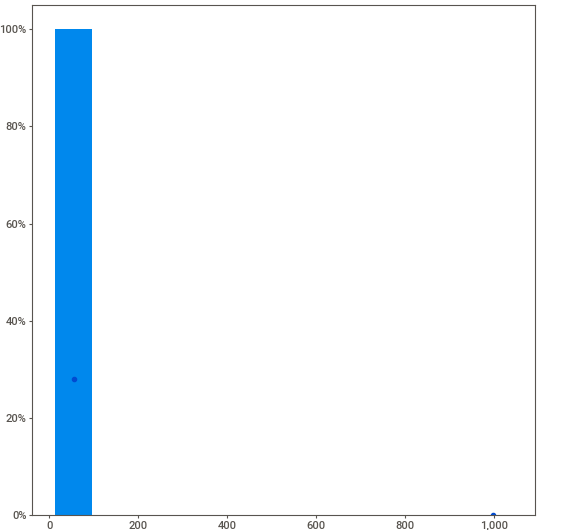
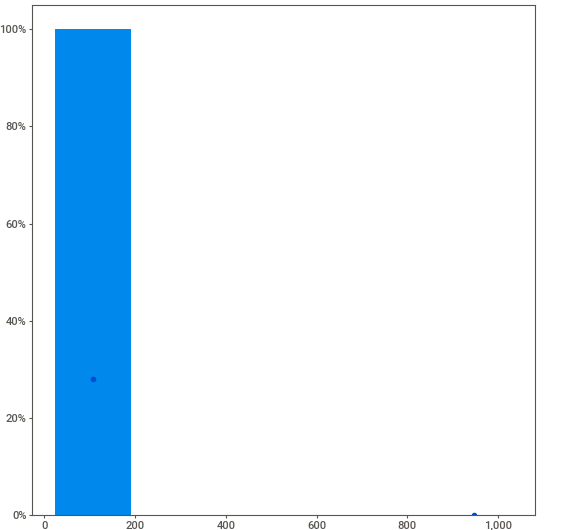
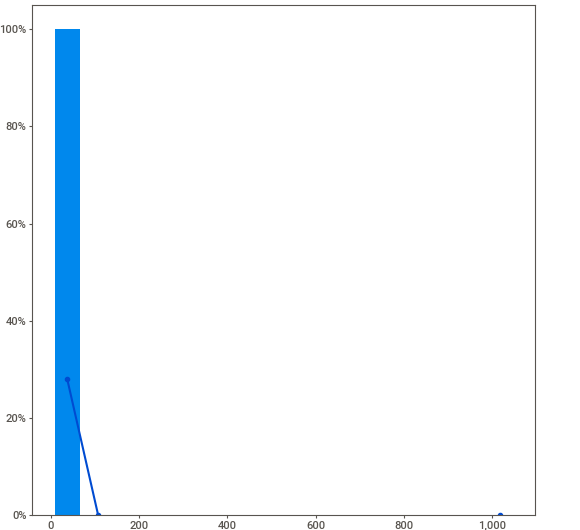
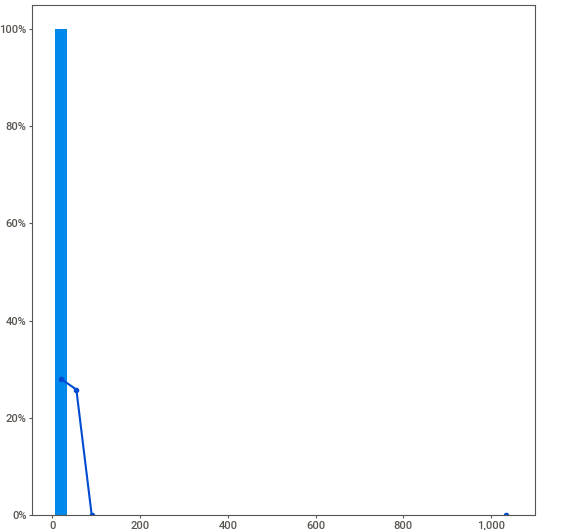
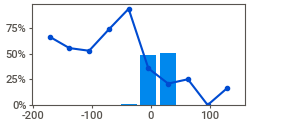
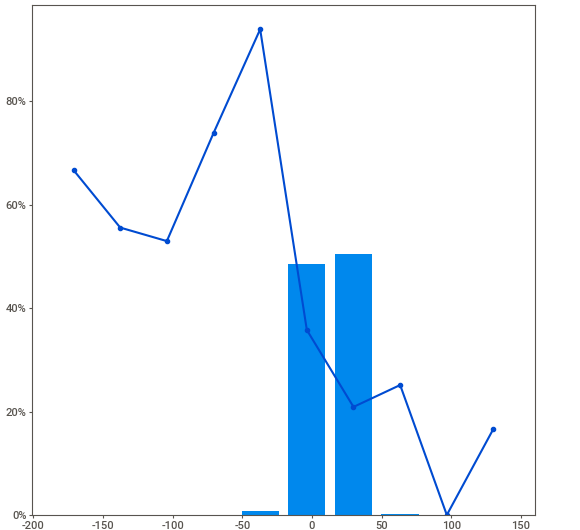
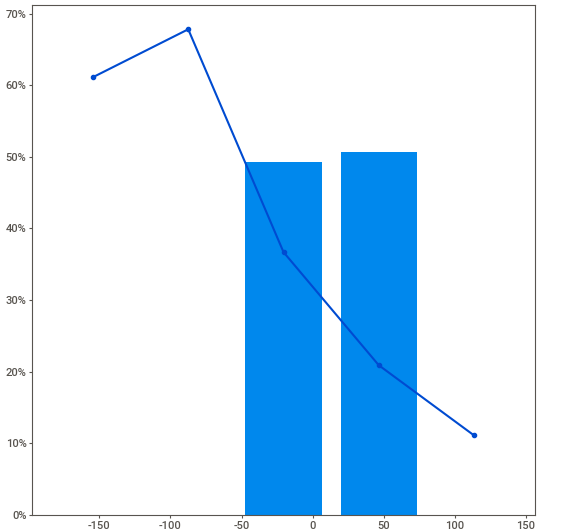
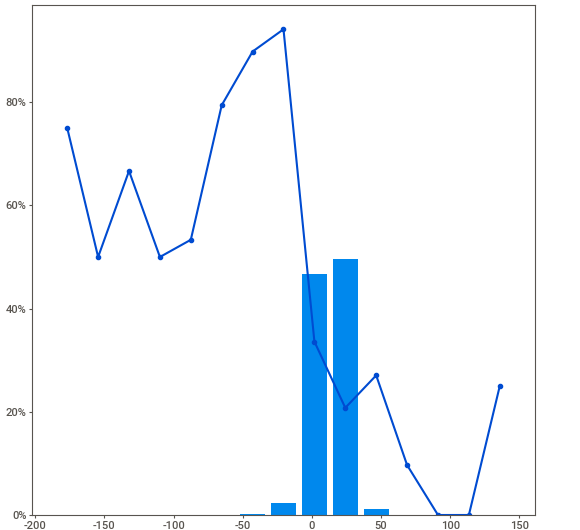
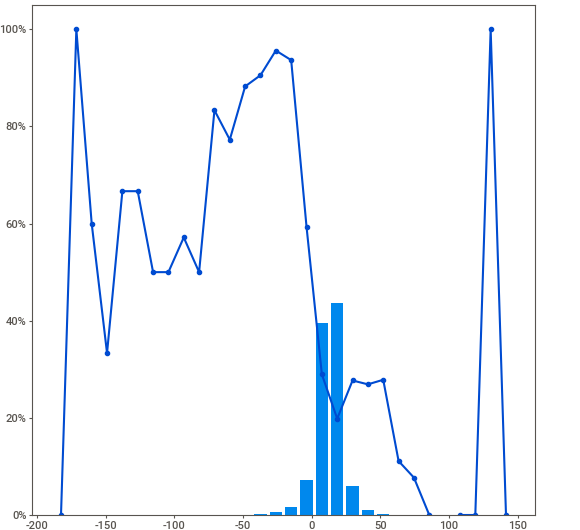
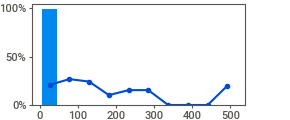
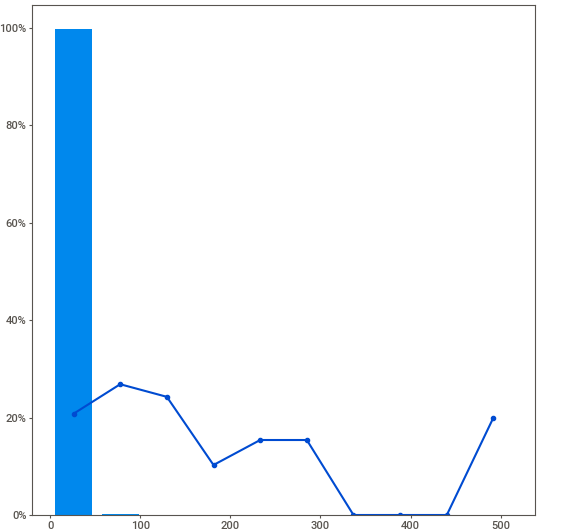
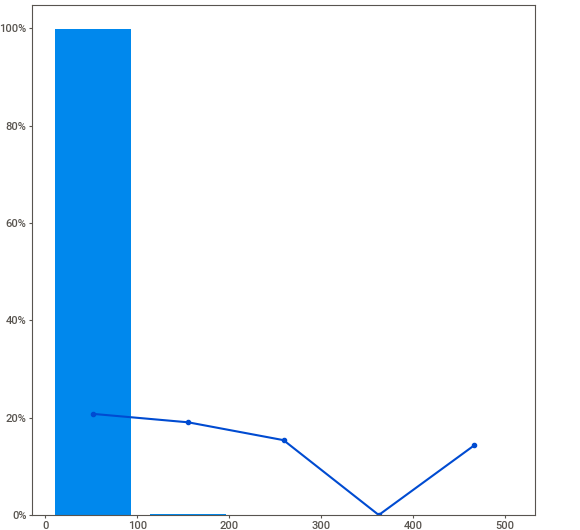
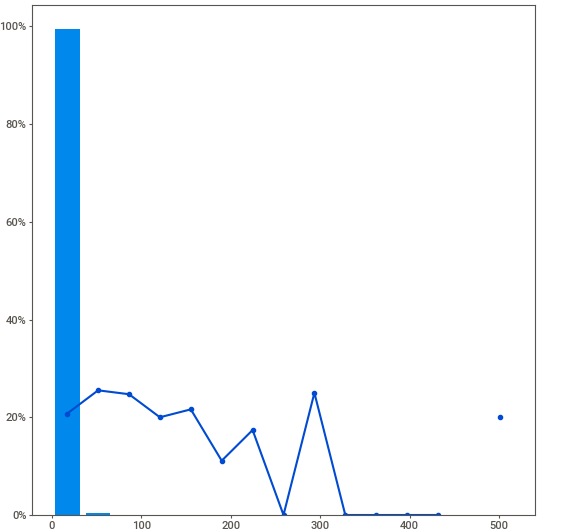
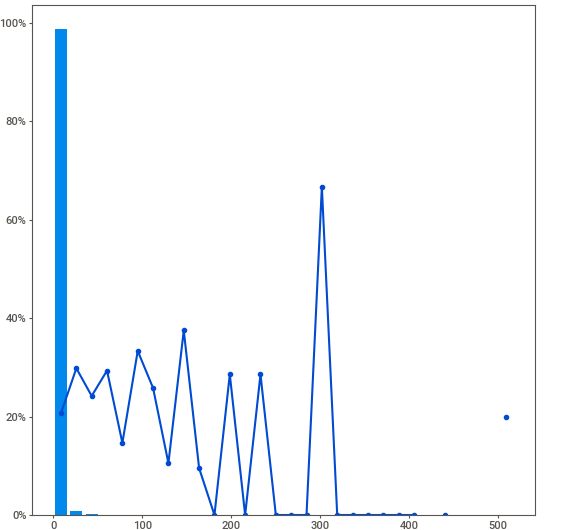
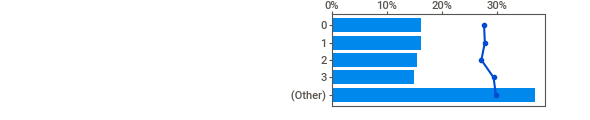
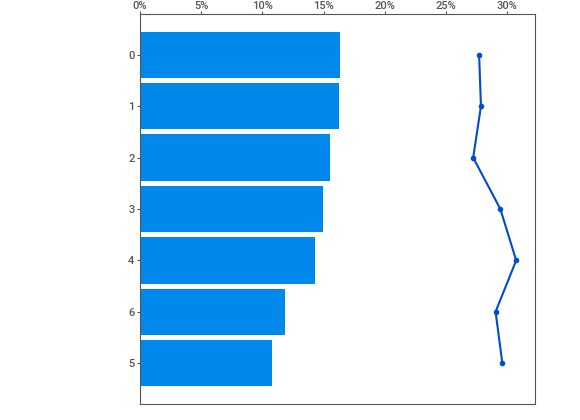
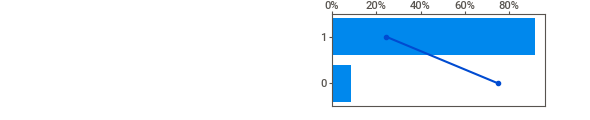
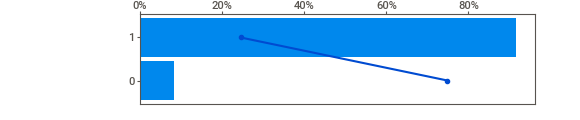
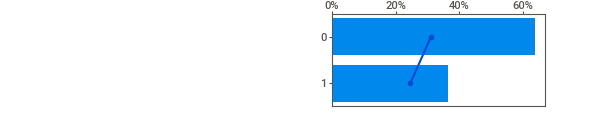
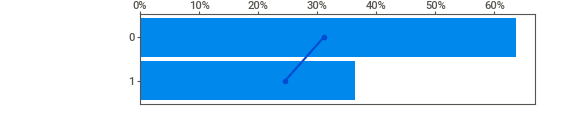
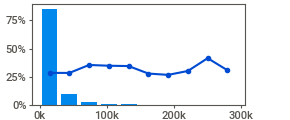
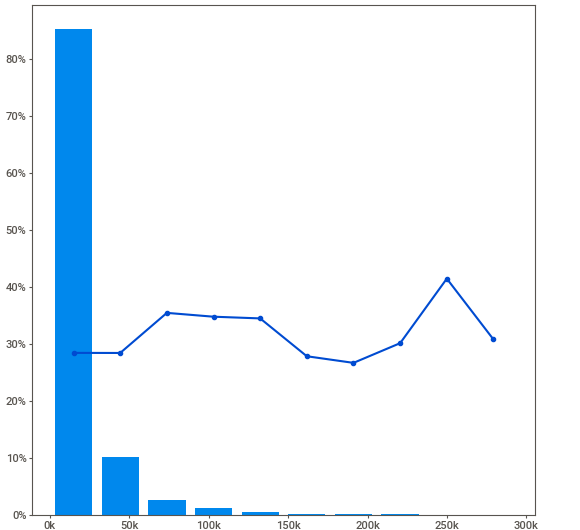
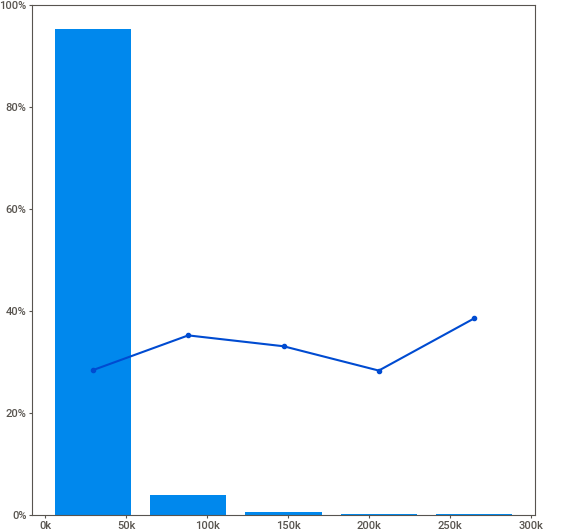
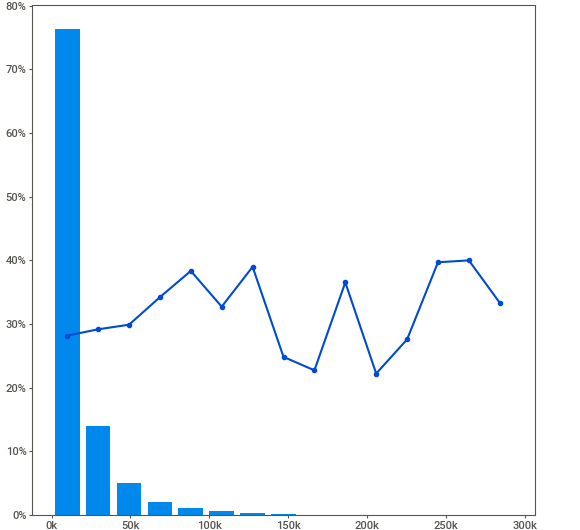
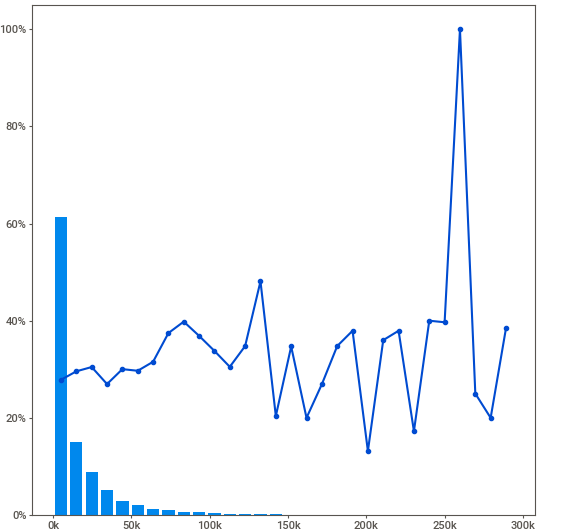
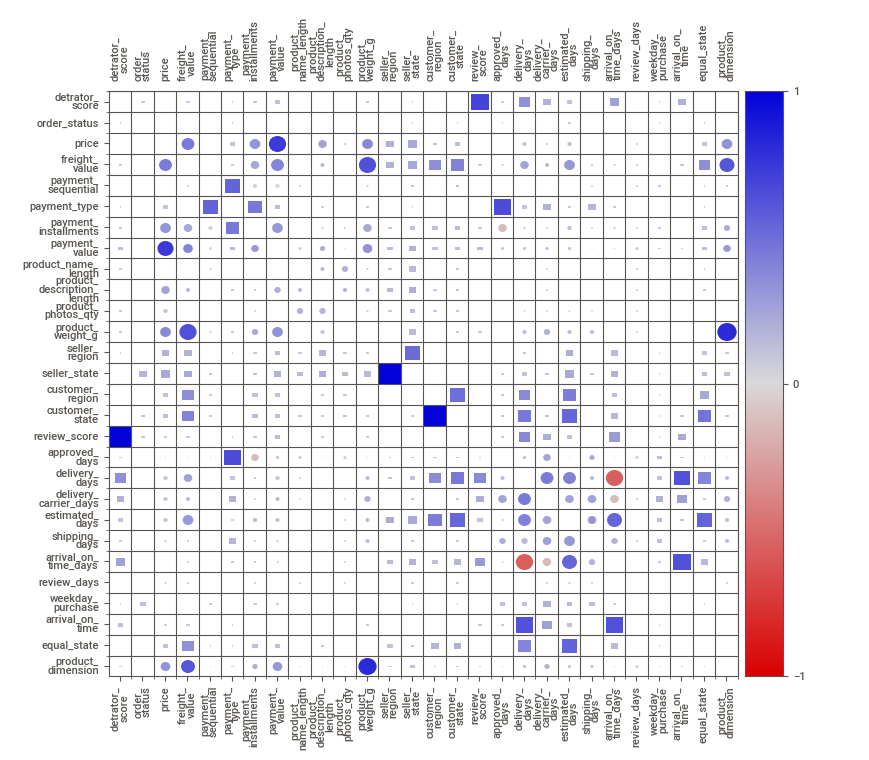
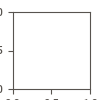

In [ ]:
eda = sv.analyze(source = df_ecommerce,
                 target_feat = 'detrator_score')
eda.show_notebook()

**Insights**:
- Em relação ao status do pedido (order_status), verificamos que a maioria (99,99%) correspondem a pedidos entregues e existem apenas 7 pedidos cancelados. Portanto, como os pedidos cancelados possuem uma significância estatiscamente pequena, vamos desconsiderá-la dessa amostra.
- Quanto maior o preço, menor a frequência de detratores. Isso pode indicar um problema com produtos de preços maiores.
- Quanto maior o número de parcelas de pagamento (payment_installments), maior a frequência de detratores.
- Quanto maior o valor a ser pago (payment_value), maior a fequência de detratores.
- Quanto maior o tempo para aprovar o pagamento (approved_days), maior a frequência de detratores.
- Quanto maior o tempo para entregar o produto após aprovação do pagamento (delivery_days), maior a frequência de detratores. Aqui, podemos verificar uma correlação bem significativa.
- Quanto mais tempo o vendedor demora para realizar a postagem do produto para envio (delivery_carrier_days), maior a frequência de detratores. Aqui, podemos verificar uma correlação significativa.
- Quanto maior o tempo estimado para enntrega do produto (estimated_days), maior a frequência de detratores.
- Quanto maior o tempo entre a data estimada de entrega e a data real de entrega do produto (arrival_on_time_days), maior a frequência de detratores. Isso também pode ser visto na variável que indica atraso (arrival_on_time). Apesar de apenas 7% das entregas tiveram atrasos, isso significou 82% de detratores.


                                             |          | [  0%]   00:00 -> (? left)


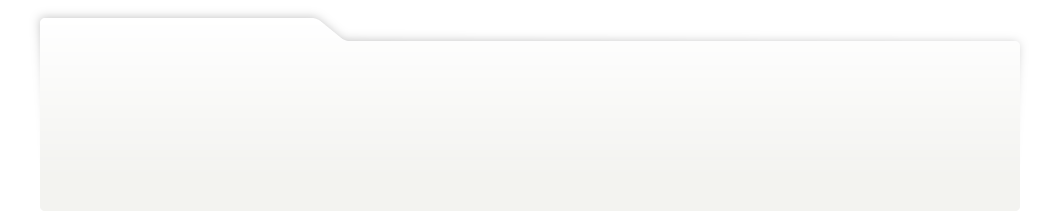
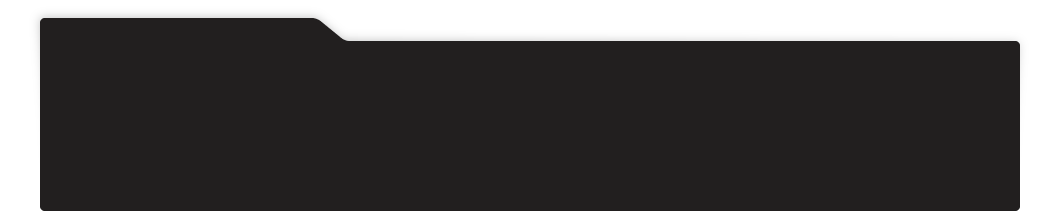
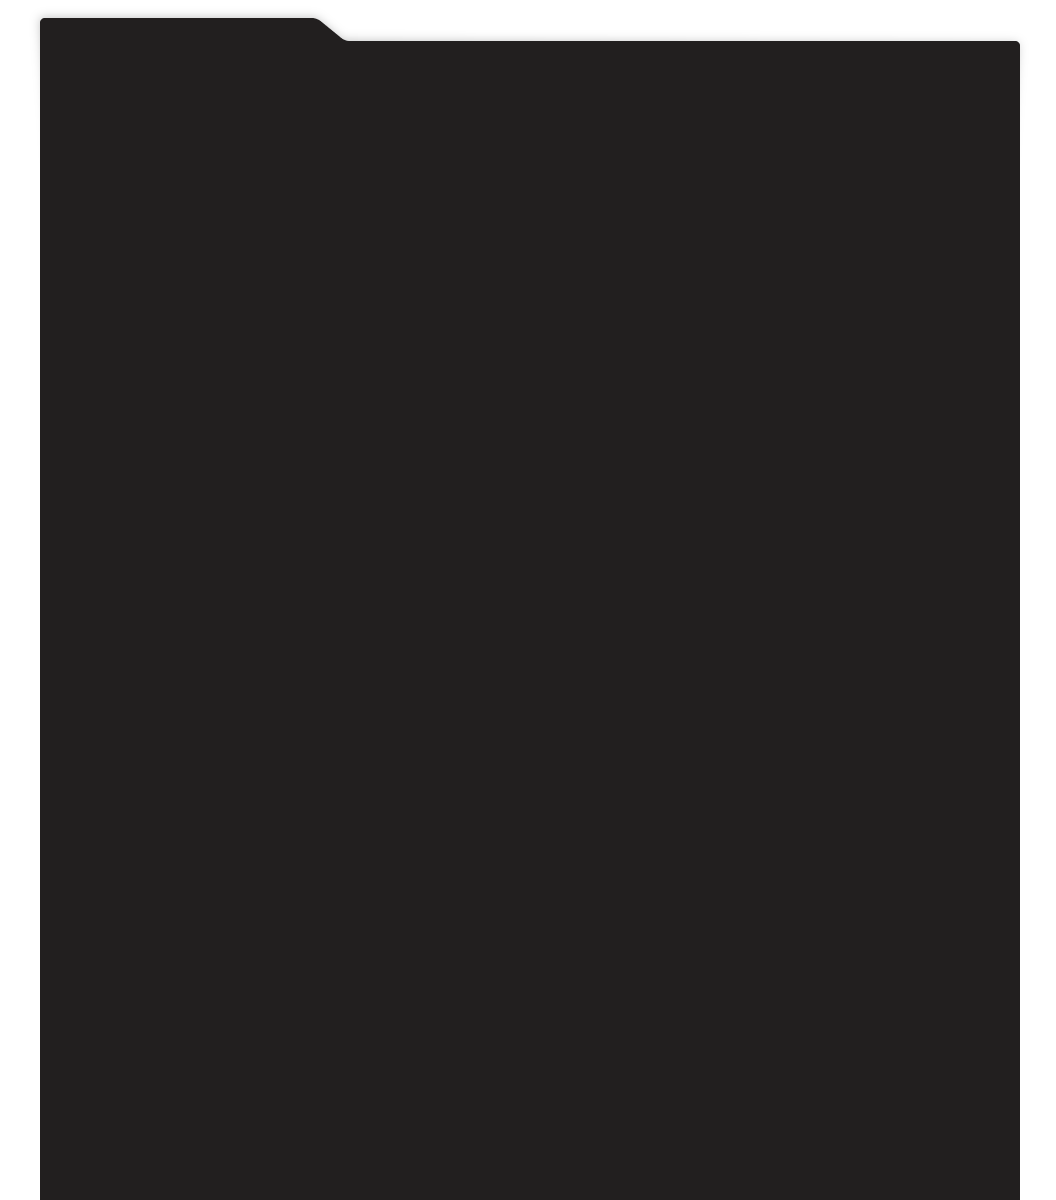
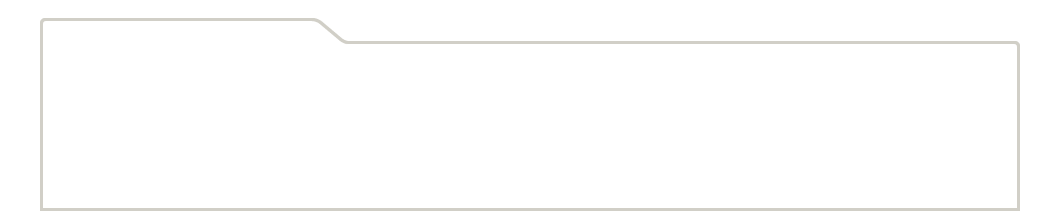
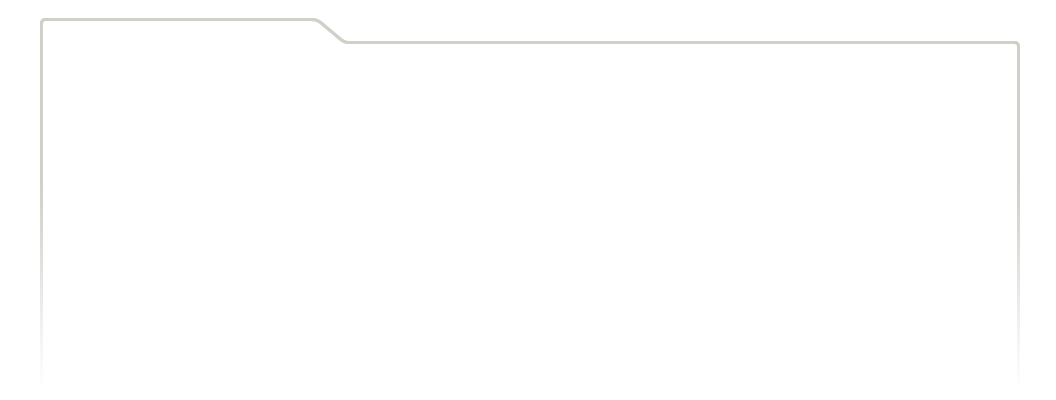
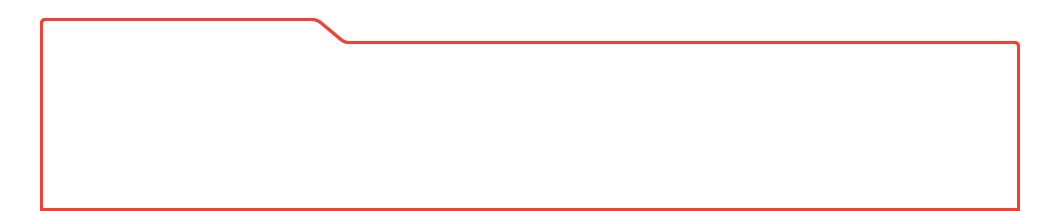
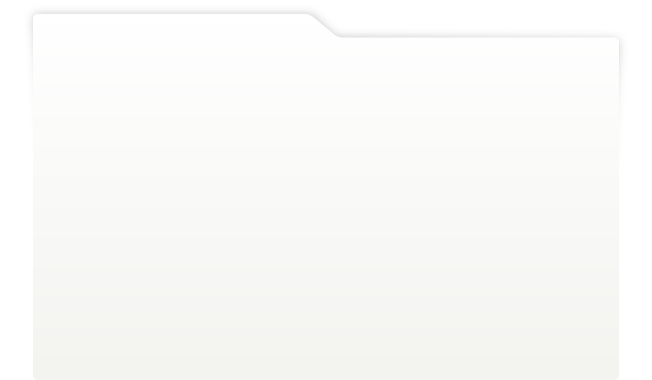
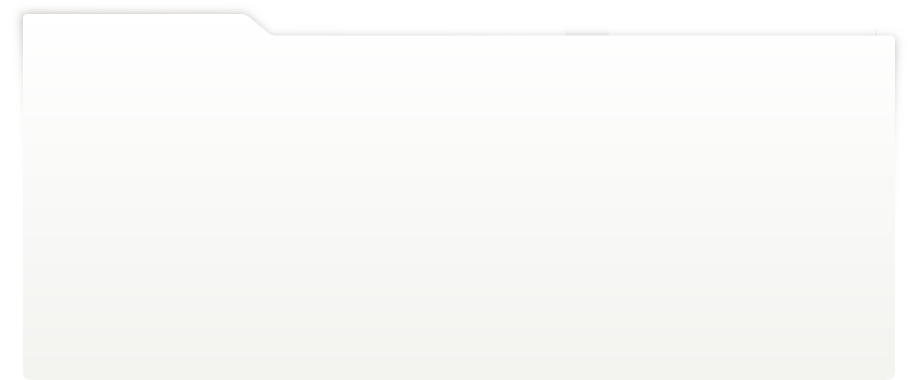
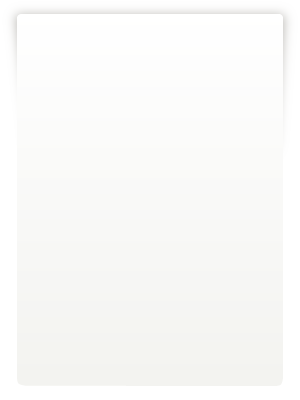
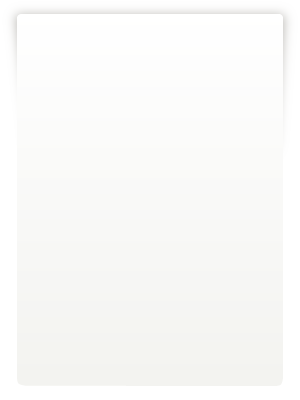
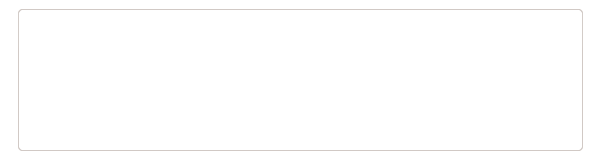
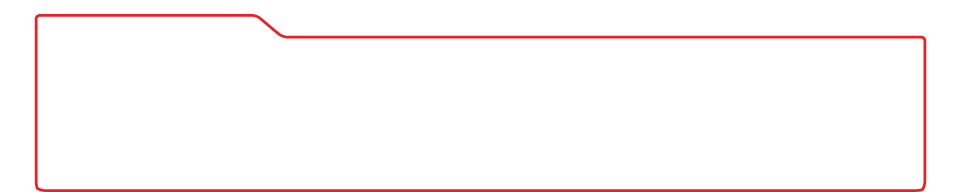
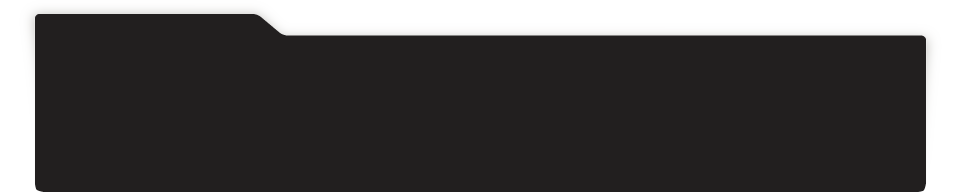
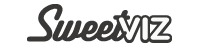
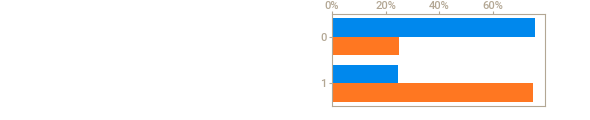
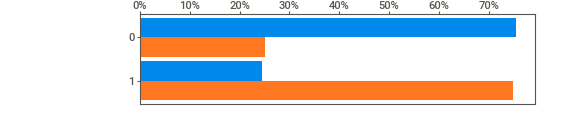
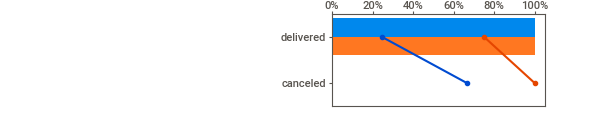
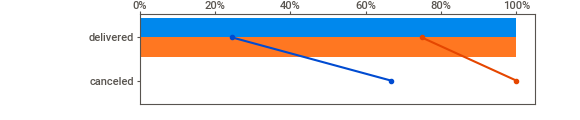
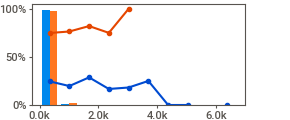
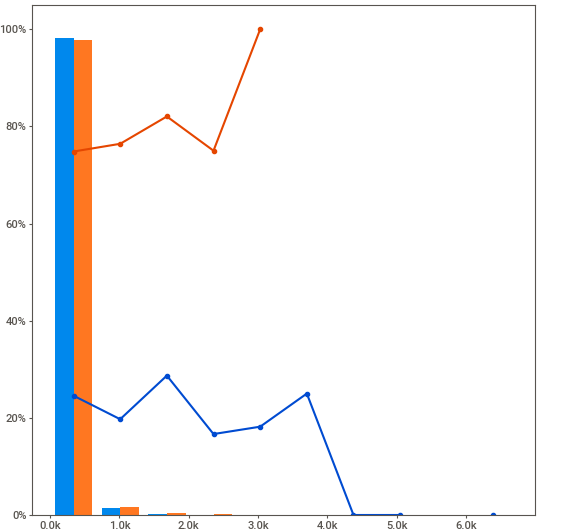
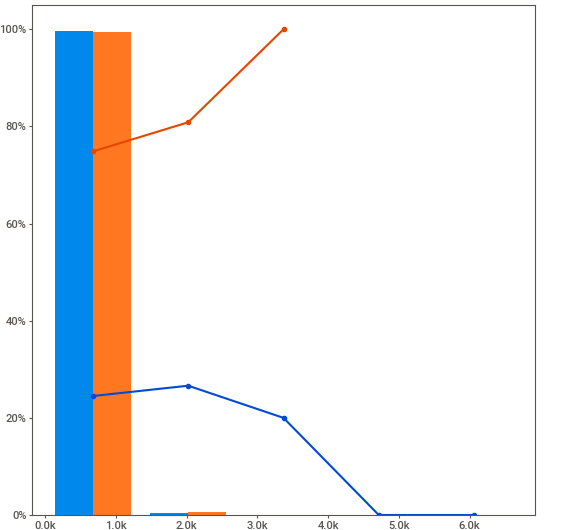
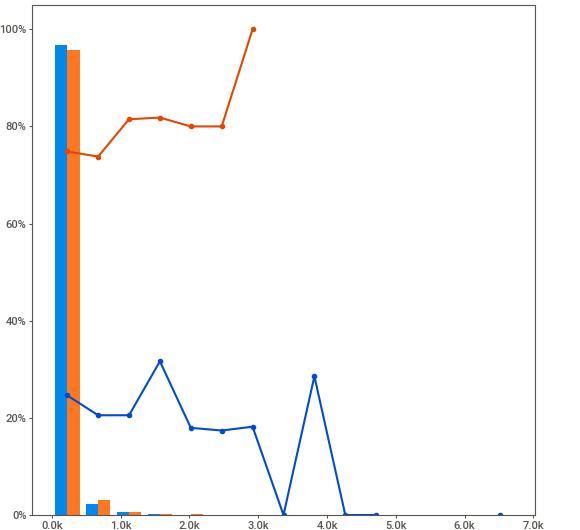
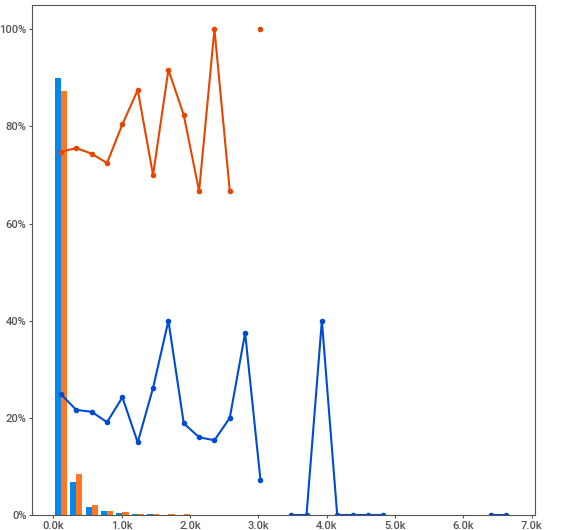
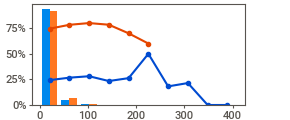
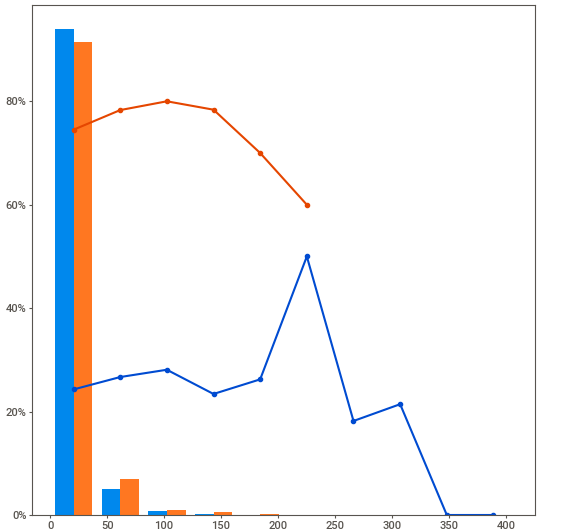
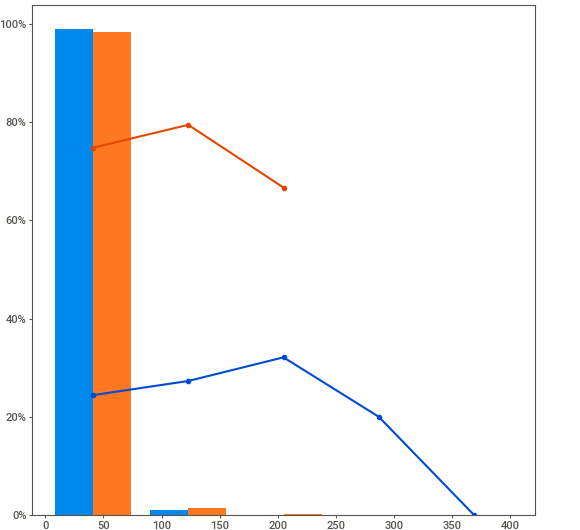
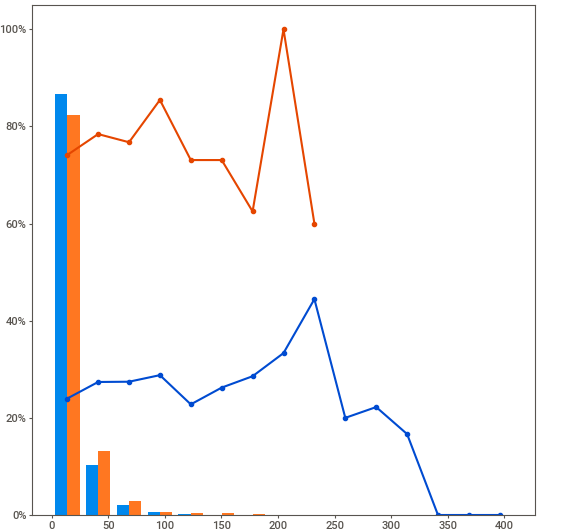
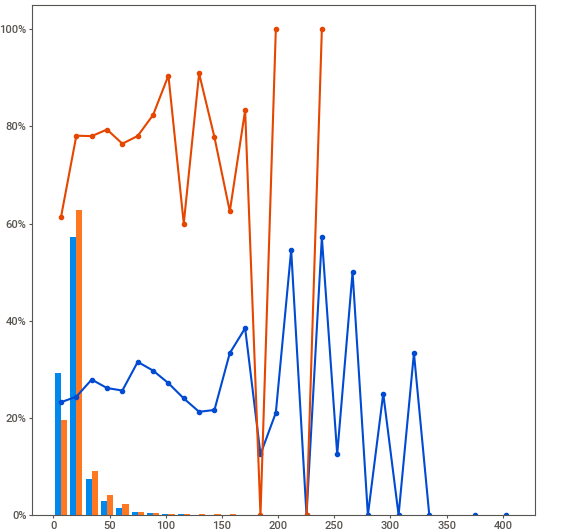
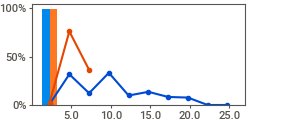
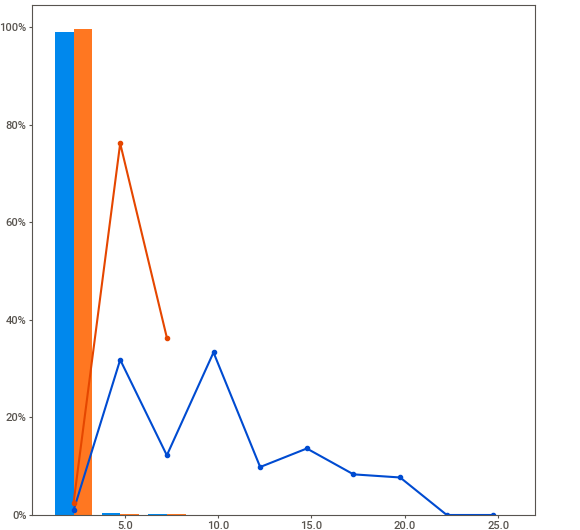
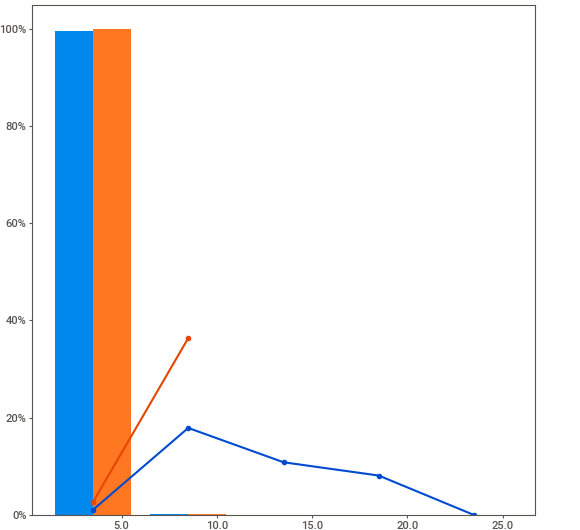
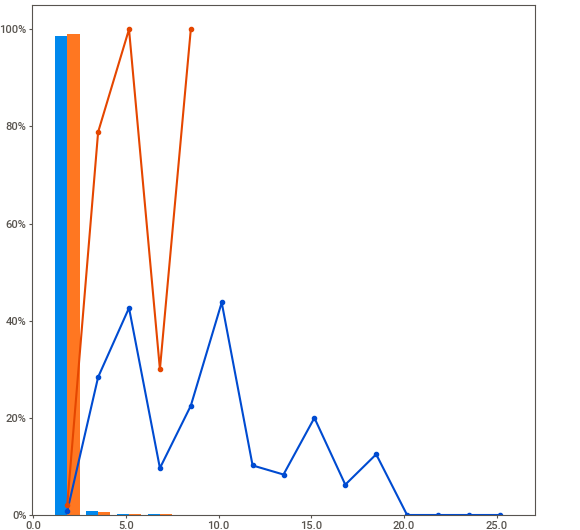
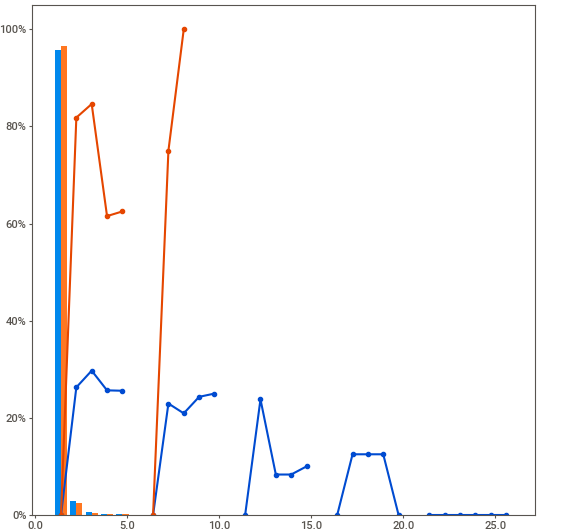
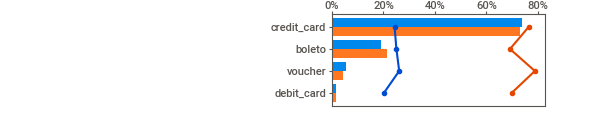
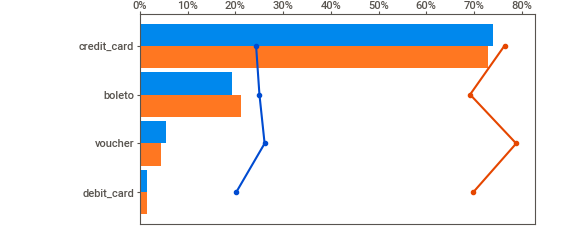
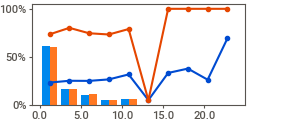
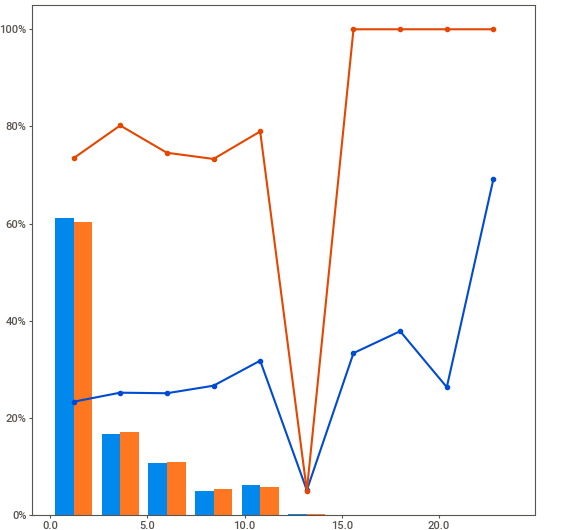
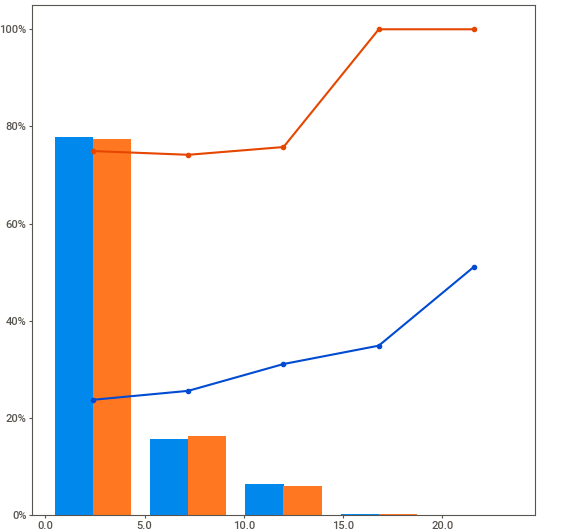
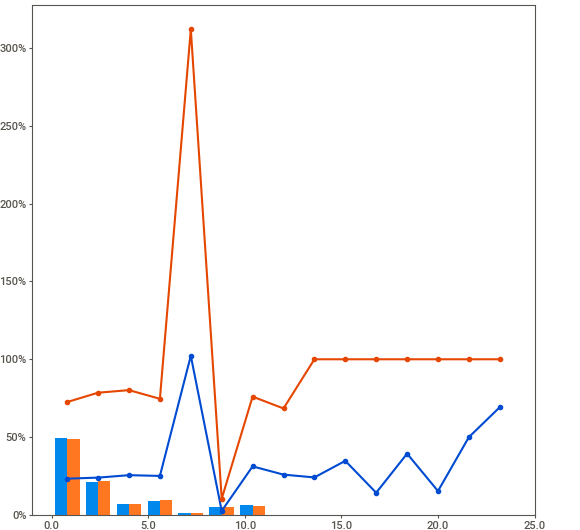
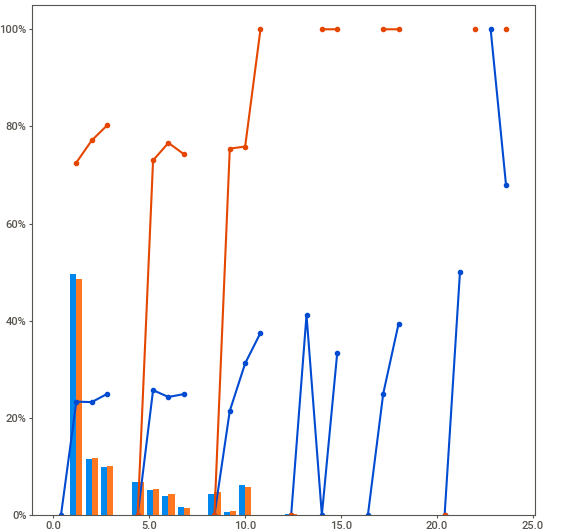
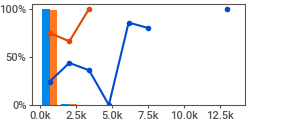
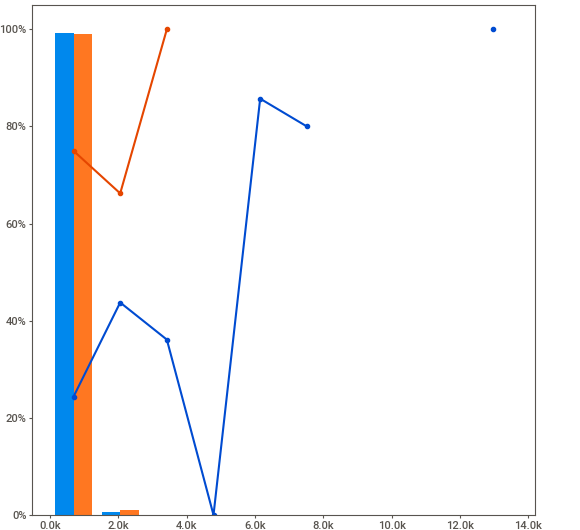
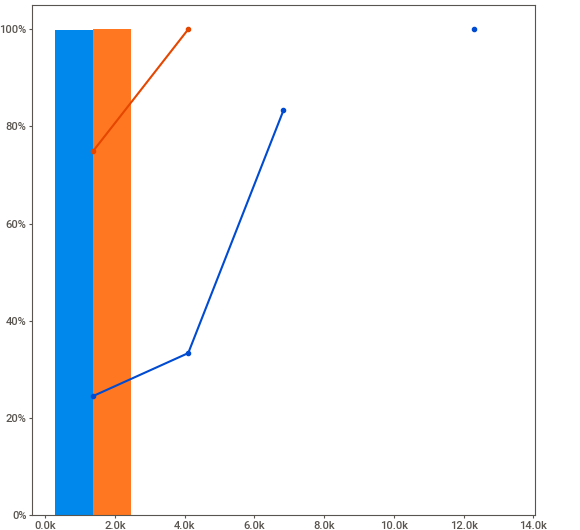
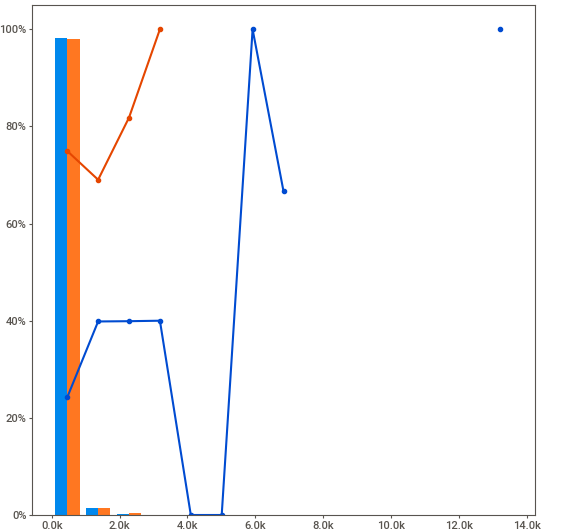
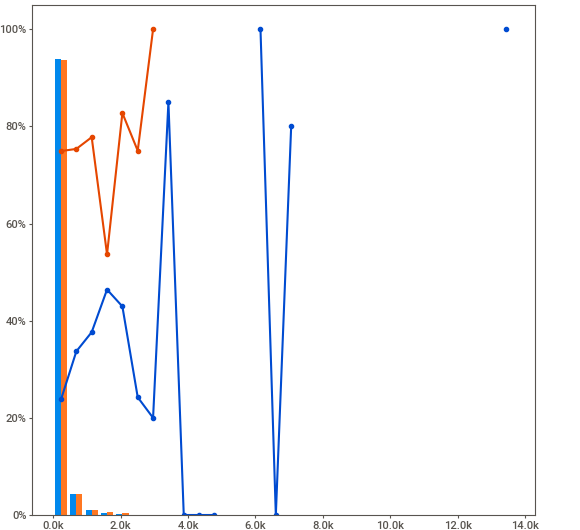
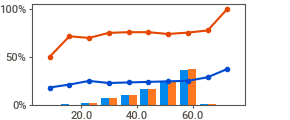
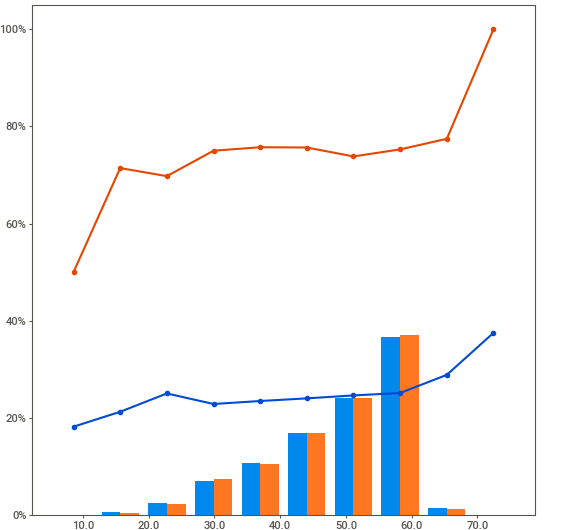
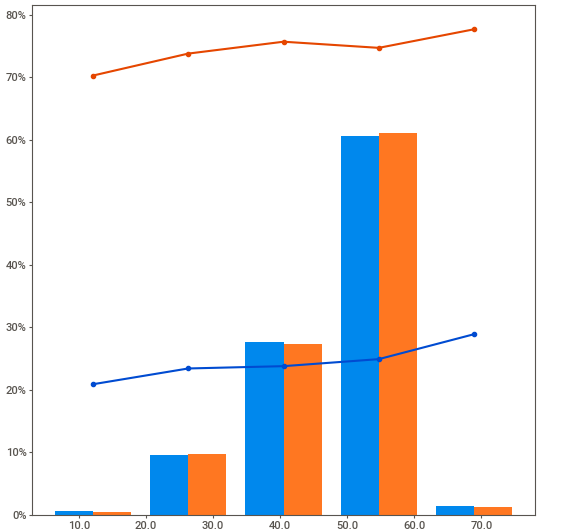
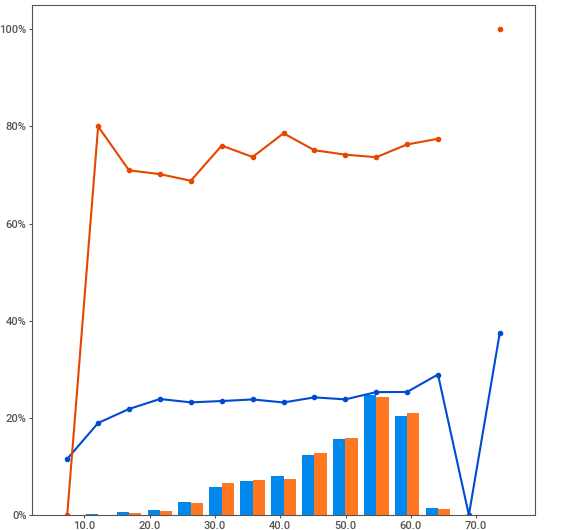
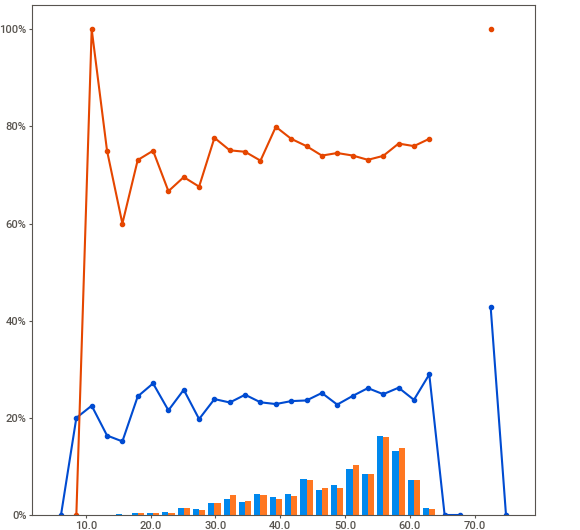
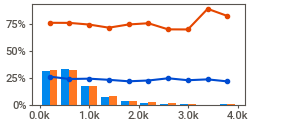
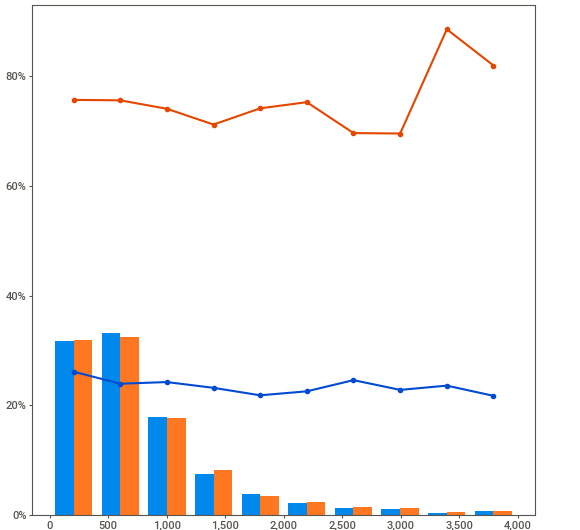
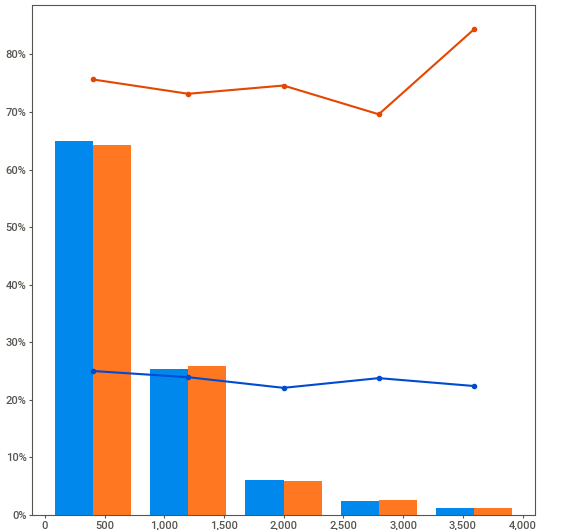
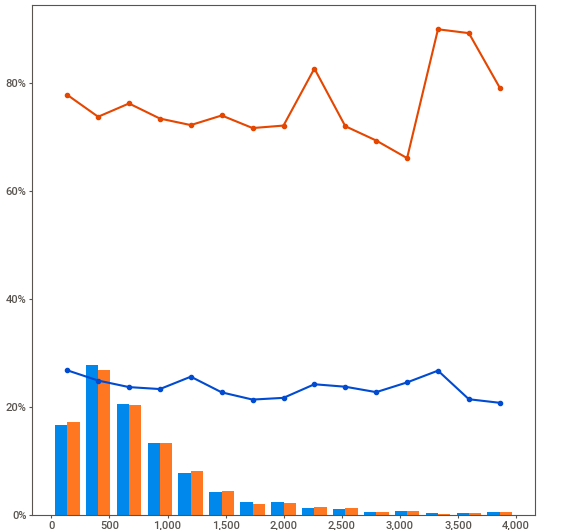
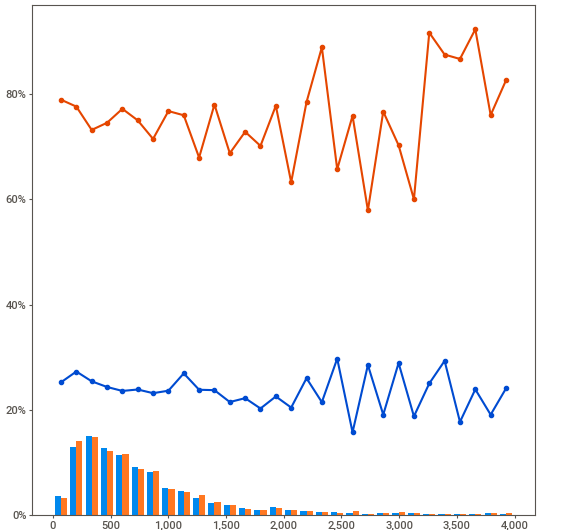
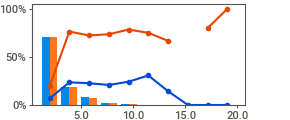
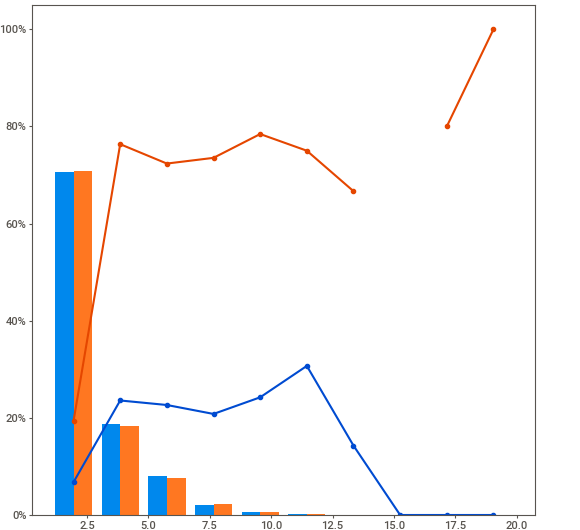
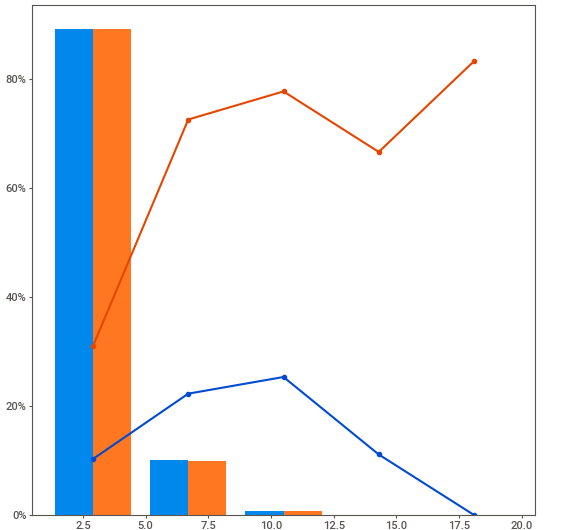
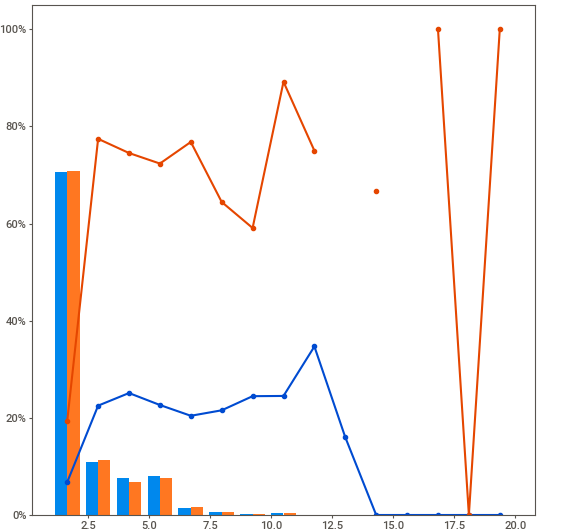
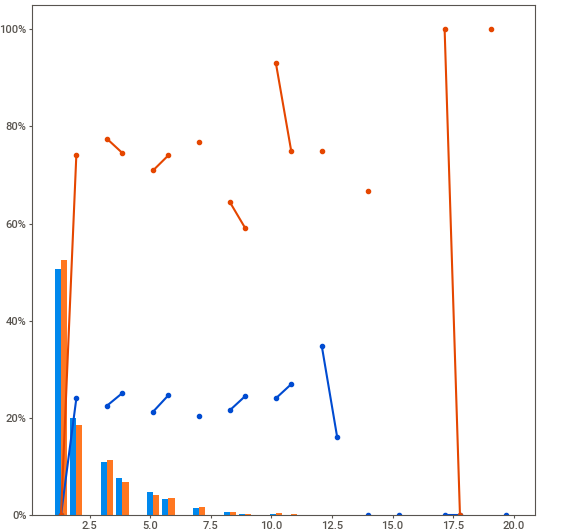
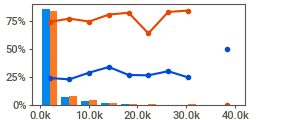
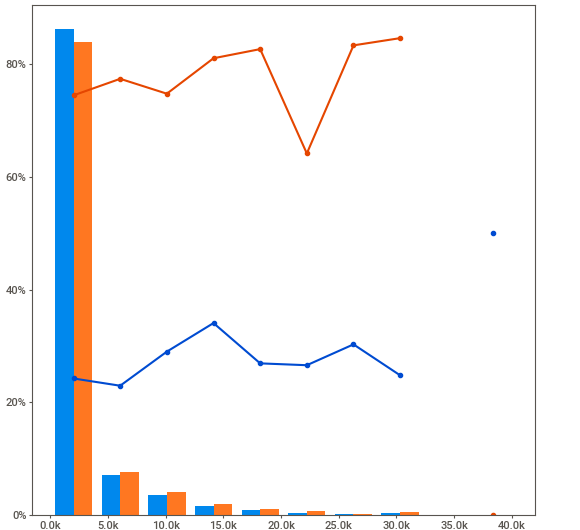
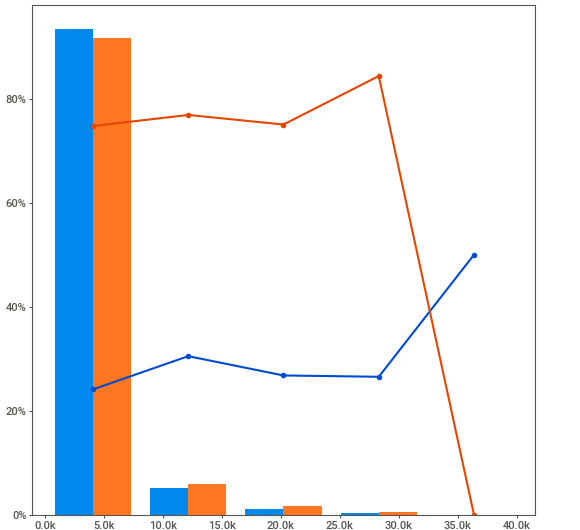
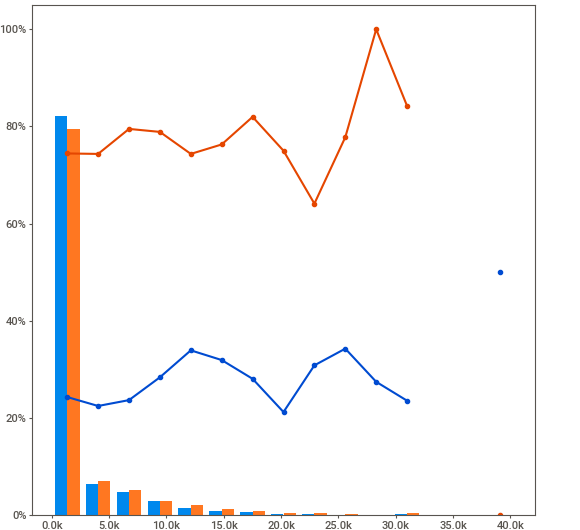
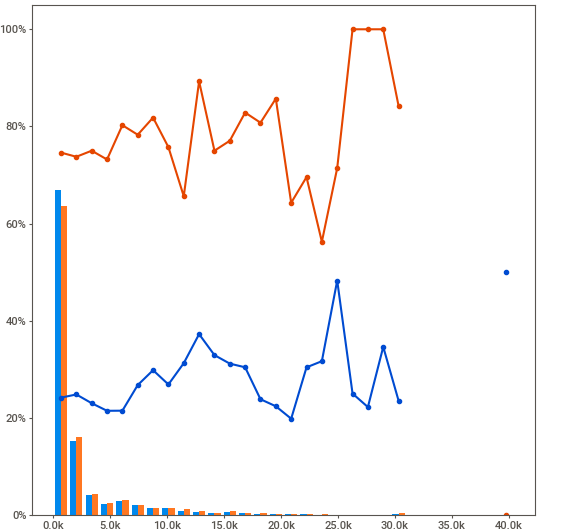
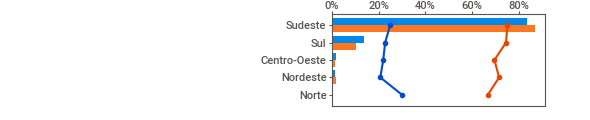
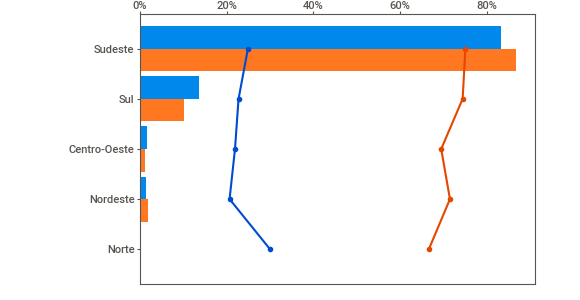
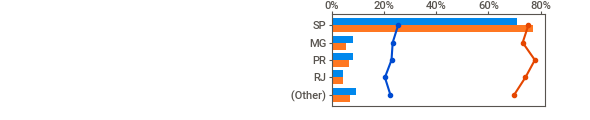
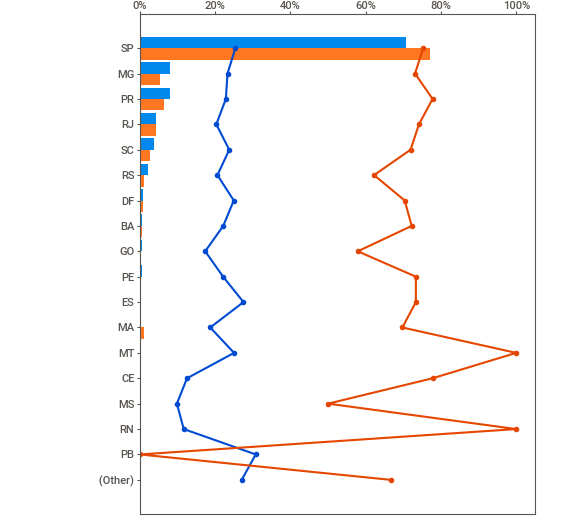
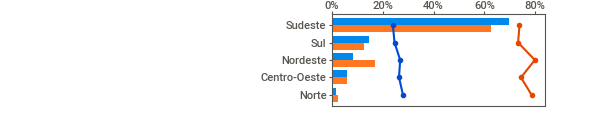
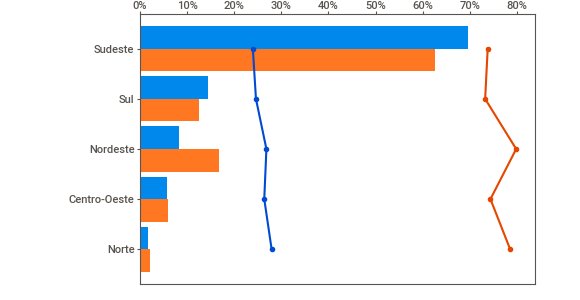
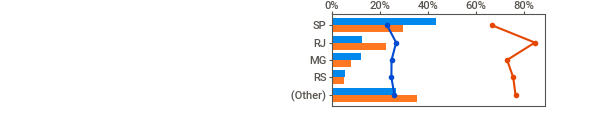
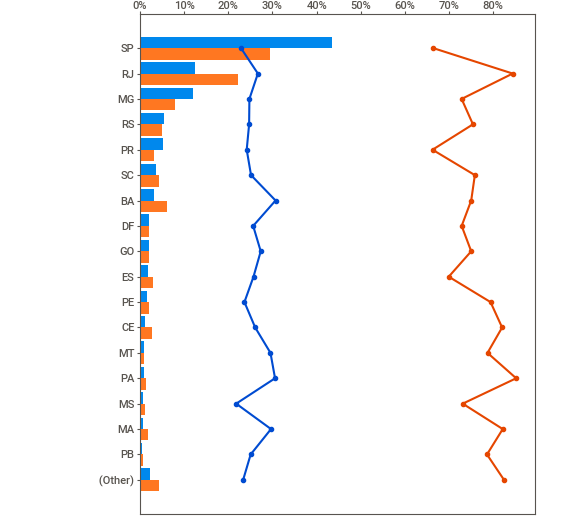
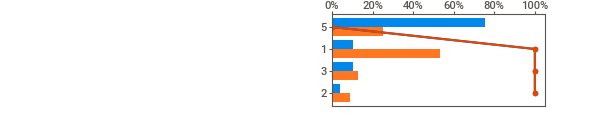
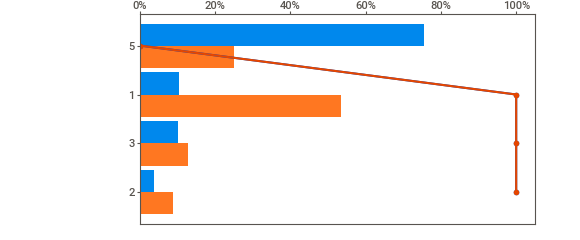
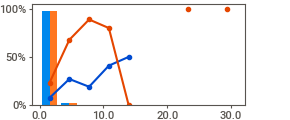
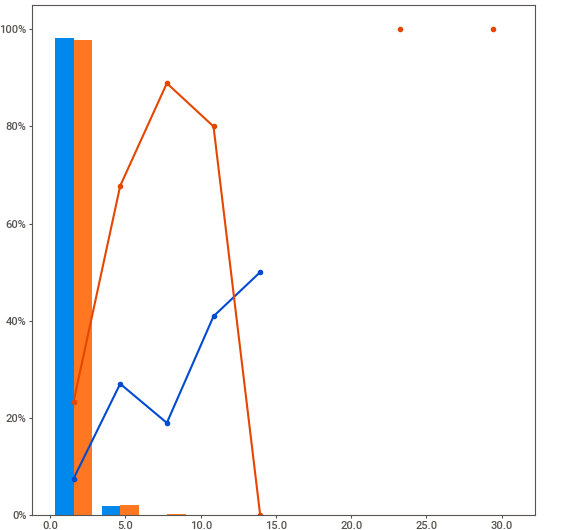
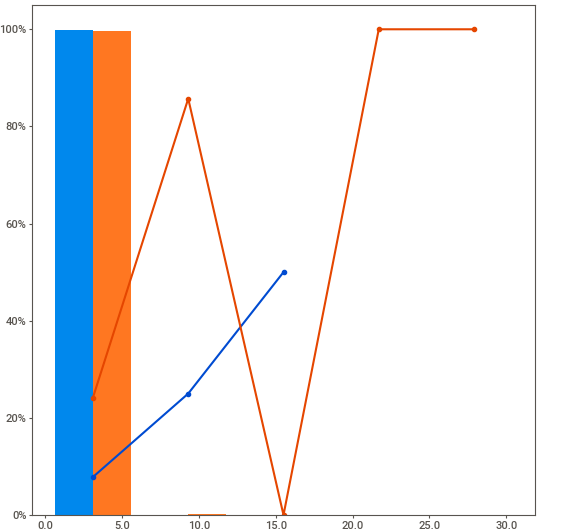
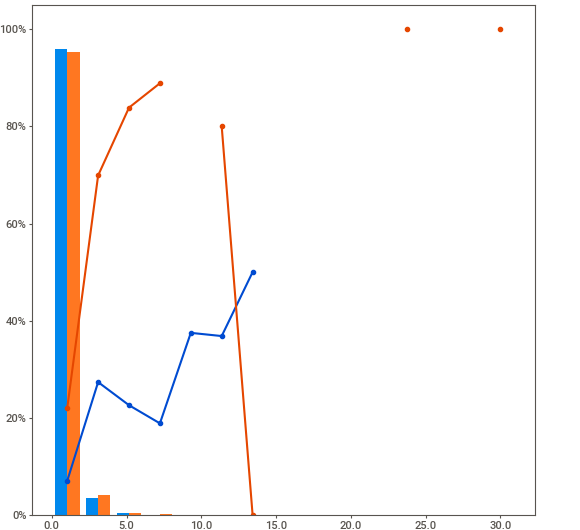
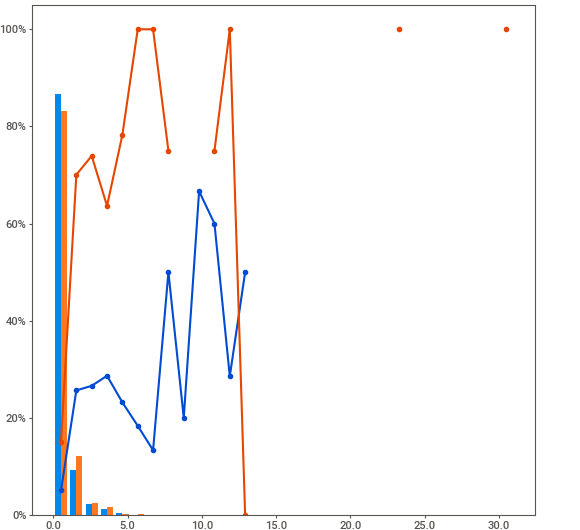
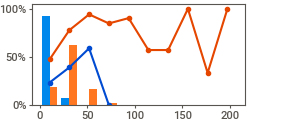
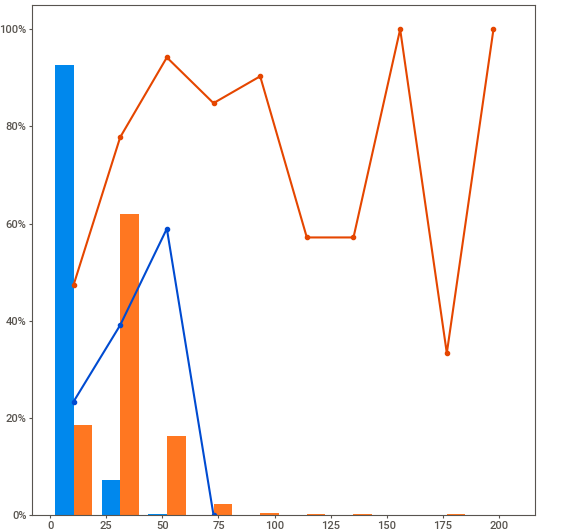
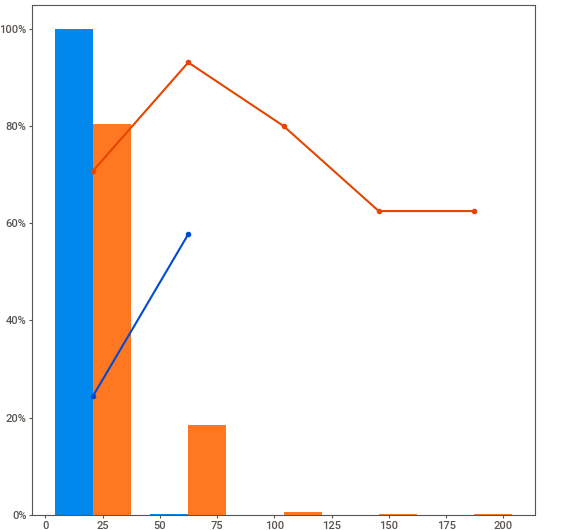
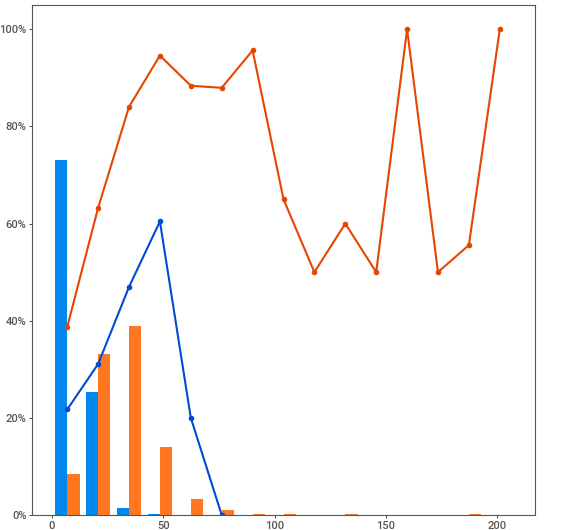
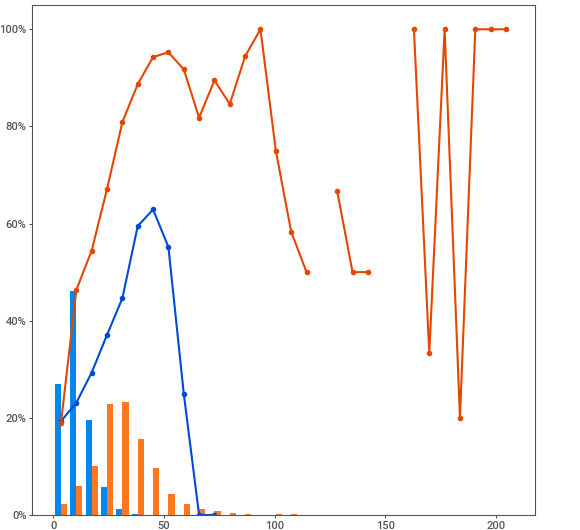
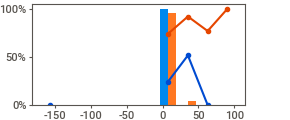
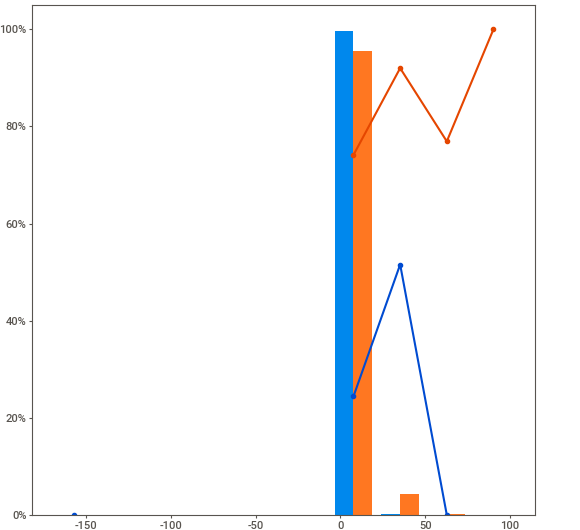
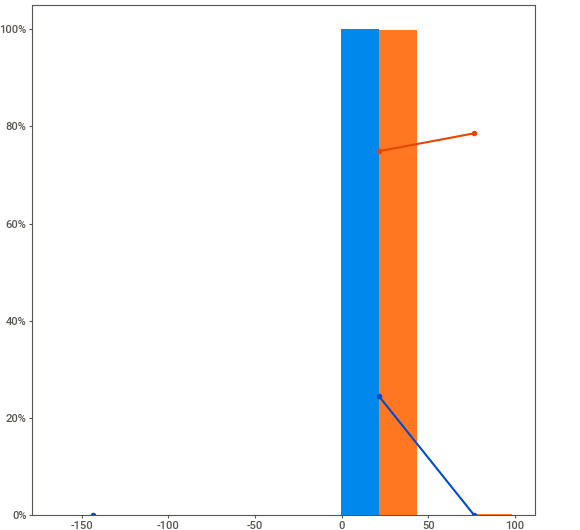
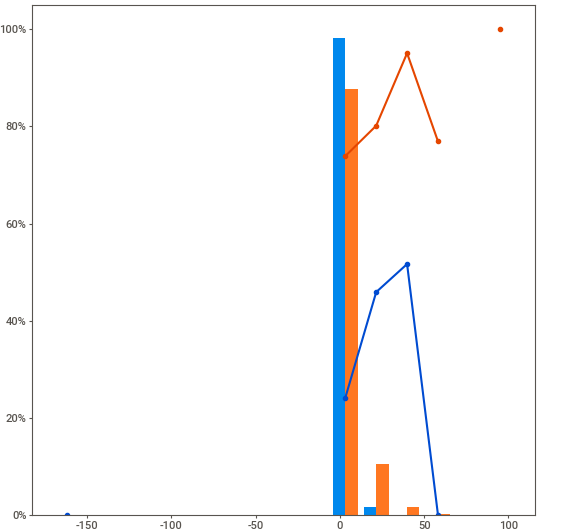
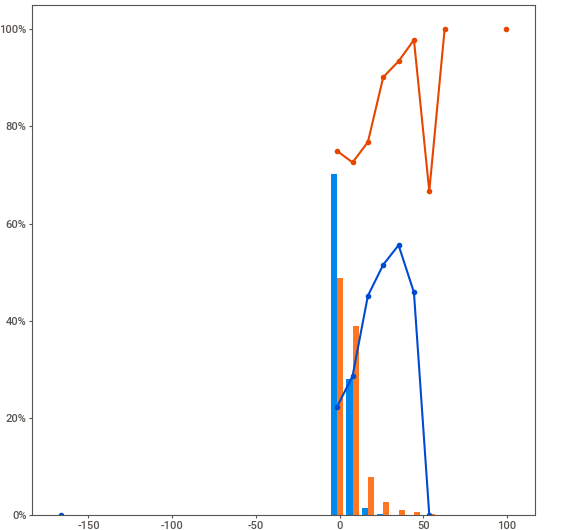
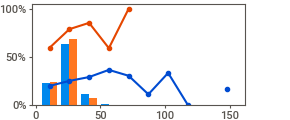
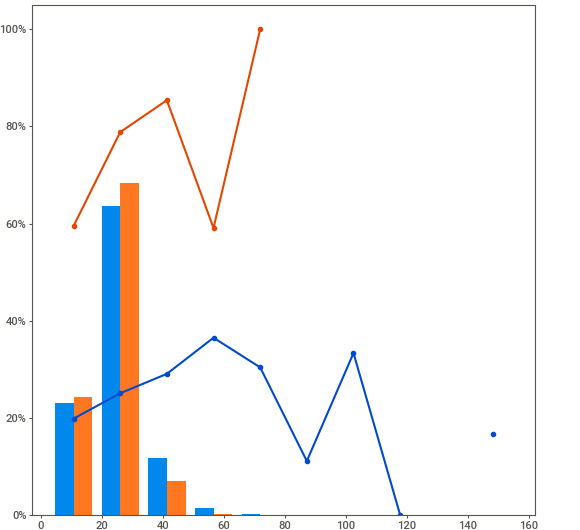
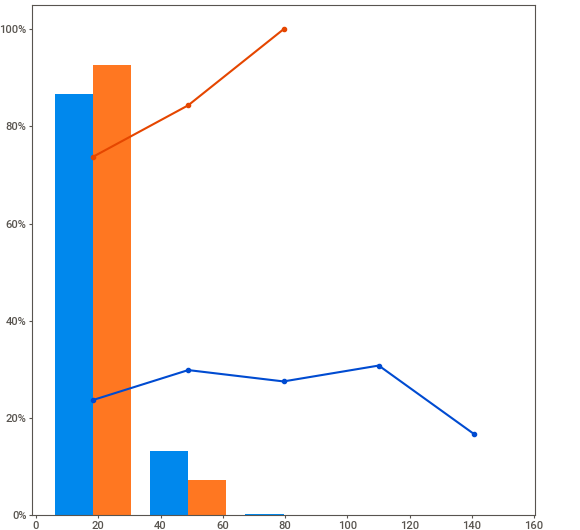
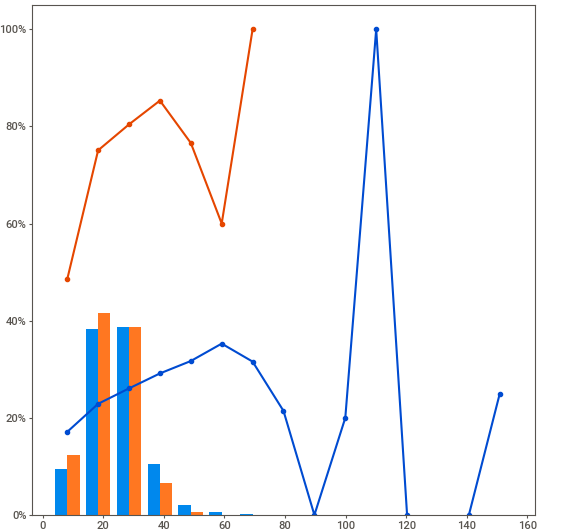
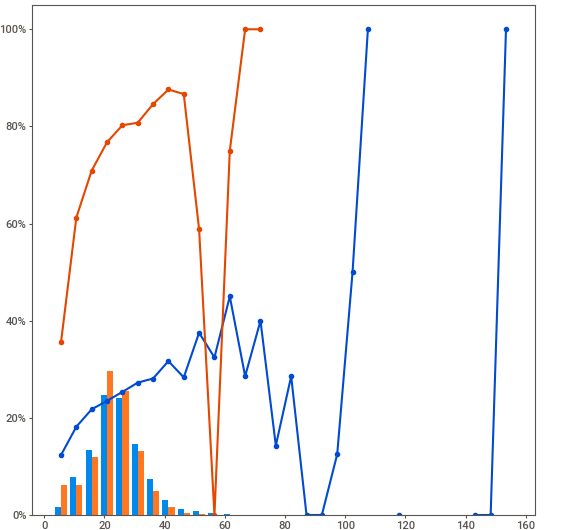
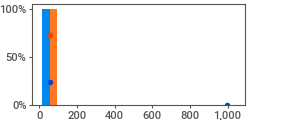
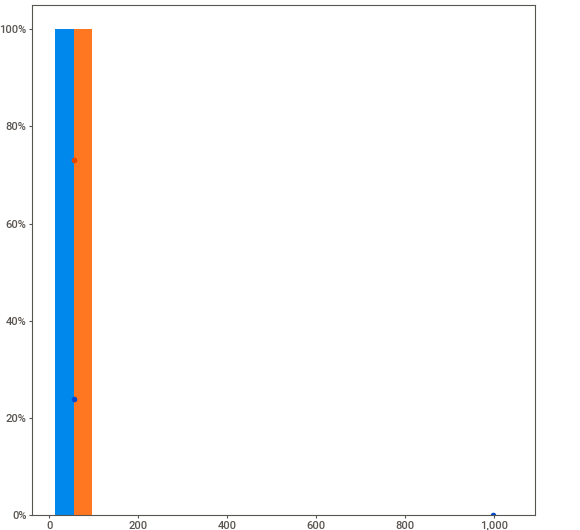
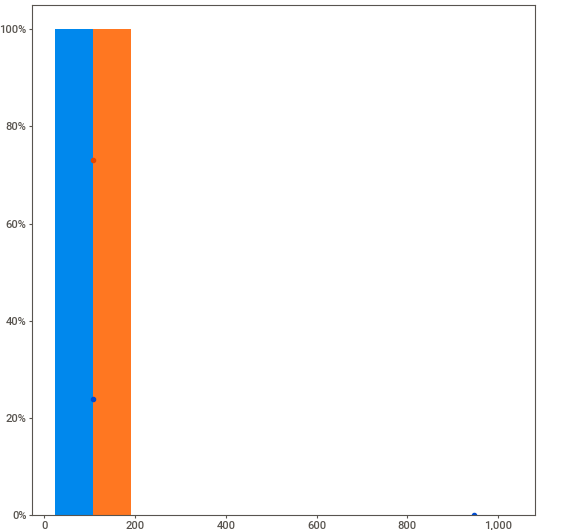
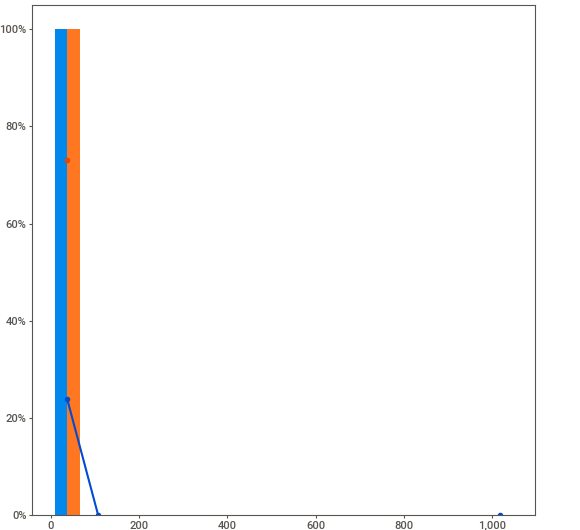
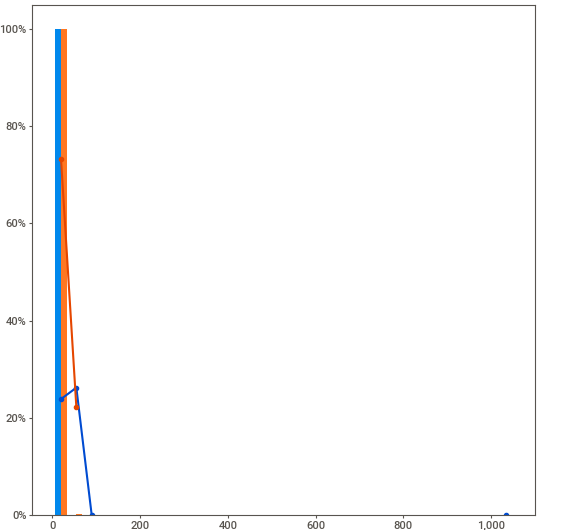
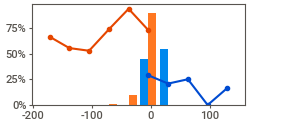
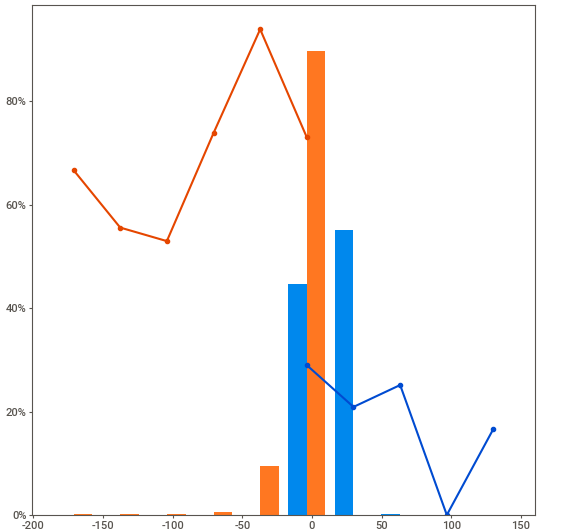
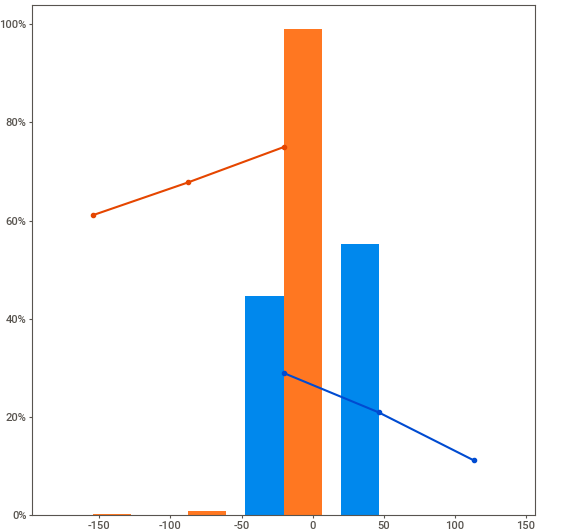
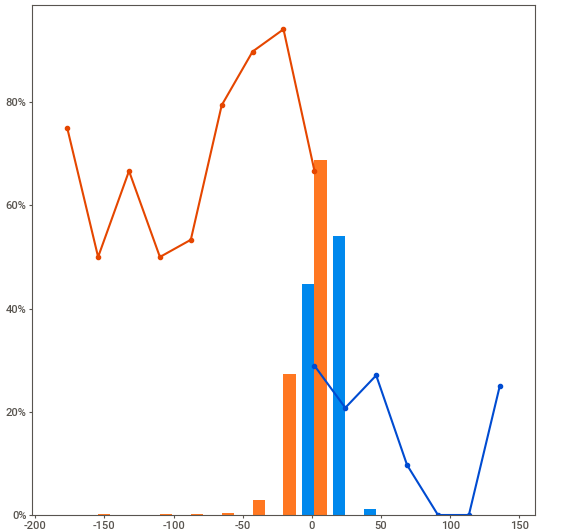
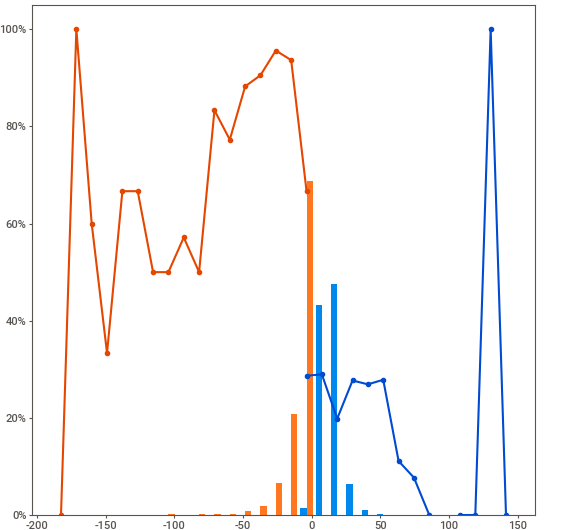
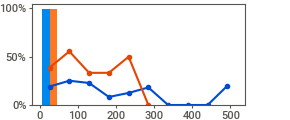
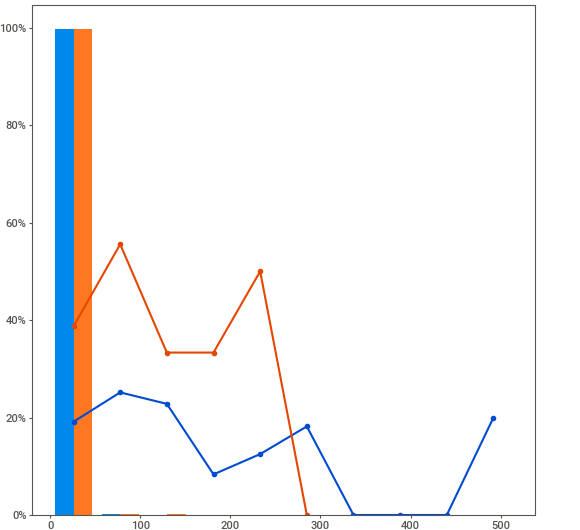
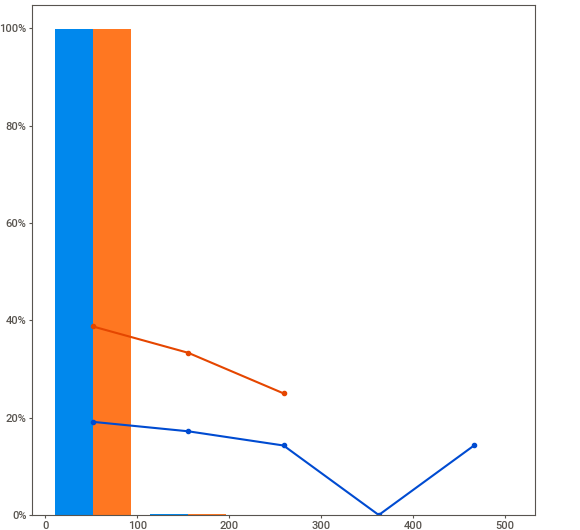
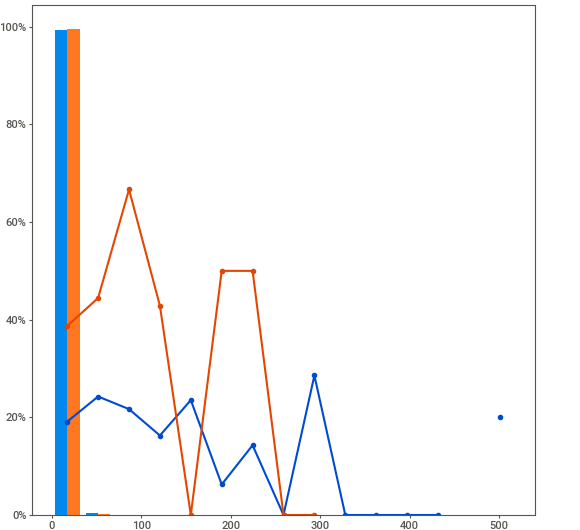
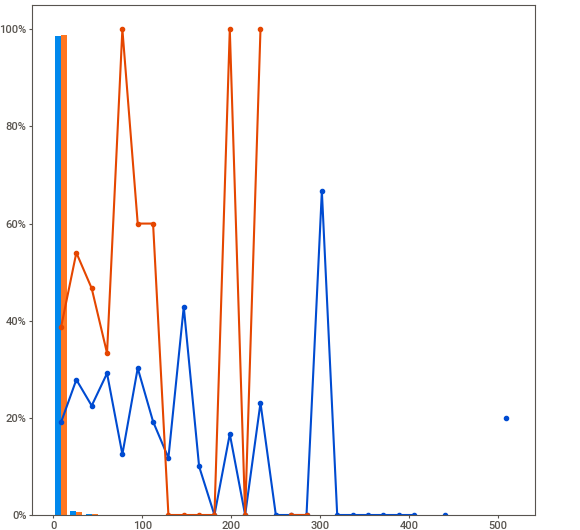
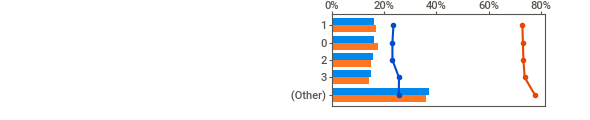
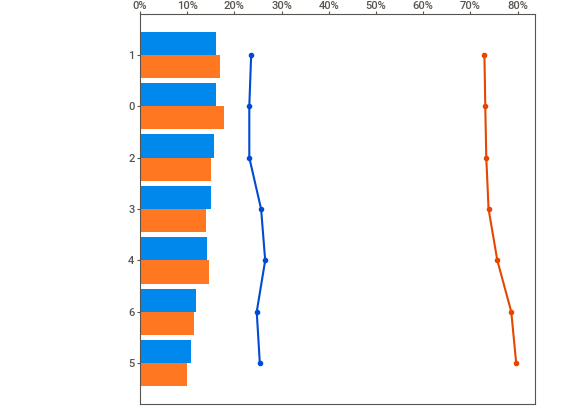
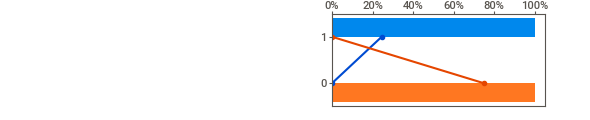
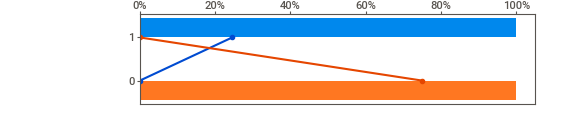
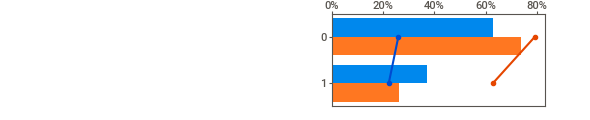
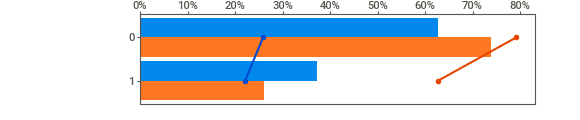
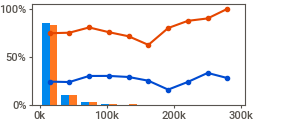
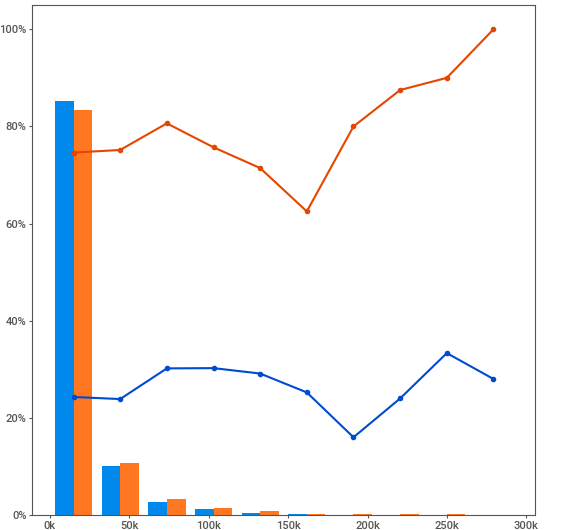
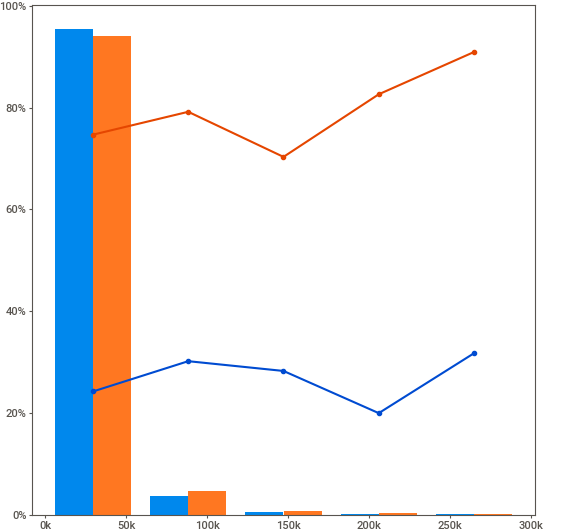
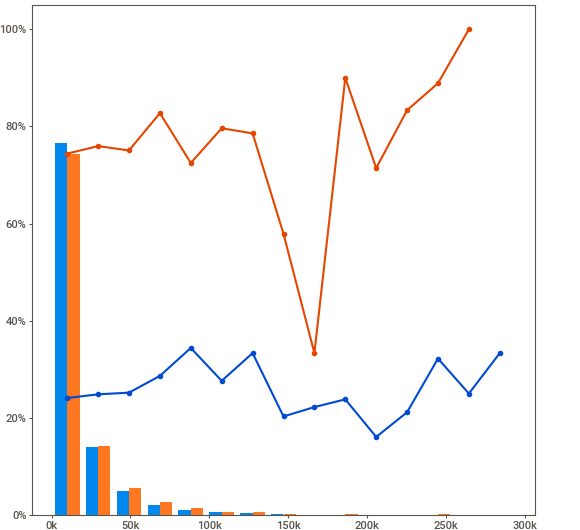
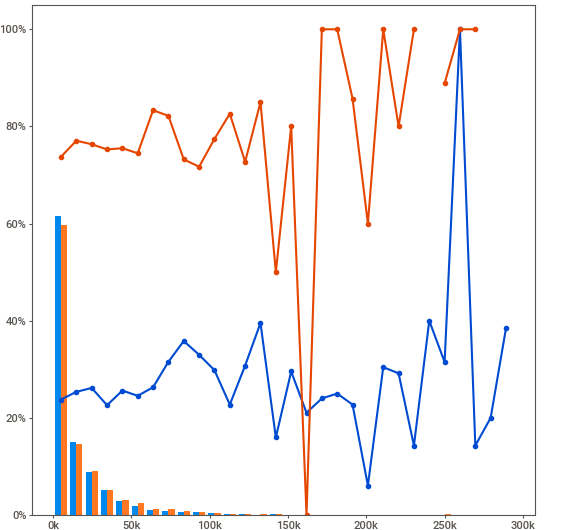
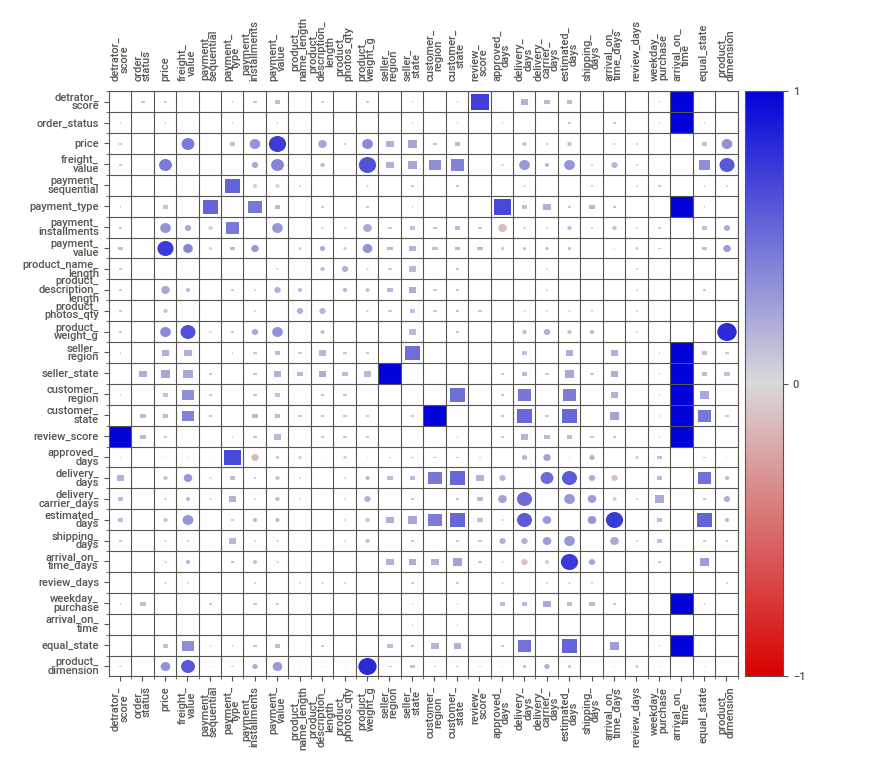
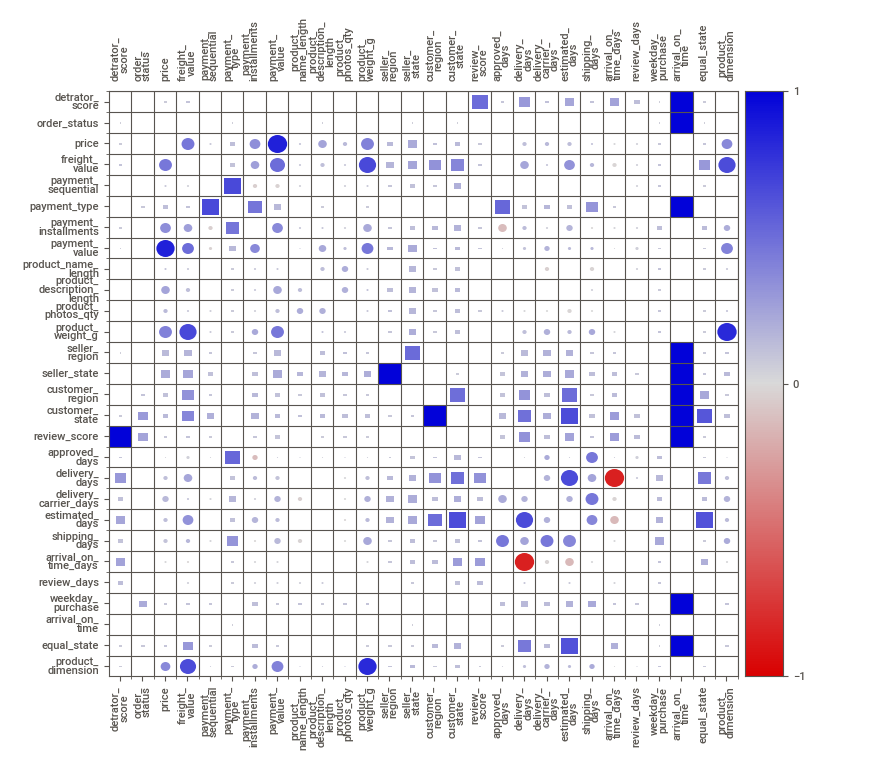

In [ ]:
eda2 = sv.compare_intra(source_df = df_ecommerce,
                        condition_series = df_ecommerce['arrival_on_time'] == 1,
                        names = ['On time', 'Off time'],
                        target_feat = 'detrator_score')
eda2.show_notebook()

**Insights**:
- Através dos gráficos acima, podemos verificar a importância da variável 'arrival_on_time' para a predição do detrator.
- O atraso na entrega do produto (linha laranja) tem uma importância expressiva na frequência de detratores.



## **Correlação entre o conjunto de dados**

Vamos avaliar o quanto uma variável influencia na outra.

Lembre-se:
- A **correlação positiva** (valores próximos a 1) mostra que quando uma variável aumenta seu valor, a outra variável também aumenta.
- Enquanto que a **correlação negativa** mostra que, enquanto uma variável aumenta seu valor, a outra diminui (valores próximos a -1).
- Quando uma variável **não possui correlação** uma com a outra, o valor é 0.

No Sweetviz, conseguimos verificar a correlação através da matriz de associações.

O Sweetviz integra associações ou correlações para tipos de dados numéricos (correlação de Pearson), dados categóricos (coeficiente de incerteza) e categórico-numéricos (razão de correlação) para fornecer o máximo de informações para todos os tipos de dados.
Maiores informações: https://github.com/fbdesignpro/sweetviz


Abaixo podemos verificar uma outra forma de analisar correlação entre variáveis numéricas.

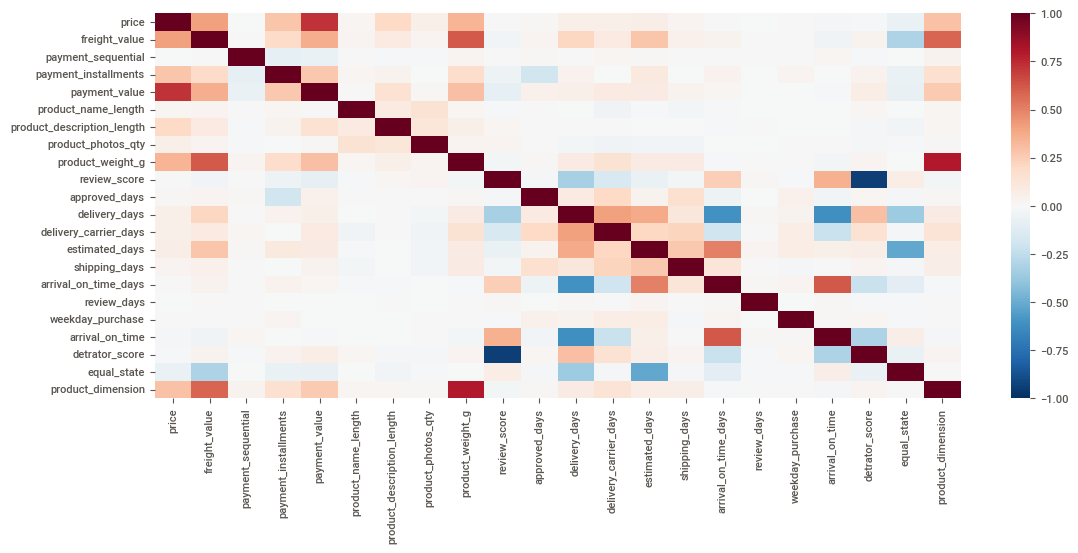

In [ ]:
plt.figure(figsize=(13,5))
sns.heatmap(df_ecommerce.corr(numeric_only = True), cmap="RdBu_r", vmin = -1, vmax = 1);

Através da matriz de correlação acima, percebemos que:

- dias para entrega (delivery_days) possuem correlação postiva com os dias estimados para entrega (estimated_days).
- valor do frete (freight_value) possui correlação positiva com os dias estimados (estimated_days). Isso faz sentido: quanto mais dias são necessários para entrega, maior o valor do frete (mais distante). Assim como possui correlação positiva com o peso do produto (product_weight_g) e as dimensões do produto (product_dimension).
- dias para entrega (delivery_days) possui uma correlação negativa com a avaliação do consumidor (review_score). Isso faz sentido: quanto mais tempo demora para o cliente receber o produto, pior vai ser a sua avaliação.
- entregar a tempo (arrival_on_time) tem uma correlação positiva com a nota dada pelo consumidor (review_score), portanto o atraso possui um efeito negativo sobre os detratores (detrator_score).

## **Correlação entre a estimativa para entrega e dias para entrega**

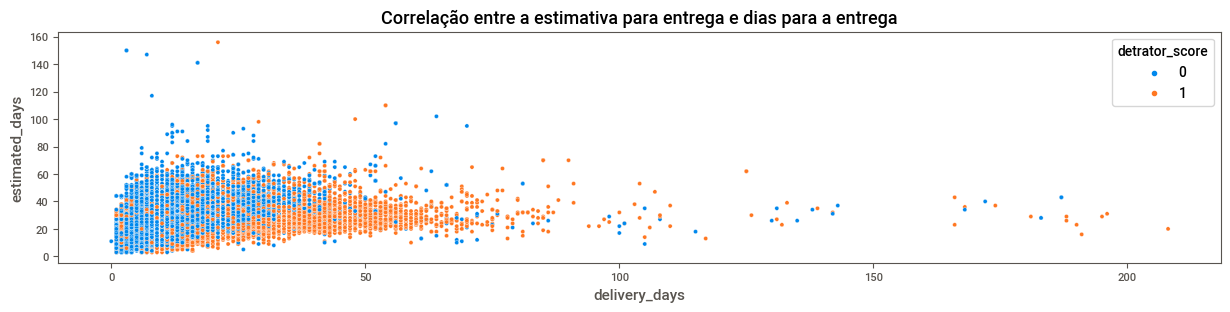

In [ ]:
plt.figure(figsize=(15,3))
sns.scatterplot(x = 'delivery_days',
                y = 'estimated_days',
                hue = 'detrator_score',
                data = df_ecommerce)
plt.xlabel('delivery_days', fontsize = 11)
plt.ylabel('estimated_days', fontsize = 11)
plt.title('Correlação entre a estimativa para entrega e dias para a entrega', fontsize = 13)
plt.show()

**Insights**:

* A maioria das avaliações dos promotores tem longos dias de estimativa de entrega (eixo y), mas os dias reais de entrega do produto (eixo x) são curtos (o que pode indicar que o produto chegou antes ou no prazo), fazendo com que o cliente receba o produto mais rápido do que o tempo esperado.
* A maioria das avaliações dos detratores tem estimativa de dias entrega (eixo y) curtos, mas os dias de entrega reais do produto (eixo x) são mais longos do que o tempo esperado (o que pode indicar um prazo muito longo para receber o produto ou atraso na entrega).

# **Pré-Processamento dos dados**

Aqui iremos tratar e preparar os dados para o modelo de Machine Learning.

## **Remoção de linhas desnecessárias para o Modelo de Predição**

In [ ]:
# Filtrando somente as linhas que tiveram pedidos entregues ('delivered')

df_ecommerce = df_ecommerce[df_ecommerce['order_status'] == 'delivered']

# Dropando a variável 'order_status'

df_ecommerce = df_ecommerce.drop('order_status', axis = 1)

df_ecommerce.head()

price  freight_value  payment_sequential payment_type  \
4   29.99           7.78                   1  credit_card   
5   75.90           7.79                   1  credit_card   
7   75.90           7.79                   1  credit_card   
10  44.99           7.78                   1  credit_card   
11  44.99           7.78                   1  credit_card   

    payment_installments  payment_value  product_name_length  \
4                      1          37.77                 40.0   
5                      1          83.69                 58.0   
7                      2          83.69                 58.0   
10                     2          52.77                 58.0   
11                     1           2.77                 58.0   

    product_description_length  product_photos_qty  product_weight_g  \
4                        268.0                 4.0             500.0   
5                        398.0                 3.0             238.0   
7                        398.0                 3.0             238.0   
10                       537.0                 2.0            1850.0   
11                       537.0                 2.0            1850.0   

   seller_region seller_state seller_city customer_region customer_state  \
4        Sudeste           SP        maua         Sudeste             SP   
5        Sudeste           SP        maua         Sudeste             SP   
7        Sudeste           SP        maua         Sudeste             SP   
10       Sudeste           SP        maua         Sudeste             SP   
11       Sudeste           SP        maua         Sudeste             SP   

      customer_city  review_score  approved_days  delivery_days  \
4         sao paulo             5              0              5   
5   itaquaquecetuba             5              0              6   
7          campinas             2              0              2   
10          jundiai             5              0              2   
11        sao paulo             5              0              6   

    delivery_carrier_days  estimated_days  shipping_days  \
4                       2              13              6   
5                       1              13              6   
7                       1              13              6   
10                      1              13              6   
11                      2              13              6   

    arrival_on_time_days  review_days  weekday_purchase  arrival_on_time  \
4                      8            0                 2                1   
5                      7            4                 3                1   
7                     11            1                 3                1   
10                    11            2                 2                1   
11                     7            1                 2                1   

    detrator_score  equal_state  product_dimension  
4                0            1             1976.0  
5                0            1             3000.0  
7                1            1             3000.0  
10               0            1             5780.0  
11               0            1             5780.0

In [ ]:
df_ecommerce.shape

(91393, 29)

## **Remoção de colunas desnecessárias para o Modelo de Predição**

In [ ]:
# Remoçao para 1ª Análise

df_ecommerce = df_ecommerce.drop(['seller_state', 'seller_city', 'customer_state', 'customer_city', 'review_score'], axis = 1)
df_ecommerce.head()

price  freight_value  payment_sequential payment_type  \
4   29.99           7.78                   1  credit_card   
5   75.90           7.79                   1  credit_card   
7   75.90           7.79                   1  credit_card   
10  44.99           7.78                   1  credit_card   
11  44.99           7.78                   1  credit_card   

    payment_installments  payment_value  product_name_length  \
4                      1          37.77                 40.0   
5                      1          83.69                 58.0   
7                      2          83.69                 58.0   
10                     2          52.77                 58.0   
11                     1           2.77                 58.0   

    product_description_length  product_photos_qty  product_weight_g  \
4                        268.0                 4.0             500.0   
5                        398.0                 3.0             238.0   
7                        398.0                 3.0             238.0   
10                       537.0                 2.0            1850.0   
11                       537.0                 2.0            1850.0   

   seller_region customer_region  approved_days  delivery_days  \
4        Sudeste         Sudeste              0              5   
5        Sudeste         Sudeste              0              6   
7        Sudeste         Sudeste              0              2   
10       Sudeste         Sudeste              0              2   
11       Sudeste         Sudeste              0              6   

    delivery_carrier_days  estimated_days  shipping_days  \
4                       2              13              6   
5                       1              13              6   
7                       1              13              6   
10                      1              13              6   
11                      2              13              6   

    arrival_on_time_days  review_days  weekday_purchase  arrival_on_time  \
4                      8            0                 2                1   
5                      7            4                 3                1   
7                     11            1                 3                1   
10                    11            2                 2                1   
11                     7            1                 2                1   

    detrator_score  equal_state  product_dimension  
4                0            1             1976.0  
5                0            1             3000.0  
7                1            1             3000.0  
10               0            1             5780.0  
11               0            1             5780.0

In [ ]:
df_ecommerce.shape

(91393, 24)

In [ ]:
# Remoçao para 2ª Análise
# Na 2ª Análise, consideraram-se apenas as variáveis que se mostraram mais importantes

df_ecommerce = df_ecommerce.drop(['seller_state', 'seller_city', 'customer_state', 'customer_city', 'review_score',
                                  'price', 'freight_value', 'payment_sequential', 'payment_installments',
                                  'product_name_length', 'product_description_length', 'product_photos_qty', 'product_weight_g',
                                  'approved_days', 'delivery_carrier_days', 'shipping_days', 'review_days', 'weekday_purchase',
                                  'equal_state', 'product_dimension'], axis = 1)
df_ecommerce.head()

payment_type  payment_value seller_region customer_region  delivery_days  \
4   credit_card          37.77       Sudeste         Sudeste              5   
5   credit_card          83.69       Sudeste         Sudeste              6   
7   credit_card          83.69       Sudeste         Sudeste              2   
10  credit_card          52.77       Sudeste         Sudeste              2   
11  credit_card           2.77       Sudeste         Sudeste              6   

    estimated_days  arrival_on_time_days  arrival_on_time  detrator_score  
4               13                     8                1               0  
5               13                     7                1               0  
7               13                    11                1               1  
10              13                    11                1               0  
11              13                     7                1               0

In [ ]:
df_ecommerce.shape

(91393, 9)

## **Separação em variáveis preditivas e variável resposta**

In [ ]:
X = df_ecommerce.drop(['detrator_score'], axis = 1)
y = df_ecommerce['detrator_score']

In [ ]:
X.head()

payment_type  payment_value seller_region customer_region  delivery_days  \
4   credit_card          37.77       Sudeste         Sudeste              5   
5   credit_card          83.69       Sudeste         Sudeste              6   
7   credit_card          83.69       Sudeste         Sudeste              2   
10  credit_card          52.77       Sudeste         Sudeste              2   
11  credit_card           2.77       Sudeste         Sudeste              6   

    estimated_days  arrival_on_time_days  arrival_on_time  
4               13                     8                1  
5               13                     7                1  
7               13                    11                1  
10              13                    11                1  
11              13                     7                1

In [ ]:
X.shape

(91393, 8)

## **Separação dos dados em teste e treino**

Separando os dados em treino e teste para que possamos validar o modelo com dados que ele nunca tenha visto antes! Precisamos evitar que o modelo aprenda demais com os dados de treino e não seja representativo para os dados de teste (e, assim, possa generalizar a informação aprendida no treino em dados novos).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 61658)

In [ ]:
# O conjunto treino e teste foram separados de forma estratificada

y_train.mean(), y_test.mean()

(0.287625466853408, 0.28565801566808174)

## **Tratamento de Variáveis Categóricas**

Neste problema, temos as seguintes variáveis categóricas: 'payment_type', 'seller_region', 'customer_region' que serão dummificadas.

In [ ]:
# Lista com as variáveis categóricas
variaveis_categoricas = ['payment_type', 'seller_region', 'customer_region']

X_train_d = pd.get_dummies(X_train, columns = variaveis_categoricas, drop_first = True)
X_test_d = pd.get_dummies(X_test, columns = variaveis_categoricas, drop_first = True)
X_train_d.head()

payment_value  delivery_days  estimated_days  arrival_on_time_days  \
15964         117.47             11              14                     3   
13029         355.05              7              11                     4   
71786          56.96             30              27                    -3   
71564          40.19             31              26                    -5   
14109          42.41             11              20                     9   

       arrival_on_time  payment_type_credit_card  payment_type_debit_card  \
15964                1                         1                        0   
13029                1                         1                        0   
71786                0                         1                        0   
71564                0                         1                        0   
14109                1                         1                        0   

       payment_type_voucher  seller_region_Nordeste  seller_region_Norte  \
15964                     0                       0                    0   
13029                     0                       0                    0   
71786                     0                       0                    0   
71564                     0                       0                    0   
14109                     0                       0                    0   

       seller_region_Sudeste  seller_region_Sul  customer_region_Nordeste  \
15964                      1                  0                         0   
13029                      1                  0                         0   
71786                      1                  0                         1   
71564                      1                  0                         1   
14109                      1                  0                         0   

       customer_region_Norte  customer_region_Sudeste  customer_region_Sul  
15964                      0                        1                    0  
13029                      0                        1                    0  
71786                      0                        0                    0  
71564                      0                        0                    0  
14109                      0                        1                    0

In [ ]:
X_train_d.shape

(68544, 16)

In [ ]:
X_test_d.shape

(22849, 16)

## **Tratamento de Variáveis Numéricas**

As variáveis numéricas foram normalizadas utilizando o 'StandardScaler' do sklearn. Maiores informações: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
# Verificando os maiores valores

X_train_d.max()

payment_value               13664.08
delivery_days                 208.00
estimated_days                147.00
arrival_on_time_days          140.00
arrival_on_time                 1.00
payment_type_credit_card        1.00
payment_type_debit_card         1.00
payment_type_voucher            1.00
seller_region_Nordeste          1.00
seller_region_Norte             1.00
seller_region_Sudeste           1.00
seller_region_Sul               1.00
customer_region_Nordeste        1.00
customer_region_Norte           1.00
customer_region_Sudeste         1.00
customer_region_Sul             1.00
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

# variaveis_numericas = ['price', 'freight_value', 'payment_sequential', 'payment_installments', 'payment_value',
#                        'product_name_length', 'product_description_length', 'product_dimension', 'product_photos_qty', 'product_weight_g',
#                        'approved_days', 'delivery_days', 'delivery_carrier_days', 'estimated_days', 'shipping_days',
#                        'arrival_on_time_days', 'review_days']
variaveis_numericas = ['payment_value', 'delivery_days', 'estimated_days', 'arrival_on_time_days']

scalers = {}
X_train_s = X_train_d.copy()
X_test_s = X_test_d.copy()

for col in variaveis_numericas:
    scaler = StandardScaler()
    scaler.fit(X_train_s[[col]])
    X_train_s.loc[:,col] = scaler.transform(X_train_s[[col]])
    X_test_s.loc[:,col] = scaler.transform(X_test_s[[col]])
    scalers[col] = scaler

X_train_s.head()

payment_value  delivery_days  estimated_days  arrival_on_time_days  \
15964      -0.201026      -0.148887       -1.184941             -0.871199   
13029       0.651939      -0.563452       -1.525566             -0.774395   
71786      -0.418270       1.820295        0.291099             -1.452023   
71564      -0.478478       1.923936        0.177558             -1.645631   
14109      -0.470508      -0.148887       -0.503692             -0.290375   

       arrival_on_time  payment_type_credit_card  payment_type_debit_card  \
15964                1                         1                        0   
13029                1                         1                        0   
71786                0                         1                        0   
71564                0                         1                        0   
14109                1                         1                        0   

       payment_type_voucher  seller_region_Nordeste  seller_region_Norte  \
15964                     0                       0                    0   
13029                     0                       0                    0   
71786                     0                       0                    0   
71564                     0                       0                    0   
14109                     0                       0                    0   

       seller_region_Sudeste  seller_region_Sul  customer_region_Nordeste  \
15964                      1                  0                         0   
13029                      1                  0                         0   
71786                      1                  0                         1   
71564                      1                  0                         1   
14109                      1                  0                         0   

       customer_region_Norte  customer_region_Sudeste  customer_region_Sul  
15964                      0                        1                    0  
13029                      0                        1                    0  
71786                      0                        0                    0  
71564                      0                        0                    0  
14109                      0                        1                    0

In [ ]:
X_test_s.head()

payment_value  delivery_days  estimated_days  arrival_on_time_days  \
25593       -0.229927      -0.770734       -1.298483             -0.387179   
43032       -0.435109      -0.459811        0.404641              0.774469   
26426       -0.353431      -1.081658       -0.844317              0.290449   
60853       -0.410946      -0.667093       -0.276609              0.387253   
114951      -0.202857      -0.045246        1.085891              0.968077   

        arrival_on_time  payment_type_credit_card  payment_type_debit_card  \
25593                 1                         1                        0   
43032                 1                         0                        0   
26426                 1                         0                        0   
60853                 1                         1                        0   
114951                1                         1                        0   

        payment_type_voucher  seller_region_Nordeste  seller_region_Norte  \
25593                      0                       0                    0   
43032                      1                       0                    0   
26426                      1                       0                    0   
60853                      0                       0                    0   
114951                     0                       0                    0   

        seller_region_Sudeste  seller_region_Sul  customer_region_Nordeste  \
25593                       1                  0                         0   
43032                       1                  0                         0   
26426                       1                  0                         0   
60853                       1                  0                         0   
114951                      0                  0                         0   

        customer_region_Norte  customer_region_Sudeste  customer_region_Sul  
25593                       0                        1                    0  
43032                       0                        0                    1  
26426                       0                        1                    0  
60853                       0                        1                    0  
114951                      0                        1                    0

# **Machine Learning: Modelo de Predição**

## **Resultado da 1ª Analise**

Na primeira análise, foram removidas as seguintes variáveis: 'seller_state', 'seller_city', 'customer_state', 'customer_city', 'review_score'

### **Regressão Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = None, max_iter = 10_000, solver = 'saga', class_weight = 'balanced')
lr.fit(X_train_s, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty=None,
                   solver='saga')

### **Avaliação do Modelo**

In [ ]:
# ROC AUC Score

from sklearn.metrics import roc_auc_score

y_pred = lr.predict_proba(X_test_s)[:, 1]
auc = roc_auc_score(y_test, y_pred)
auc

0.7046658731274258

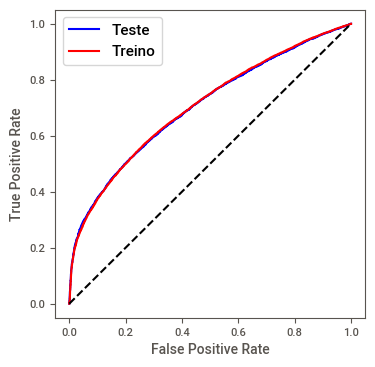

In [ ]:
# ROC AUC Score

from sklearn.metrics import roc_curve

plt.figure(figsize=(4, 4))

fpr, tpr, ths = roc_curve(y_test, lr.predict_proba(X_test_s)[:,1])
plt.plot(fpr, tpr, color = 'b', label = 'Teste')

fpr2, tpr2, ths2 = roc_curve(y_train, lr.predict_proba(X_train_s)[:,1])
plt.plot(fpr2, tpr2, color = 'r', label = 'Treino')

plt.plot((0,1),(0,1),'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(fontsize = 11);

In [ ]:
# Acurácia do modelo
# Vamos avaliar o quão bem o modelo conseguiu acertar suas predições para os dados de treino e teste.

print('Treino score:', lr.score(X_train_s, y_train))
print('Teste score:', lr.score(X_test_s, y_test))

Treino score: 0.714329481792717
Teste score: 0.7158737800341372


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(X_test_s)))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     16322
           1       0.50      0.50      0.50      6527

    accuracy                           0.72     22849
   macro avg       0.65      0.65      0.65     22849
weighted avg       0.72      0.72      0.72     22849



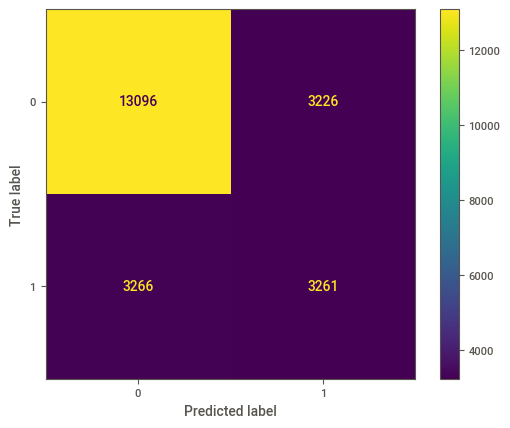

In [ ]:
# Matrix de Confusão

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lr.predict(X_test_s), labels = lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = lr.classes_)
disp.plot()
plt.show()

Analisando a matriz de confusão a respeito dos FN (Falso Negativo) e FP (Falso Positivo):
- Se o modelo prever que é detrator e não for (FP), a empresa irá ter feito um investimento sem necessidade. Porém, neste caso, nenhum atrito será criado com o consumidor. E o consumidor ainda sairá feliz pois uma ação foi feita sendo que ele já está satisfeito com a empresa.
- Se o modelo prever que não é detrator e na verdade o cliente é detrator (FN), este cenário irá criar um atrito e desconforto com o consumidor, pois ele não está satisfeito com a entrega ou empresa e nada foi feito a respeito. A empresa, neste caso, poderá perder o cliente.

In [ ]:
# Abaixo conseguimos verificar os valores de beta de cada variável, assim como o intercepto

print(f'{"Intercepto":50s} : {lr.intercept_[0]:.1f}')

non_zero = []
for col, coef in zip(X_train_s.columns, lr.coef_[0]):
    if abs(coef) <= 0.01:
        end = '*******'
    elif abs(coef) >= 0.1:
        end = '<-------'
    else:
        non_zero.append(col)
        end = ''
    print(f'{col:50s} : {coef:.3f} {end}')

Intercepto                                         : 0.8
price                                              : -0.586 <-------
freight_value                                      : -0.075 
payment_sequential                                 : -0.024 
payment_installments                               : 0.059 
payment_value                                      : 0.798 <-------
product_name_length                                : 0.059 
product_description_length                         : -0.042 
product_photos_qty                                 : -0.008 *******
product_weight_g                                   : -0.003 *******
approved_days                                      : -0.031 
delivery_days                                      : 0.351 <-------
delivery_carrier_days                              : 0.050 
estimated_days                                     : 0.174 <-------
shipping_days                                      : -0.003 *******
arrival_on_time_days                      

Legenda: <br/>
- ***: indica que a variável tem pouquíssima importância
- <--: indica que a variável tem alguma importância


## **Resultado da 2ª Análise**

Na segunda análise, foram removidas as seguintes variáveis: 'seller_state', 'seller_city', 'customer_state', 'customer_city', 'review_score', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 'product_name_length', 'product_description_length', 'product_photos_qty', 'product_weight_g', 'approved_days', 'delivery_carrier_days', 'shipping_days', 'review_days', 'weekday_purchase', 'equal_state', 'product_dimension'

### **Regressão Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(penalty = None, max_iter = 10_000, solver = 'saga', class_weight = 'balanced')
lr2.fit(X_train_s, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty=None,
                   solver='saga')

### **Avaliação do Modelo**

In [ ]:
# ROC AUC Score

from sklearn.metrics import roc_auc_score

y_pred = lr2.predict_proba(X_test_s)[:, 1]
auc = roc_auc_score(y_test, y_pred)
auc

0.6721044752282785

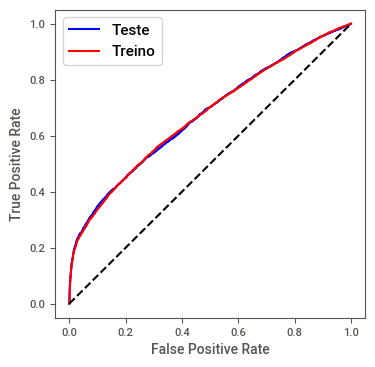

In [ ]:
# ROC AUC Score

from sklearn.metrics import roc_curve

plt.figure(figsize=(4, 4))

fpr, tpr, ths = roc_curve(y_test, lr2.predict_proba(X_test_s)[:,1])
plt.plot(fpr, tpr, color = 'b', label = 'Teste')

fpr2, tpr2, ths2 = roc_curve(y_train, lr2.predict_proba(X_train_s)[:,1])
plt.plot(fpr2, tpr2, color = 'r', label = 'Treino')

plt.plot((0,1),(0,1),'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(fontsize = 11);

In [ ]:
# Acurácia do modelo
# Vamos avaliar o quão bem o modelo conseguiu acertar suas predições para os dados de treino e teste.

print('Treino score:', lr2.score(X_train_s, y_train))
print('Teste score:', lr2.score(X_test_s, y_test))

Treino score: 0.6977415966386554
Teste score: 0.6988489649437613


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr2.predict(X_test_s)))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79     16322
           1       0.47      0.46      0.46      6527

    accuracy                           0.70     22849
   macro avg       0.63      0.63      0.63     22849
weighted avg       0.70      0.70      0.70     22849



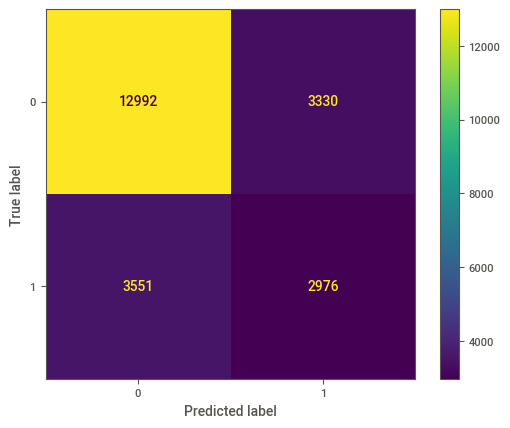

In [ ]:
# Matrix de Confusão

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lr2.predict(X_test_s), labels = lr2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = lr2.classes_)
disp.plot()
plt.show()

Analisando a matriz de confusão a respeito dos FN (Falso Negativo) e FP (Falso Positivo):
- Se o modelo prever que é detrator e não for (FP), a empresa irá ter feito um investimento sem necessidade. Porém, neste caso, nenhum atrito será criado com o consumidor. E o consumidor ainda sairá feliz pois uma ação foi feita sendo que ele já está satisfeito com a empresa.
- Se o modelo prever que não é detrator e na verdade o cliente é detrator (FN), este cenário irá criar um atrito e desconforto com o consumidor, pois ele não está satisfeito com a entrega ou empresa e nada foi feito a respeito. A empresa, neste caso, poderá perder o cliente.

In [ ]:
# Abaixo conseguimos verificar os valores de beta de cada variável, assim como o intercepto

print(f'{"Intercepto":50s} : {lr2.intercept_[0]:.1f}')

non_zero = []
for col, coef in zip(X_train_s.columns, lr2.coef_[0]):
    if abs(coef) <= 0.01:
        end = '*******'
    elif abs(coef) >= 0.1:
        end = '<-------'
    else:
        non_zero.append(col)
        end = ''
    print(f'{col:50s} : {coef:.3f} {end}')

Intercepto                                         : 0.8
payment_value                                      : 0.193 <-------
delivery_days                                      : 0.356 <-------
estimated_days                                     : 0.187 <-------
arrival_on_time_days                               : -0.172 <-------
arrival_on_time                                    : -1.249 <-------
payment_type_credit_card                           : 0.050 
payment_type_debit_card                            : -0.048 
payment_type_voucher                               : 0.175 <-------
seller_region_Nordeste                             : -0.213 <-------
seller_region_Norte                                : 0.009 *******
seller_region_Sudeste                              : 0.240 <-------
seller_region_Sul                                  : 0.024 
customer_region_Nordeste                           : -0.185 <-------
customer_region_Norte                              : -0.359 <-------
customer_r

Legenda: <br/>
- ***: indica que a variável tem pouquíssima importância
- <--: indica que a variável tem alguma importância


# **Interpretação do Modelo**

A função da Regressão Logística é:

$$
logit(p) = log(\frac{p}{(1 - p)}) = \beta_0 + \beta_{1} \cdot x1 + \beta_{2} \cdot x2 + \beta_{3} \cdot x3 + ... + \beta_{n} \cdot xn
$$

onde:
- x1 ... xn: representam cada uma das variáveis preditoras que compõem o modelo
- P é a probabilidade da saída do modelo

Logo, a probabilidade da saída do modelo é calculada como:

$$
p = \frac{e^{\beta_0 + \beta_{1} \cdot x1 + \beta_{2} \cdot x2 + \beta_{3} \cdot x3 + ... + \beta_{n} \cdot xn}}{1 + e^{\beta_0 + \beta_{1} \cdot x1 + \beta_{2} \cdot x2 + \beta_{3} \cdot x3 + ... + \beta_{n} \cdot xn}}
$$

Ou simplesmente:

$$
p = \frac{1}{1 + e^{- (\beta_0 + \beta_{1} \cdot x1 + \beta_{2} \cdot x2 + \beta_{3} \cdot x3 + ... + \beta_{n} \cdot xn)}}
$$

> PS: Lembre-se que as variáveis numéricas foram normalizadas, logo o cálculo das variáveis deve ser:
>
> $$
variavel_{new} = \frac{variavel - media(variavel)}{std(variavel)}
$$
> Isso torna todos os $\beta$s comparáveis!

Portanto, o cliente "padrão" ocorre quando x1, ..., xn são iguais a zero, ou seja:
- Variáveis numéricas igual a média
- Variáveis categóricas igual a categoria que foi removida na dummificação

In [ ]:
# Média e Desvio Padrão
print('payment_value:', scalers['payment_value'].mean_, scalers['payment_value'].scale_)
print('delivery_days:', scalers['delivery_days'].mean_, scalers['delivery_days'].scale_)
print('estimated_days:', scalers['estimated_days'].mean_, scalers['estimated_days'].scale_)
print('arrival_on_time_days:', scalers['arrival_on_time_days'].mean_, scalers['arrival_on_time_days'].scale_)

payment_value: [173.46261102] [278.53418399]
delivery_days: [12.43656629] [9.64867672]
estimated_days: [24.43618697] [8.80734418]
arrival_on_time_days: [11.99962068] [10.33015334]


Logo, o cliente "padrão" tem as seguintes características:
- Valor pago de R$ 173,46 (payment_value)
- Dias para entrega levando 12,44 dias (delivery_days)
- Dias estimados para entrega levando 24,44 dias (estimated_days)
- Dias para chegar no prazo de 11,99 dias, logo um atraso de 11,99 dias (arrival_on_time_days)
- Entrega chegou com atraso (arrival_on_time = 0)
- É um cliente da região Centro-Oeste (customer_region)
- E comprou de um vendedor da região Centro-Oeste (seller_region)
- Com tipo de pagamento: boleto (payment_type)

E este cliente, nestas condições, tem a seguinte probabilidade de ser um detrator:

$$
p = \frac{e^{\beta_0}}{1 + e^{\beta_0}}
$$

In [ ]:
import numpy as np

intercept = 0.8
probabilidade = np.e ** intercept / (1 + np.e ** intercept)
probabilidade

0.6899744811276124

Logo, com estas caracterítiscas, este cliente tem 69% de probabilidade de ser detrator.

In [ ]:
# Abaixo conseguimos verificar os valores de beta de cada variável, assim como o intercepto

print(f'{"Intercepto":50s} : {lr2.intercept_[0]:.1f}')

non_zero = []
for col, coef in zip(X_train_s.columns, lr2.coef_[0]):
    if abs(coef) <= 0.01:
        end = '*******'
    elif abs(coef) >= 0.1:
        end = '<-------'
    else:
        non_zero.append(col)
        end = ''
    print(f'{col:50s} : {coef:.3f} {end}')

Intercepto                                         : 0.8
payment_value                                      : 0.193 <-------
delivery_days                                      : 0.356 <-------
estimated_days                                     : 0.187 <-------
arrival_on_time_days                               : -0.172 <-------
arrival_on_time                                    : -1.249 <-------
payment_type_credit_card                           : 0.050 
payment_type_debit_card                            : -0.048 
payment_type_voucher                               : 0.175 <-------
seller_region_Nordeste                             : -0.213 <-------
seller_region_Norte                                : 0.009 *******
seller_region_Sudeste                              : 0.240 <-------
seller_region_Sul                                  : 0.024 
customer_region_Nordeste                           : -0.185 <-------
customer_region_Norte                              : -0.359 <-------
customer_r

Analisando os coeficientes acima, podemos notar que ser um cliente da região Sudeste (customer_region_Sudeste) tem um peso maior para gerar um cliente detrator. E ser cliente das regiões Nordeste (customer_region_Nordeste) e Norte (customer_region_Norte) tem mais chance de ser promotor (ou menos chances de ser um detrator).

Ser vendedor da região Norte (seller_region_Norte) quase não tem impacto. E ser vendedor das regiões Sul (seller_region_Sul) e Sudeste (seller_region_Sudeste) tem mais chance de ser detrator que promotor.

E que o atraso ou não (arrival_on_time) é a variável com maior impacto.

**Vamos analisar apenas a variável 'arrival_on_time'**:

Neste caso, a função de probabilidade é igual a:

$$
p = \frac{e^{\beta_0 + \beta_1 \cdot x1}}{1 + e^{\beta_0 + \beta_1 \cdot x1}}
$$

PS: Assumindo que todas as demais variáveis não mudaram, ou seja, são as mesmas do cliente "padrão".

In [ ]:
import numpy as np

intercept = 0.8
beta_1 = -1.249
x_1 = 0 # ATRASO
probabilidade0 = np.e ** (intercept + beta_1 * x_1) / (1 + np.e ** (intercept + beta_1 * x_1))
probabilidade0

0.6899744811276124

In [ ]:
import numpy as np

intercept = 0.8
beta_1 = -1.249
x_1 = 1 # NÃO ATRASO
probabilidade1 = np.e ** (intercept + beta_1 * x_1) / (1 + np.e ** (intercept + beta_1 * x_1))
probabilidade1

0.3895985512992514

In [ ]:
probabilidade0 / probabilidade1

1.7709883130382629

A probabilidade aumenta em 77% comparando a entrega com atraso e a entrega sem atraso. Ou seja, o atraso aumenta em 77% a probabilidade de gerar um cliente detrator (insatisfeito).